# P-273 Combined Cycle Power Plant Energy Prediction (Group-1)

Hi This is vivek K:😊

Project:
Business Objective:
A combined-cycle power plant comprises gas turbines, steam turbines, and heat recovery steam generators. In this type of plant, the electricity is generated by gas and steam turbines combined in one cycle. Then, it is transferred from one turbine to another. We have to model the energy generated as a function of exhaust vacuum and ambient variables and use that model to improve the plant's performance.
Data Set Details:
This is a project where the variable to be predicted is energy production
The data file contains 9568 observations with five variables collected from a combined cycle power plant over six years when the power plant was set to work with a full load.

The variables, or features, are the following:
temperature, in degrees Celsius.
exhaust_vacuum, in cm Hg.
amb_pressure, in millibar. (Ambient pressure)
r_humidity, in percentage. (Relative humidity)
energy_production, in MW, net hourly electrical energy output.

Acceptance Criterion: Need to deploy the end results using Flask /Streamlit etc
Milestones:
30 days to complete the Project

Milestone
Duration
Task start - End Date
Kick off and Business Objective discussion
1 day


EDA
1 Weeks – 1 ½ week


Model Building
1 Week – 1 ½ week


Model Evaluation


1 Week


Feedback
Deployment


Final presentation
1 day





Protocols:
All participants should adhere to agreed timelines and timelines will not be extended.
All the documentation – Final presentation and R/python code to be submitted before the final presentation day.
All the participants must attend review meetings.


https://www.youtube.com/watch?v=eeiu-wcyEbs

How is it nice right?

# import libraries

In [ ]:
#pip install pandas==2.0.0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import pyarrow as pa

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Data=pd.read_csv("/content/energy_production.csv",engine="pyarrow",sep=";")

In [ ]:
Data

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9568 rows x 5 columns]

Y----->energy_production

X's---->[temperature	, exhaust_vacuum	, amb_pressure ,	r_humidity]

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
Data.describe()

temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9568.000000     9568.000000   9568.000000  9568.000000   
mean     19.651231       54.305804   1013.259078    73.308978   
std       7.452473       12.707893      5.938784    14.600269   
min       1.810000       25.360000    992.890000    25.560000   
25%      13.510000       41.740000   1009.100000    63.327500   
50%      20.345000       52.080000   1012.940000    74.975000   
75%      25.720000       66.540000   1017.260000    84.830000   
max      37.110000       81.560000   1033.300000   100.160000   

       energy_production  
count        9568.000000  
mean          454.365009  
std            17.066995  
min           420.260000  
25%           439.750000  
50%           451.550000  
75%           468.430000  
max           495.760000

Ohk vivek then we will go to EDA:

# EDA

### Checking For Null Values

In [ ]:
Data.isna().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

<Axes: title={'center': 'Null Value Presence Visualisation'}>

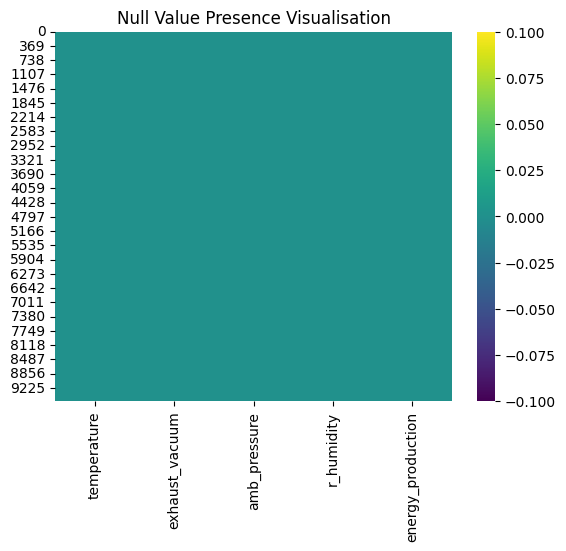

In [ ]:
plt.title("Null Value Presence Visualisation",color='k')
sns.heatmap(Data.isnull(),cmap='viridis')

So we can see from above that there is no null values present in our data set and we will check whether there present Duplicate data entry is there or not

### Checking For Duplicate Values

In [ ]:
Data[Data.duplicated()].shape

(41, 5)

In [ ]:
Data[Data.duplicated()]

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
2066        10.72           41.17       1019.68       60.71             479.21
2780        28.41           75.60       1018.48       56.07             440.28
3333        24.79           75.60       1017.07       68.23             440.05
3467         7.64           41.17       1020.01       75.14             488.53
3550        25.42           75.60       1017.39       77.63             438.24
3747        11.61           41.17       1019.57       58.82             476.81
4292        12.27           41.17       1019.41       58.10             475.13
4528        24.63           59.57       1010.45       85.36             440.67
5065         8.57           41.17       1020.18       72.47             484.20
5564        11.82           41.17       1019.50       55.74             475.61
5812        25.21           75.60       1017.19       69.84             445.84
5975         7.87           41.17       1020.33       77.77             486.20
5983         6.86           41.17       1020.12       79.14             490.23
6413        28.84           75.60       1018.41       53.96             442.69
6861        11.23           41.17       1019.36       56.85             475.85
6948        25.56           75.60       1017.37       69.31             442.20
7065         9.83           41.17       1019.34       72.29             478.21
7124        26.12           75.60       1017.41       72.31             439.68
7231        29.23           75.60       1017.72       52.26             438.92
7274        12.19           41.17       1019.43       65.47             475.64
7453        26.45           75.60       1017.42       74.50             436.89
7675         6.06           41.17       1019.67       84.70             489.62
7732        29.51           75.60       1017.92       50.61             431.18
7779        12.11           41.17       1019.46       62.59             475.53
7821        28.37           75.60       1017.48       55.19             439.25
7839         8.44           41.17       1019.90       70.72             486.15
7843        29.05           75.60       1017.63       51.16             439.14
7907         8.07           41.17       1019.40       86.43             484.54
7948        26.85           75.60       1017.43       74.55             433.48
8212        27.54           75.60       1018.26       57.89             440.87
8290         7.24           41.17       1020.35       80.56             486.76
8542        25.79           75.60       1017.46       75.63             434.65
8777        25.53           59.57       1010.65       82.04             445.59
8879         9.54           41.17       1019.79       65.61             481.18
9028         6.40           41.17       1019.54       85.37             488.82
9154        29.45           75.60       1018.12       50.68             437.31
9163         6.03           41.17       1019.81       84.20             488.57
9272        12.00           41.17       1019.48       58.71             474.40
9482        12.27           41.17       1019.39       52.18             473.84
9521        27.64           75.60       1017.35       54.78             441.04
9537        25.91           75.60       1018.23       62.65             443.20

So here around 41 duplicate entries are there that we are gonna remove from our dataframe....

In [ ]:
Data=Data.drop_duplicates().reset_index(drop=True)
Data[Data.duplicated()]

Empty DataFrame
Columns: [temperature, exhaust_vacuum, amb_pressure, r_humidity, energy_production]
Index: []

So we successfully removed all duplicated entries Listen Now we will go for visualisation and other part of eda to check how our each feature datas are distributed by histograms and Q-Q plots etc..

Before proceeding we will do train test split as well as standardising of data too...

### Visualizing the Distribution of Continuous Features with the help of Histograms and Probability Plot

In [ ]:
import pylab
from scipy import stats as stat

In [ ]:
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist(color='lightseagreen',alpha=0.8)
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'r_humidity')

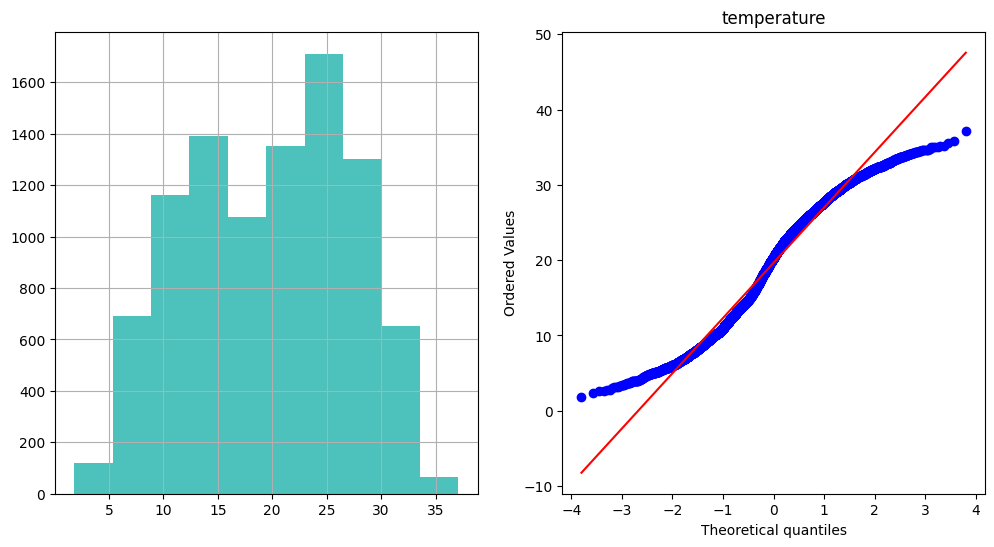

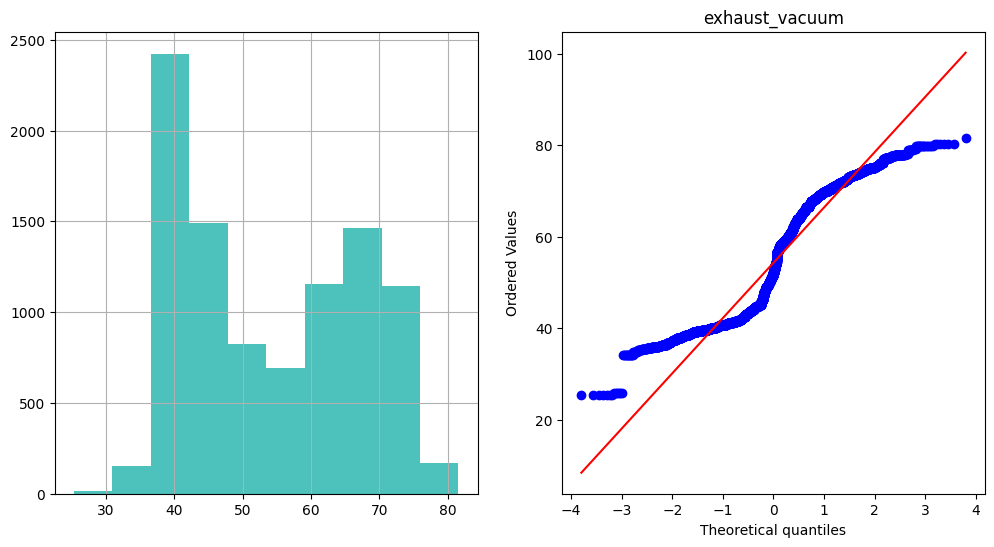

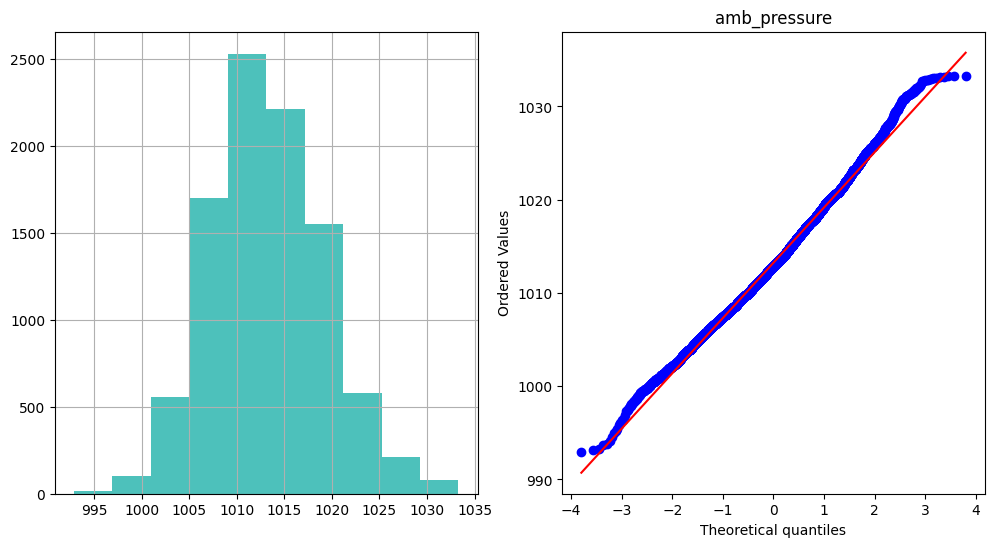

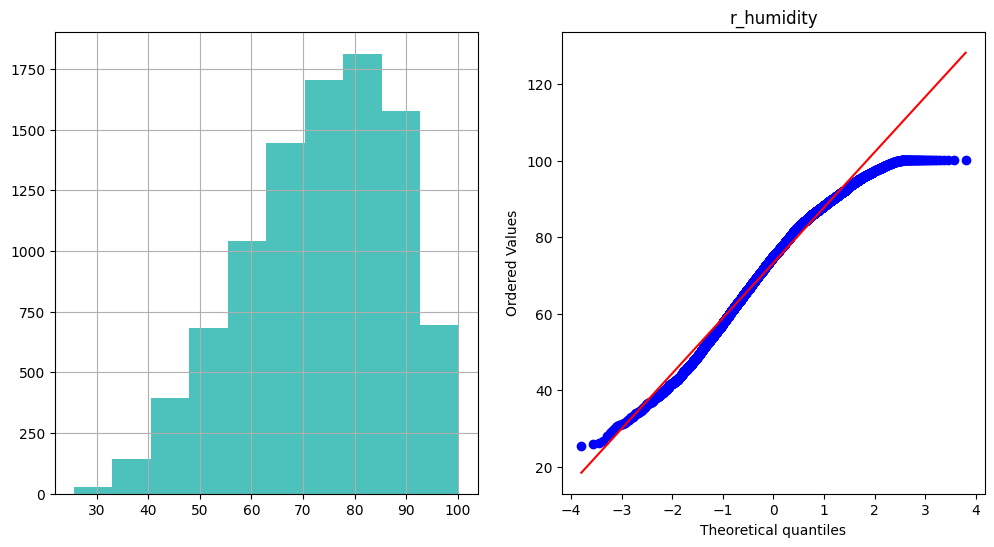

In [ ]:
plot_data(Data,'temperature')
plt.title('temperature')
plot_data(Data,'exhaust_vacuum')
plt.title('exhaust_vacuum')
plot_data(Data,'amb_pressure')
plt.title('amb_pressure')
plot_data(Data,'r_humidity')
plt.title('r_humidity')

### The Shapiro-Wilk test

The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.

To perform a Shapiro-Wilk test in Python we can use the scipy.stats.shapiro() function, which takes on the following syntax:

 lets have some Hypothetical test to check the normailty.

In [ ]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('temperature feature',shapiro(Data.temperature),'\n'
     'exhaust_vacuum',shapiro(Data.exhaust_vacuum),'\n'
     'amb_pressure',shapiro(Data.amb_pressure),'\n'
     'r_humidity',shapiro(Data.r_humidity),'\n'
     'energy_production',shapiro(Data.energy_production))

temperature feature ShapiroResult(statistic=0.9711729288101196, pvalue=6.8465901538599805e-40) 
exhaust_vacuum ShapiroResult(statistic=0.9068193435668945, pvalue=0.0) 
amb_pressure ShapiroResult(statistic=0.9950129389762878, pvalue=1.1680122775854997e-17) 
r_humidity ShapiroResult(statistic=0.9773677587509155, pvalue=2.917156687853032e-36) 
energy_production ShapiroResult(statistic=0.9557411074638367, pvalue=0.0)


So from here data is not perfectly normalised so we will go for feature transformations for that

### Log transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'energy_production')

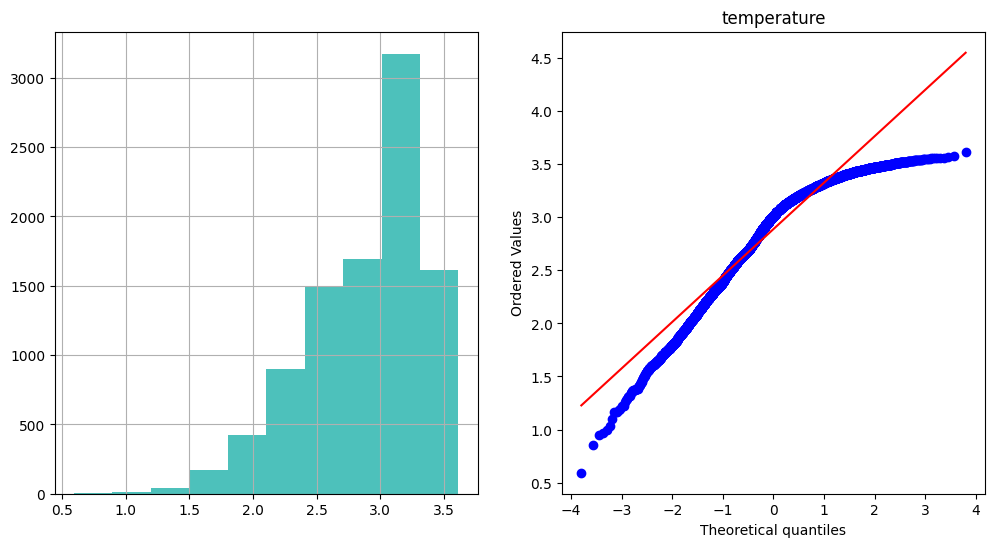

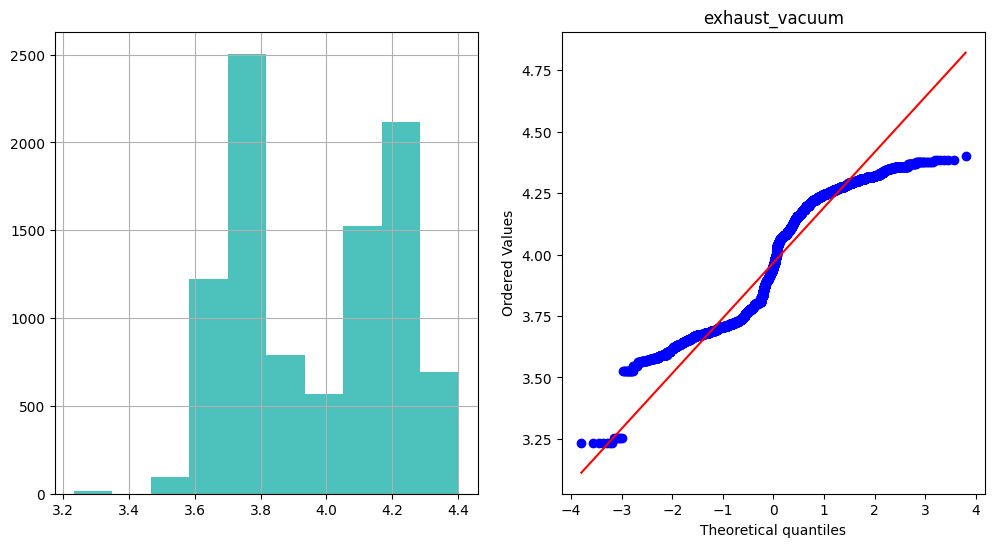

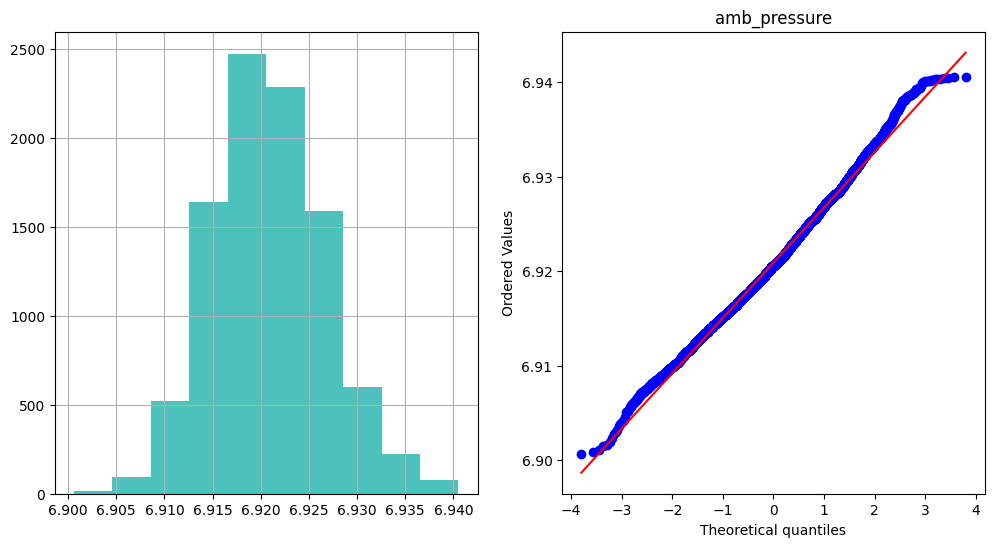

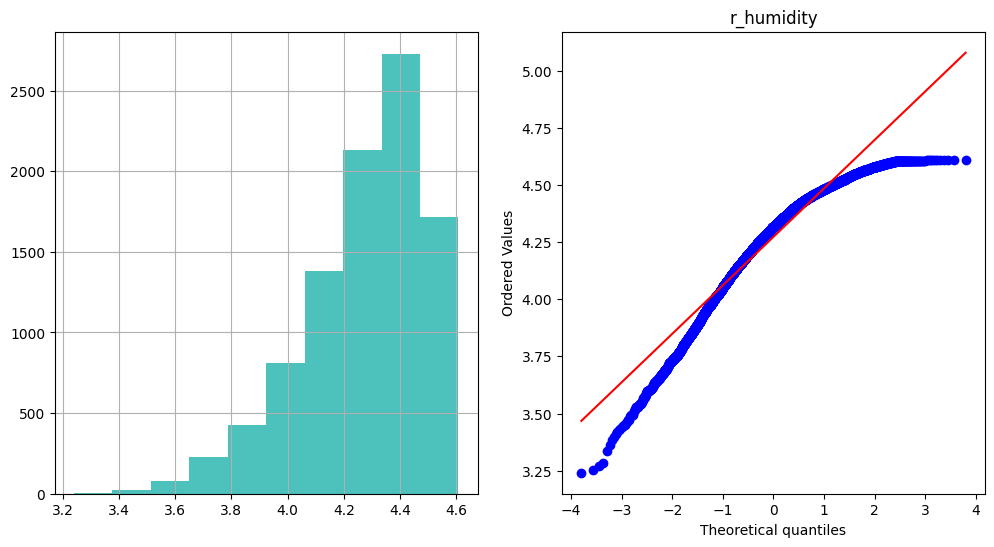

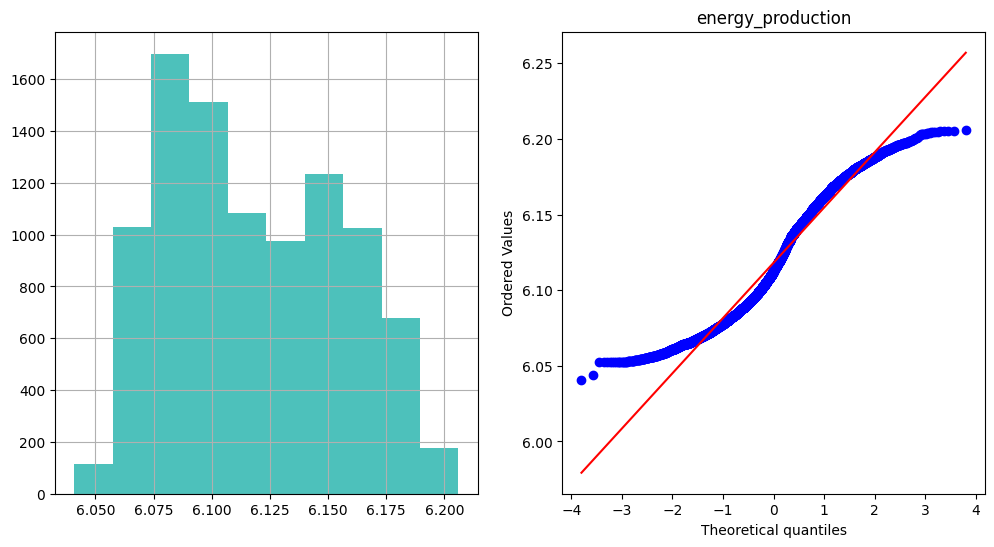

In [ ]:
df=Data.copy()
continuous_feature=[feature for feature in df.columns if df[feature].dtype!='O']
df[continuous_feature]=np.log(df[continuous_feature])

plot_data(df,'temperature')
plt.title('temperature')
plot_data(df,'exhaust_vacuum')
plt.title('exhaust_vacuum')
plot_data(df,'amb_pressure')
plt.title('amb_pressure')
plot_data(df,'r_humidity')
plt.title('r_humidity')
plot_data(df,'energy_production')
plt.title('energy_production')

In [ ]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('temperature feature',shapiro(df.temperature),'\n'
     'exhaust_vacuum',shapiro(df.exhaust_vacuum),'\n'
     'amb_pressure',shapiro(df.amb_pressure),'\n'
     'r_humidity',shapiro(df.r_humidity),'\n'
     'energy_production',shapiro(df.energy_production))

temperature feature ShapiroResult(statistic=0.9258878827095032, pvalue=0.0) 
exhaust_vacuum ShapiroResult(statistic=0.9111440777778625, pvalue=0.0) 
amb_pressure ShapiroResult(statistic=0.9955438375473022, pvalue=1.481938668967378e-16) 
r_humidity ShapiroResult(statistic=0.9379414319992065, pvalue=0.0) 
energy_production ShapiroResult(statistic=0.9579644203186035, pvalue=0.0)


### Square root transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'energy_production')

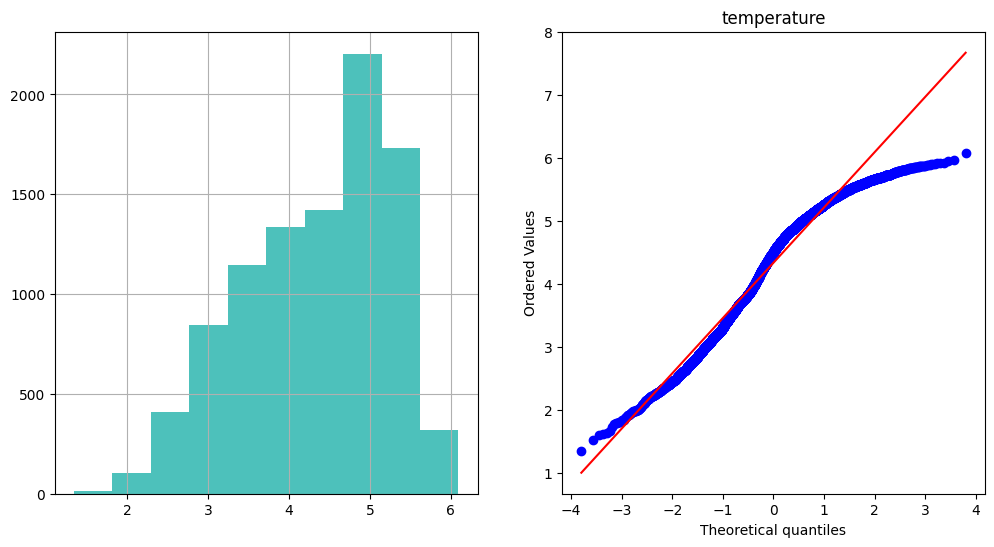

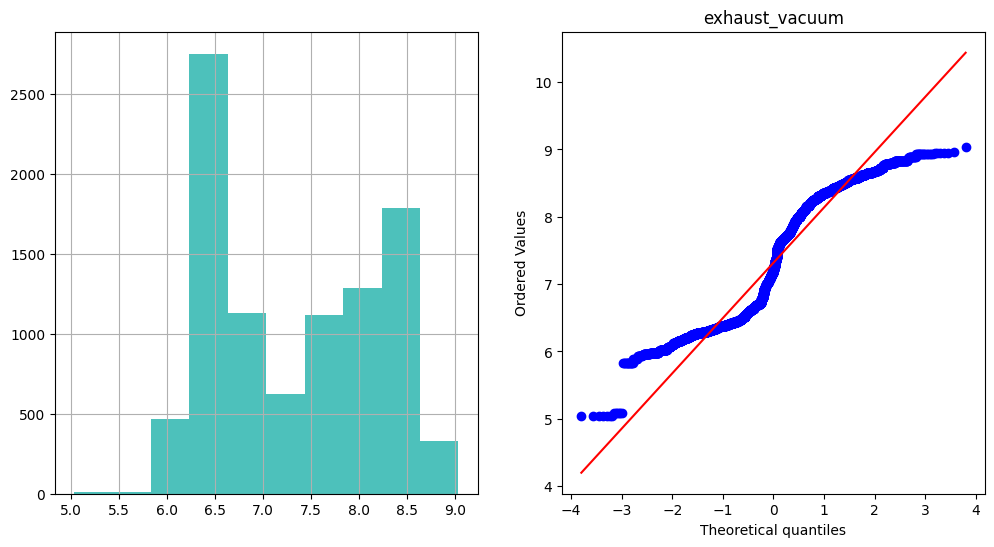

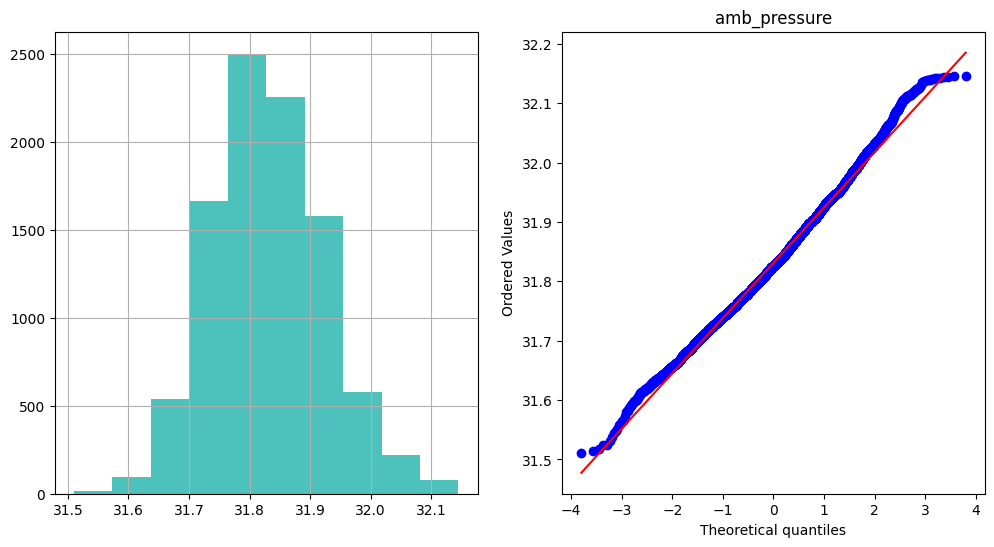

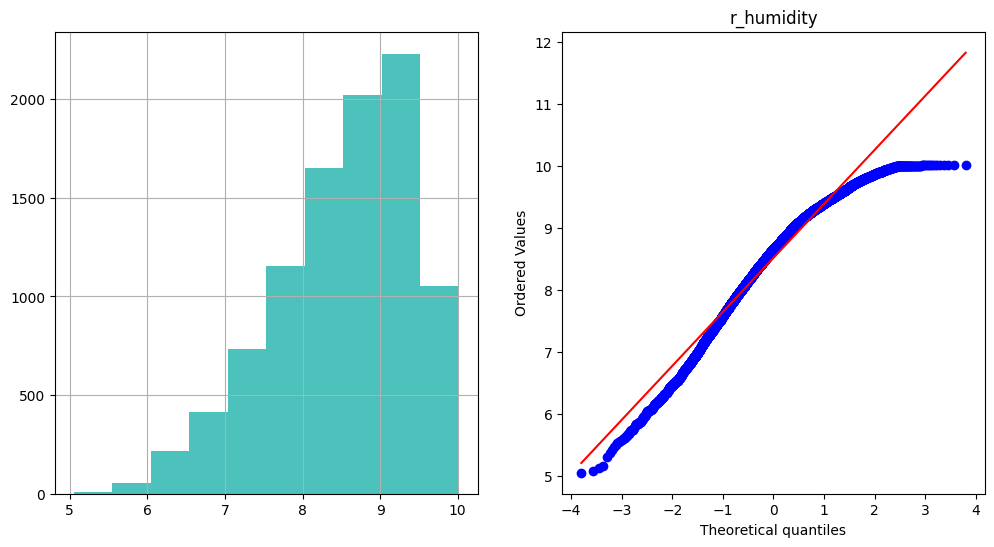

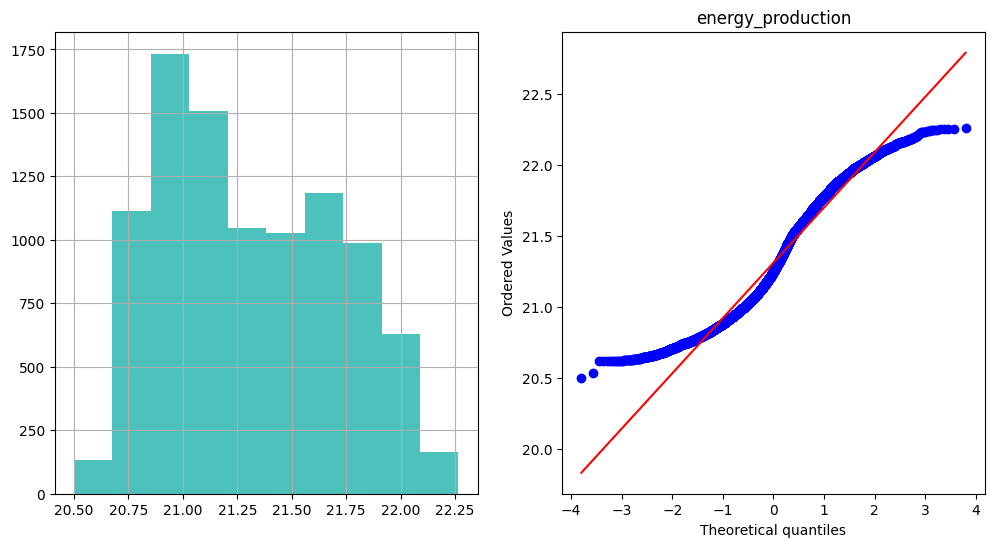

In [ ]:
df=Data.copy()
df[continuous_feature]=np.sqrt(df[continuous_feature])

plot_data(df,'temperature')
plt.title('temperature')
plot_data(df,'exhaust_vacuum')
plt.title('exhaust_vacuum')
plot_data(df,'amb_pressure')
plt.title('amb_pressure')
plot_data(df,'r_humidity')
plt.title('r_humidity')
plot_data(df,'energy_production')
plt.title('energy_production')

In [ ]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('temperature feature',shapiro(df.temperature),'\n'
     'exhaust_vacuum',shapiro(df.exhaust_vacuum),'\n'
     'amb_pressure',shapiro(df.amb_pressure),'\n'
     'r_humidity',shapiro(df.r_humidity),'\n'
     'energy_production',shapiro(df.energy_production))

temperature feature ShapiroResult(statistic=0.9602516889572144, pvalue=5.605193857299268e-45) 
exhaust_vacuum ShapiroResult(statistic=0.9097553491592407, pvalue=0.0) 
amb_pressure ShapiroResult(statistic=0.9952834844589233, pvalue=4.1592242620832134e-17) 
r_humidity ShapiroResult(statistic=0.9619471430778503, pvalue=2.802596928649634e-44) 
energy_production ShapiroResult(statistic=0.9568988680839539, pvalue=0.0)


### Cuberoot transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'energy_production')

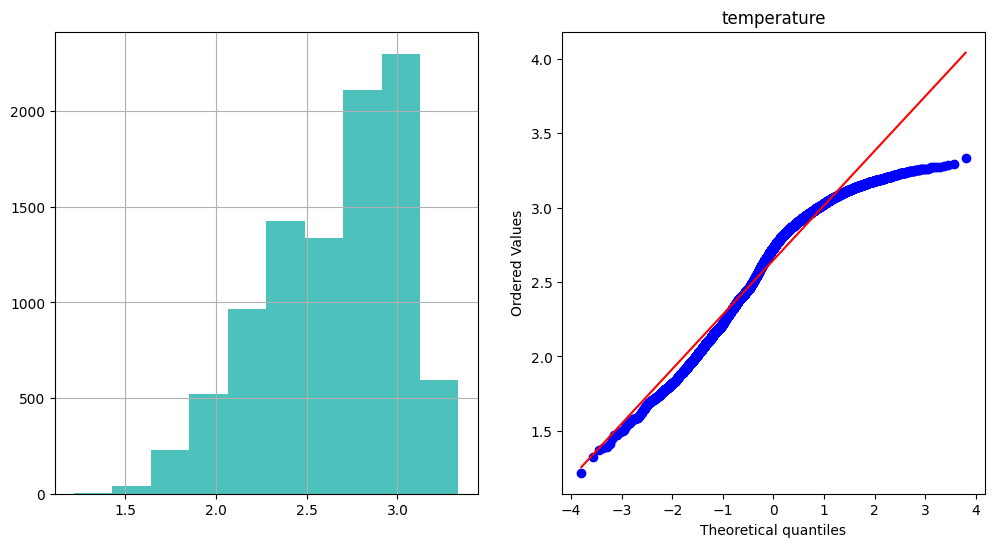

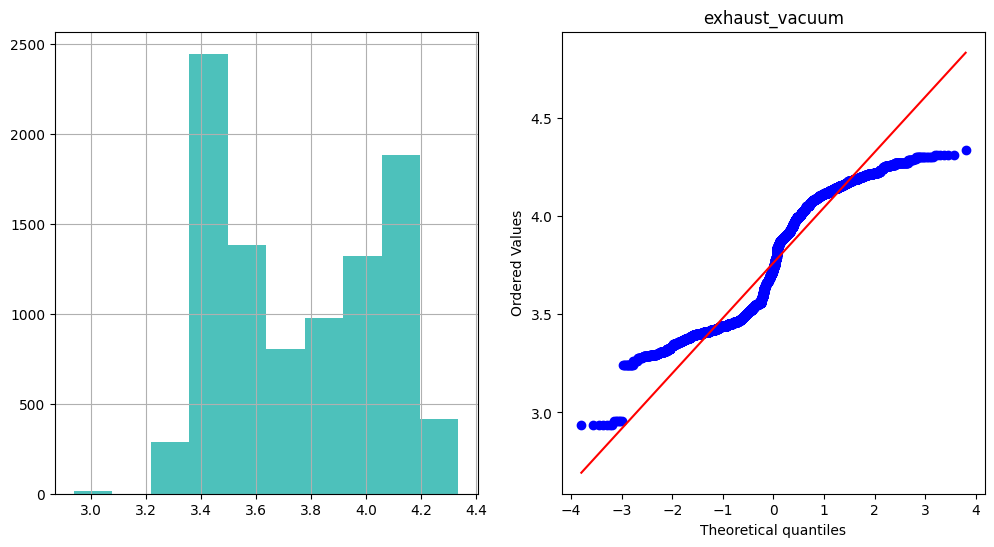

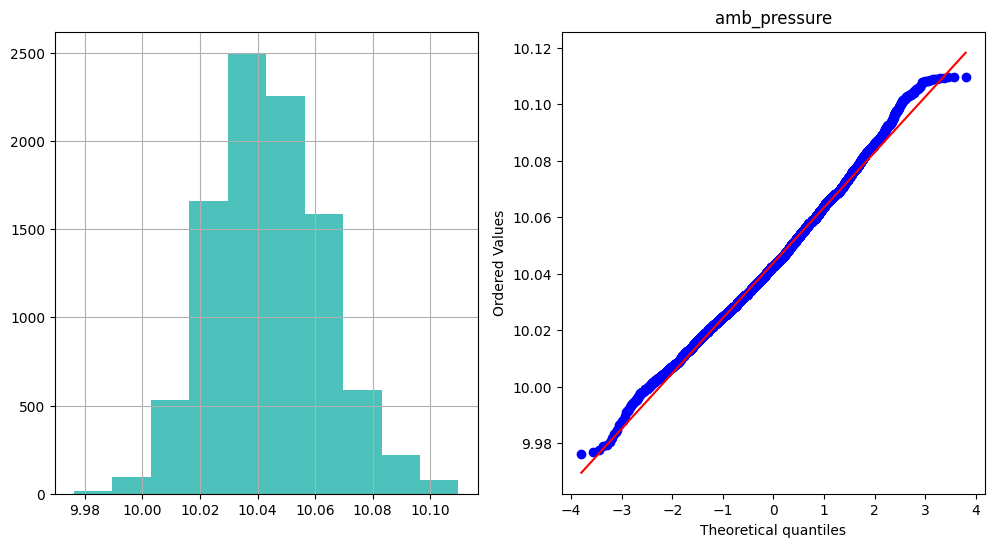

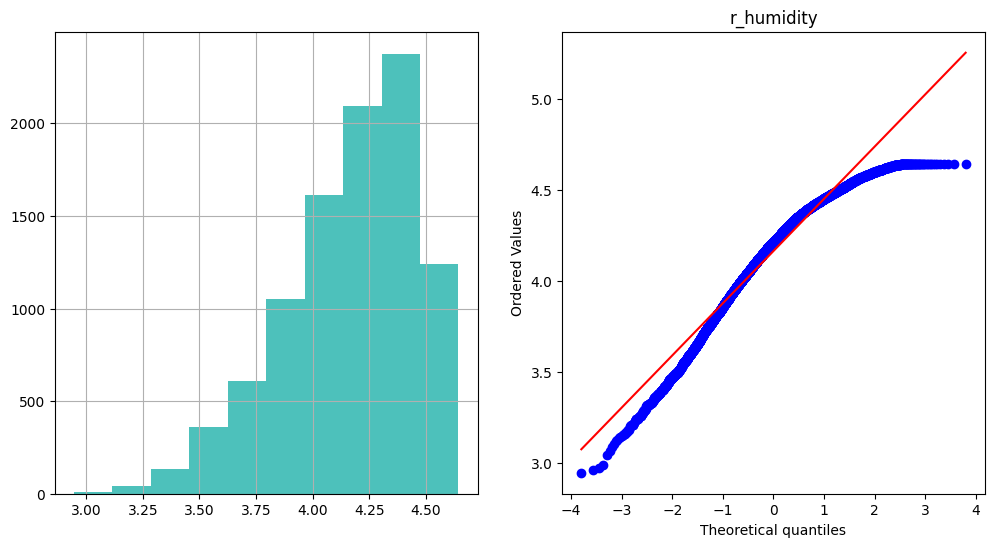

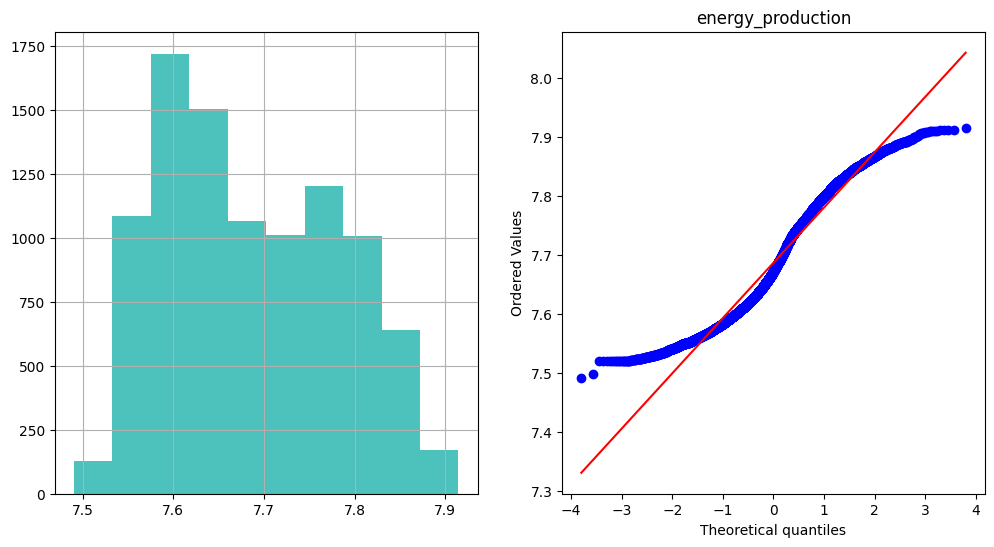

In [ ]:
df=Data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

plot_data(df,'temperature')
plt.title('temperature')
plot_data(df,'exhaust_vacuum')
plt.title('exhaust_vacuum')
plot_data(df,'amb_pressure')
plt.title('amb_pressure')
plot_data(df,'r_humidity')
plt.title('r_humidity')
plot_data(df,'energy_production')
plt.title('energy_production')

In [ ]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('temperature feature',shapiro(df.temperature),'\n'
     'exhaust_vacuum',shapiro(df.exhaust_vacuum),'\n'
     'amb_pressure',shapiro(df.amb_pressure),'\n'
     'r_humidity',shapiro(df.r_humidity),'\n'
     'energy_production',shapiro(df.energy_production))

temperature feature ShapiroResult(statistic=0.9518207907676697, pvalue=0.0) 
exhaust_vacuum ShapiroResult(statistic=0.9103963971138, pvalue=0.0) 
amb_pressure ShapiroResult(statistic=0.9953758120536804, pvalue=6.48997372105184e-17) 
r_humidity ShapiroResult(statistic=0.9549596905708313, pvalue=0.0) 
energy_production ShapiroResult(statistic=0.9572698473930359, pvalue=0.0)


### Boxcox Transformations

In [ ]:
from scipy import stats

Text(0.5, 1.0, 'energy_production')

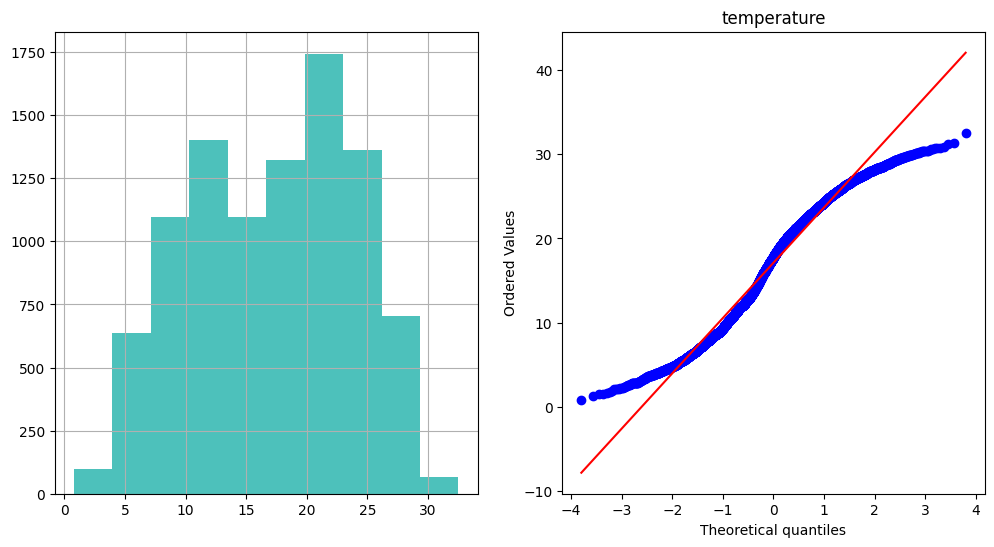

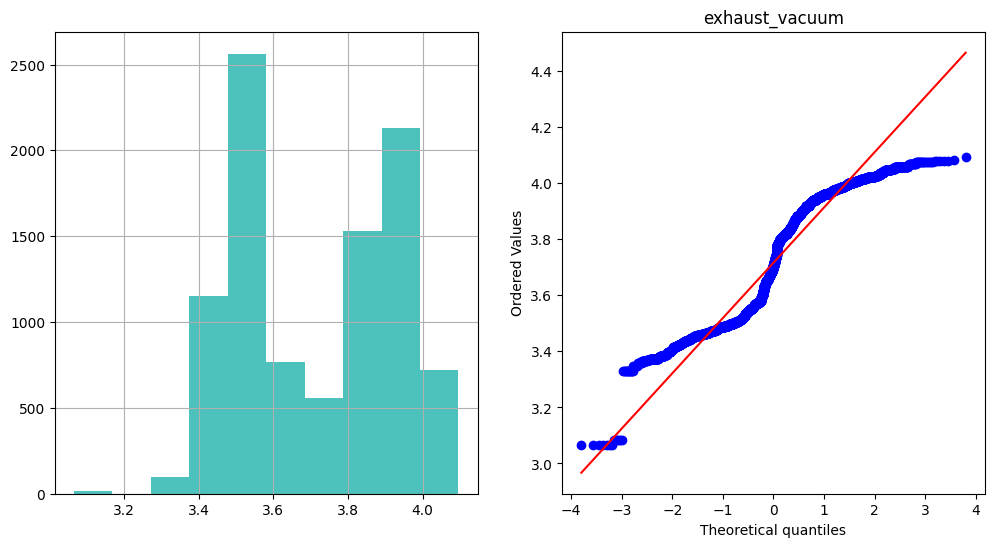

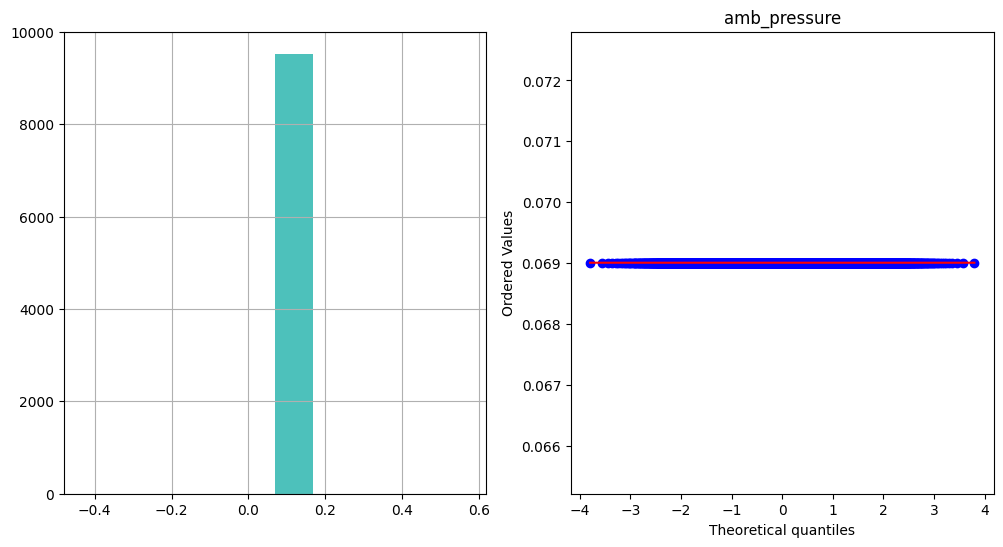

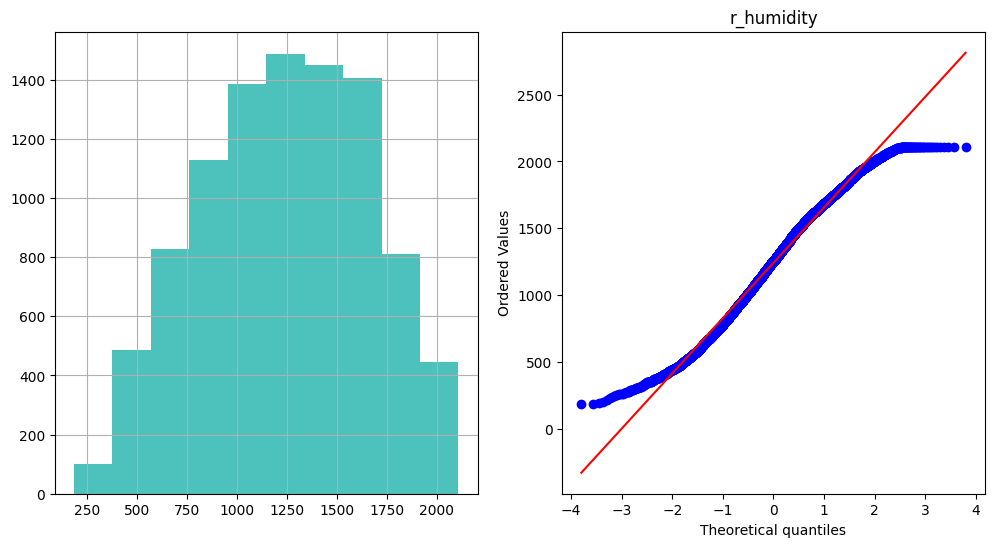

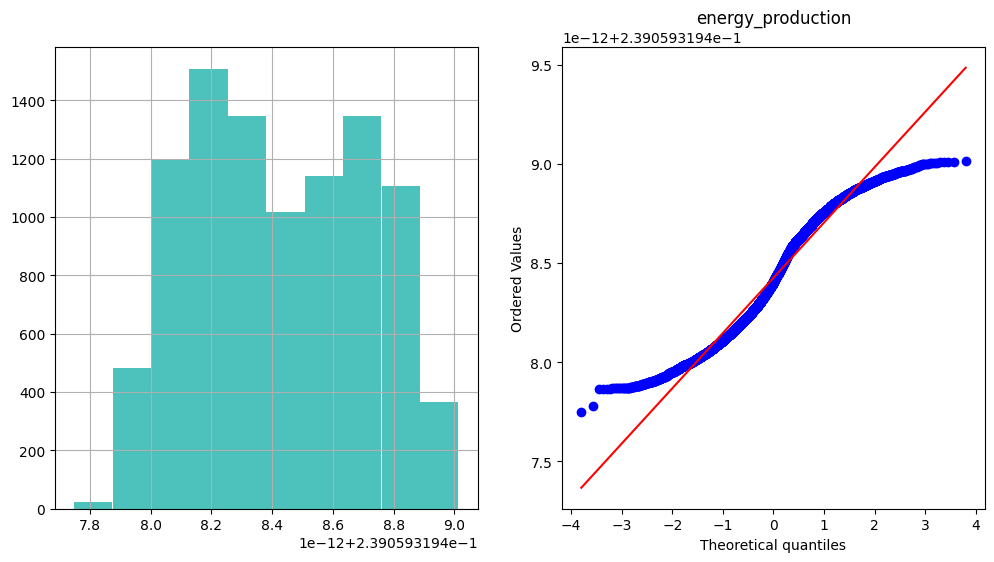

In [ ]:
df=Data.copy()
epsilon = 1e-10  # A small constant to avoid zero values
for feature in continuous_feature:
    min_value = df[feature].min()
    if min_value <= 0:
        df[feature] = df[feature] - min_value + epsilon

# Apply Box-Cox transformation
for feature in continuous_feature:
    df[feature], _ = stats.boxcox(df[feature])

plot_data(df,'temperature')
plt.title('temperature')
plot_data(df,'exhaust_vacuum')
plt.title('exhaust_vacuum')
plot_data(df,'amb_pressure')
plt.title('amb_pressure')
plot_data(df,'r_humidity')
plt.title('r_humidity')
plot_data(df,'energy_production')
plt.title('energy_production')

In [ ]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('temperature feature',shapiro(df.temperature),'\n'
     'exhaust_vacuum',shapiro(df.exhaust_vacuum),'\n'
     'amb_pressure',shapiro(df.amb_pressure),'\n'
     'r_humidity',shapiro(df.r_humidity),'\n'
     'energy_production',shapiro(df.energy_production))

temperature feature ShapiroResult(statistic=0.9709871411323547, pvalue=5.453096921981453e-40) 
exhaust_vacuum ShapiroResult(statistic=0.9111804962158203, pvalue=0.0) 
amb_pressure ShapiroResult(statistic=1.0, pvalue=1.0) 
r_humidity ShapiroResult(statistic=0.9869778752326965, pvalue=1.2004376713851542e-28) 
energy_production ShapiroResult(statistic=0.9629259705543518, pvalue=7.42688186092153e-44)


Ohk vivek we done with feature transformations to check normal distribution behaviour of our dataset.....

Note: Most of the Continuous Features visually do not look normally distributed.

Observation: Since the p-values are less than .05, we reject the null hypothesis.
We have sufficient evidence to say that the sample data does not come from a normal distribution.

### Visualizing the Relation between each independent Feature with respect to the Dependent Feature

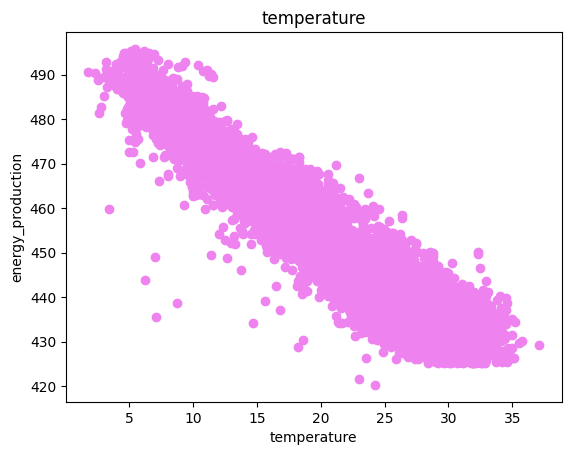

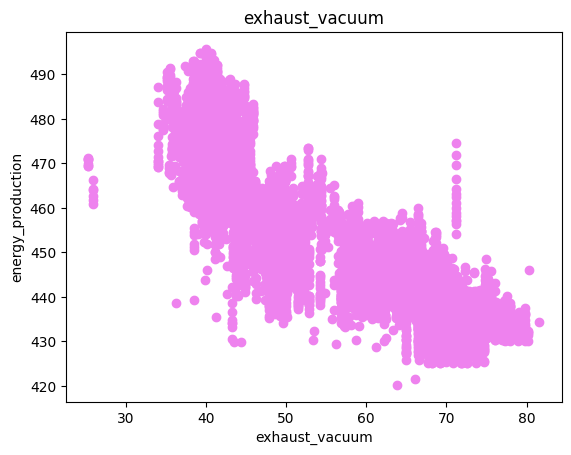

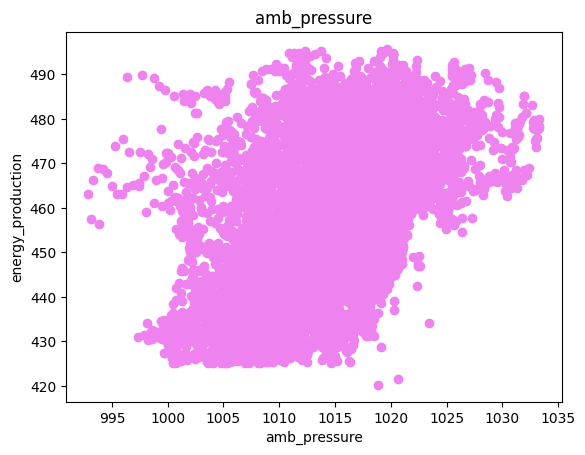

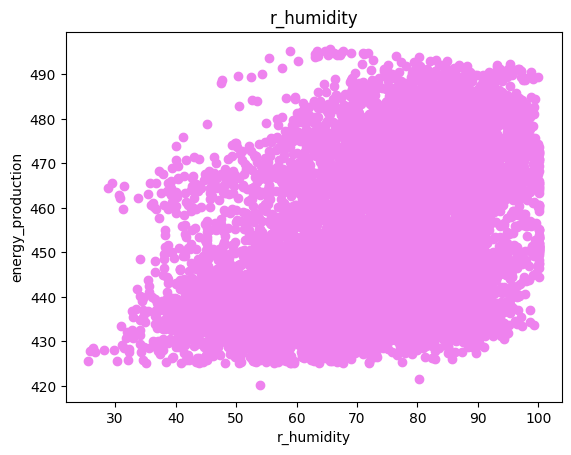

In [ ]:
for feature in continuous_feature:
    if feature!="energy_production":
        df=Data.copy()

        plt.scatter(df[feature],df['energy_production'],color='violet')
        plt.xlabel(feature)
        plt.ylabel('energy_production')
        plt.title(feature)
        plt.show()

Observation: temprature feature has a good linear relation with energy production a Negative Correlation as compare to other features

### Visualizing Continuous Datatype for Outlier Detection

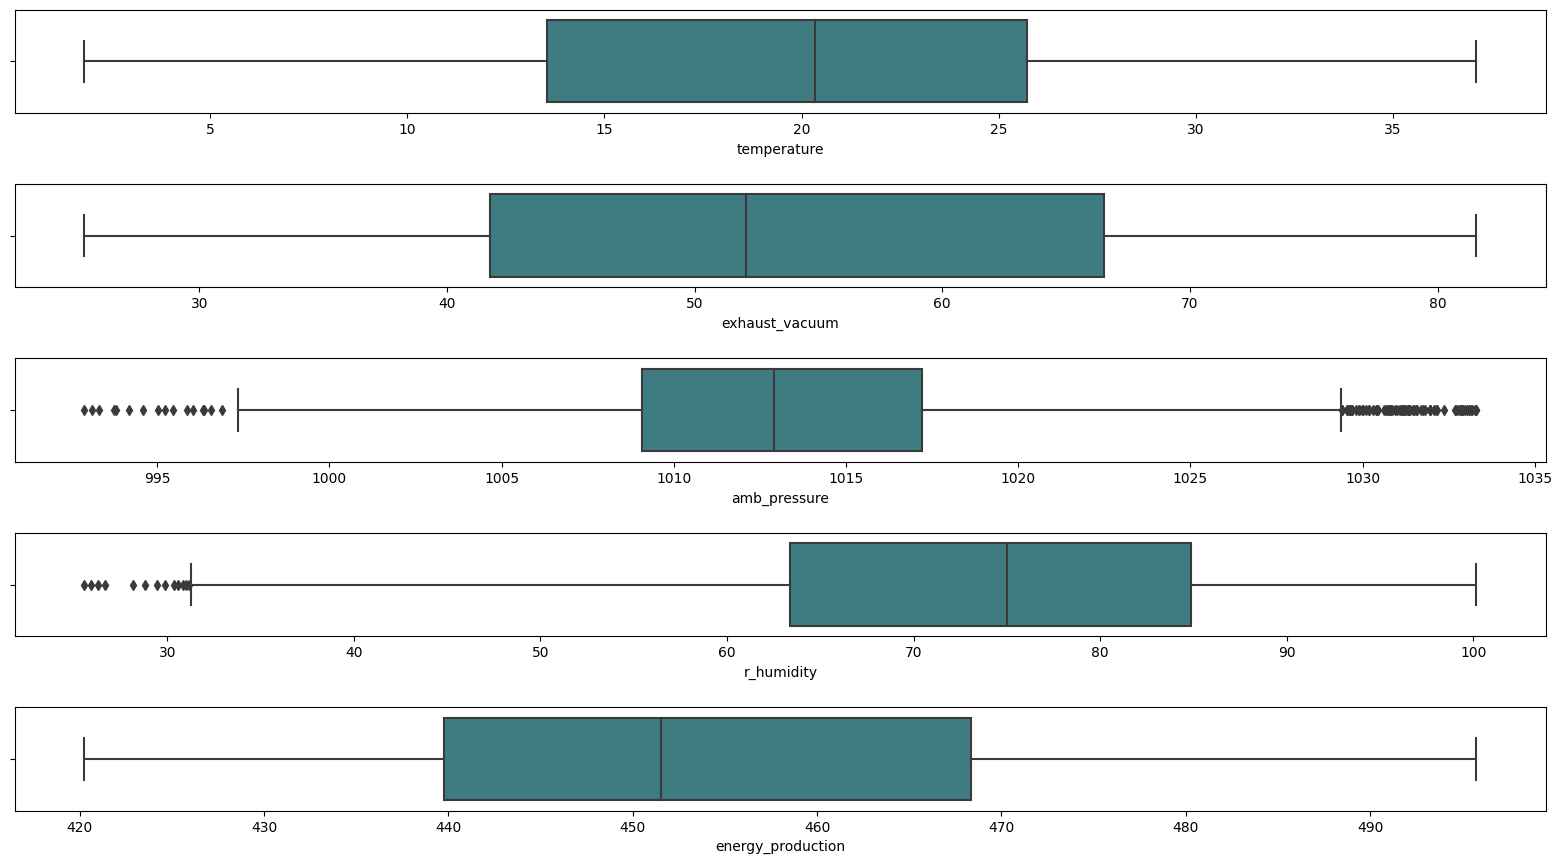

In [ ]:
df=Data.copy()
fig, axes=plt.subplots(5,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='temperature',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='exhaust_vacuum',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='amb_pressure',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='r_humidity',data=df,palette='crest',ax=axes[3])
sns.boxplot(x='energy_production',data=df,palette='crest',ax=axes[4])
plt.tight_layout(pad=2.0)

Observation: A significant amount of outliers are present in r_humidity,amb_pressure
Note:

We can't simply remove the outliers that would mean loss of information
We need to try different types of transformation or imputation and select the one with the best results
Note: Transforming variables can also eliminate outliers. The Transformed Variables reduces the variation caused by thr extreme values
Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for out case
Let's try Median Imputation to handle Outlier in r_humiditya and amb_pressure

### Median Imputation to handle Outlier in r_humiditya and amb_pressure

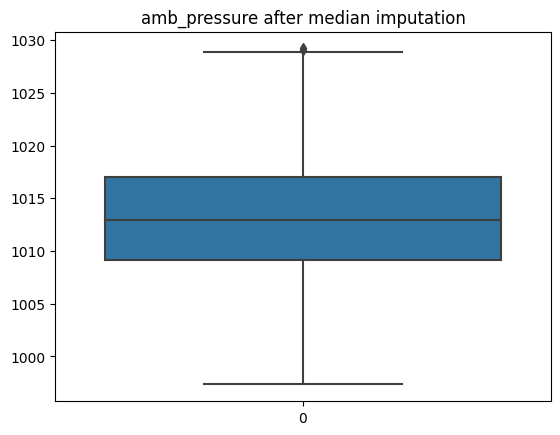

In [ ]:
df1=Data.copy()
for i in Data['amb_pressure']:
    q1 = np.quantile(df1.amb_pressure,0.25)
    q3 = np.quantile(df1.amb_pressure,0.75)
    med = np.median(df1.amb_pressure)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['amb_pressure'] = df1['amb_pressure'].replace(i, np.median(df1['amb_pressure']))
sns.boxplot(df1['amb_pressure'])
plt.title('amb_pressure after median imputation')
plt.show()

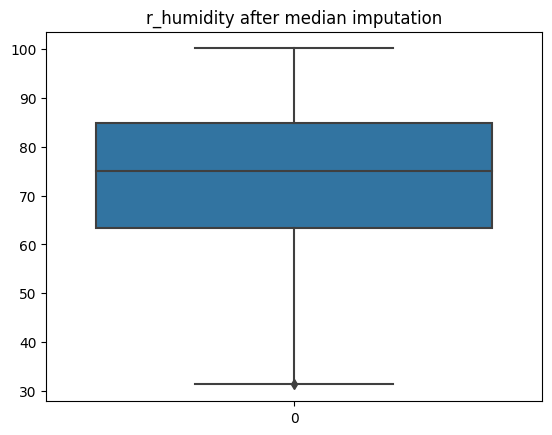

In [ ]:
for i in Data['r_humidity']:
    q1 = np.quantile(df1.r_humidity,0.25)
    q3 = np.quantile(df1.r_humidity,0.75)
    med = np.median(df1.r_humidity)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['r_humidity'] = df1['r_humidity'].replace(i, np.median(df1['r_humidity']))
sns.boxplot(df1['r_humidity'])
plt.title('r_humidity after median imputation')
plt.show()

Let's test our data in model and find the R-squared with median imputation data model

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
after_median_imputation_model = sm.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity', data = df1).fit()
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj

(0.9283306733405807, 0.9283005665030847)

### Let's try Mean Imputation to handle Outlier in r_humidity and amb_pressure

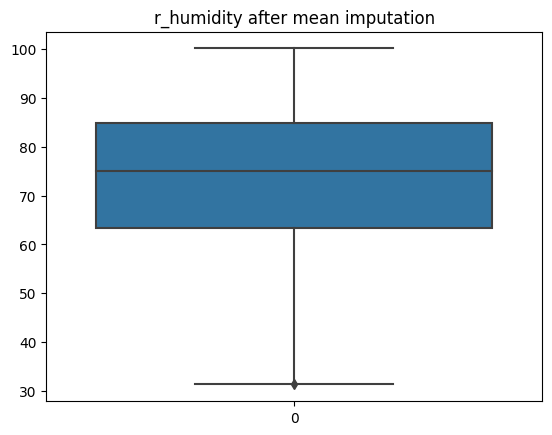

In [ ]:
df2=Data.copy()
for i in Data['r_humidity']:
    q1 = np.quantile(df2.r_humidity,0.25)
    q3 = np.quantile(df2.r_humidity,0.75)
    med = np.median(df2.r_humidity)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['r_humidity'] = df2['r_humidity'].replace(i, np.mean(df2['r_humidity']))
sns.boxplot(df2['r_humidity'])
plt.title('r_humidity after mean imputation')
plt.show()

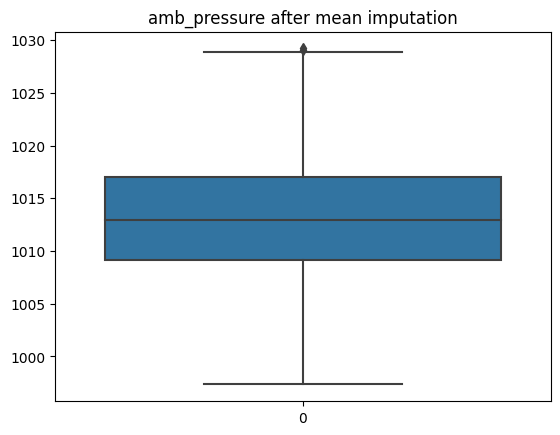

In [ ]:
df2=Data.copy()
for i in Data['amb_pressure']:
    q1 = np.quantile(df2.amb_pressure,0.25)
    q3 = np.quantile(df2.amb_pressure,0.75)
    med = np.median(df2.amb_pressure)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['amb_pressure'] = df2['amb_pressure'].replace(i, np.mean(df2['amb_pressure']))
sns.boxplot(df2['amb_pressure'])
plt.title('amb_pressure after mean imputation')
plt.show()

### Let's test our data in model and find the R-squared with mean imputation data model

In [ ]:
after_mean_imputation_model = sm.ols("energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj

(0.9285413601097707, 0.9285113417775337)

Observation: As you can see after mean imputation the model is performing well
now we can do is : now to remove the outlier and see the results

In [ ]:
df3=Data.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'r_humidity after removing outliers')

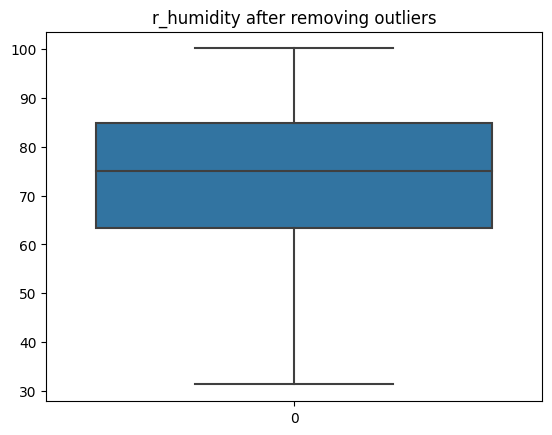

In [ ]:
drop_outliers(df3, 'r_humidity')
sns.boxplot(df3.r_humidity)
plt.title('r_humidity after removing outliers')

Text(0.5, 1.0, 'amb_pressure after removing outliers')

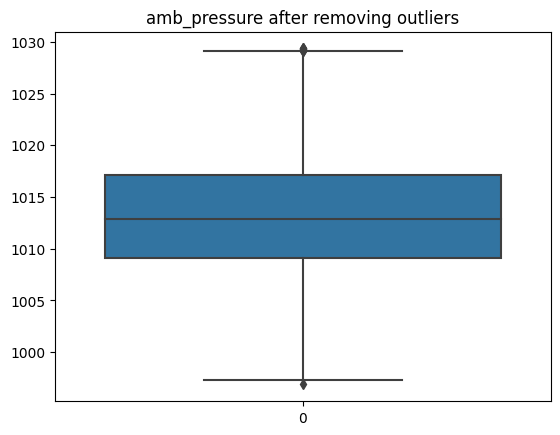

In [ ]:
drop_outliers(df3, 'amb_pressure')
sns.boxplot(df3.amb_pressure)
plt.title('amb_pressure after removing outliers')

### Vivek then Let's test our data in model and compare the R-squared with without imputation data model

In [ ]:
removed_outlier_model = sm.ols("energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity", data = df3).fit()
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.9277652938858559, 0.9277346177180614)

In [ ]:
np.sqrt(removed_outlier_model.mse_resid)

4.568763181453463

we are geting high r-squred value in mean imputation ,so we will peoceed with that

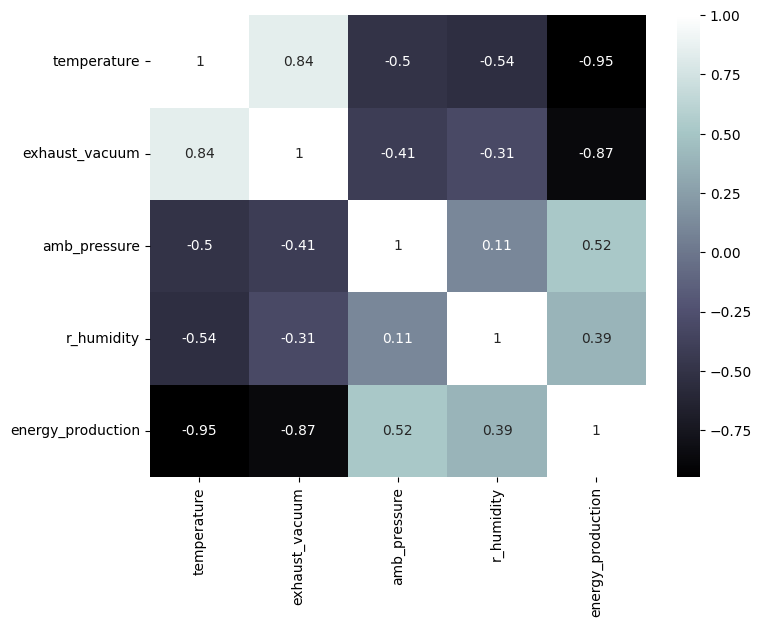

In [ ]:
fig = plt.figure(figsize = (8, 6))
sns.heatmap(df2.corr(), annot=True,cmap='bone')
plt.show()

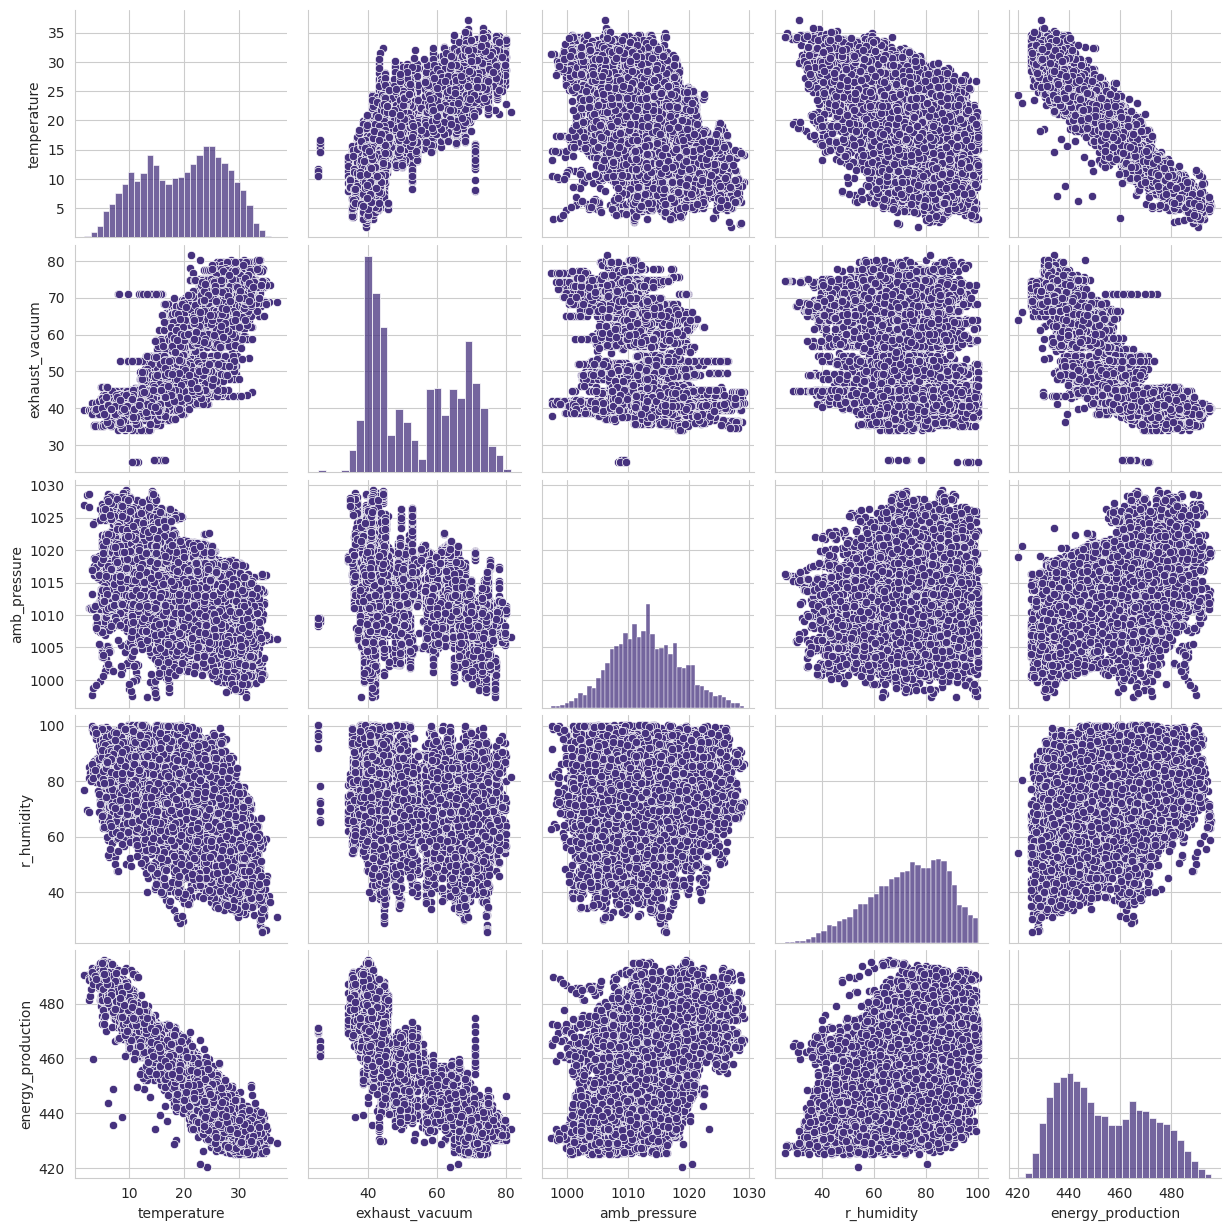

In [ ]:
sns.set_palette('viridis')
sns.set_style(style='whitegrid')
sns.pairplot(data=df2)

# Plotly Dash Board

Dash board(https://plotly.com/)

In [ ]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 97.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 27.0 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


In [ ]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px

In [ ]:
app = Dash(__name__)
app.layout = html.Div([
    html.H1(children='Energy Analysis Dashboard', style={'textAlign': 'center','color':'green'}),
    html.Div([
        html.Label('Select Graph Type:'),
        dcc.Dropdown(
            options=[
                {'label': 'Scatter Plot', 'value': 'scatter'},
                {'label': 'Heatmap', 'value': 'heatmap'},
                {'label': 'Box Plot', 'value': 'box'}
            ],
            value='scatter',
            id='graph-type-dropdown'
        )
    ]),
    dcc.Graph(id='graph-content')
])

@app.callback(
    Output('graph-content', 'figure'),
    Input('graph-type-dropdown', 'value')
)
def update_graph(graph_type):
    if graph_type == 'scatter':
        return px.scatter_matrix(df3)
    elif graph_type == 'heatmap':
        return px.imshow(Data.corr(), x=df3.columns, y=df3.columns)
    elif graph_type == 'box':
        fig = px.box(df3, y=df3.columns)
        fig.update_layout(title='Box Plot of Individual Columns', yaxis_title='Value')
        return fig

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

# Automated EDA

In [ ]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 32.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=34ff5165d7134d605aac06a7359a53ccd9a9113369300786eaf5af35665fbf19
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.

In [ ]:
# DO THIS IN KERNAL IF RUNNING IN JUPYTER

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df3, title='Pandas Profiling Report', explorative=True)

# Save the report to an HTML file
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
display(profile)

Nice Vivek.....

### Train Test split

In [ ]:
X=df2.iloc[:,0:4]
Y=df2.iloc[:,4]

In [ ]:
X.head(5)

temperature  exhaust_vacuum  amb_pressure  r_humidity
0         9.59           38.56       1017.01       60.10
1        12.04           42.34       1019.72       94.67
2        13.87           45.08       1024.42       81.69
3        13.72           54.30       1017.89       79.08
4        15.14           49.64       1023.78       75.00

In [ ]:
Y.head(5)

0    481.30
1    465.36
2    465.48
3    467.05
4    463.58
Name: energy_production, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [ ]:
x_train.head(5)

In [ ]:
x_test.head(5)

temperature  exhaust_vacuum  amb_pressure  r_humidity
1087        26.98           70.94       1007.99       68.16
6308        21.37           65.94       1010.73       75.09
8021        19.77           56.65       1020.67       66.33
9483        23.66           69.51       1012.90       52.59
4459        25.44           63.13       1011.74       77.83

In [ ]:
y_train.head(5)

In [ ]:
y_test.head(5)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train.head(10)

temperature  exhaust_vacuum  amb_pressure  r_humidity
5695        20.36           60.10       1011.21       84.79
7300        24.92           60.95       1014.88       60.58
9066        25.90           47.45       1007.80       55.96
6424        20.76           59.21       1017.94       80.84
6773        21.65           58.18       1008.33       95.28
9086        12.12           41.17       1017.68       78.72
6198        17.32           43.70       1015.13       61.66
3429        22.06           43.43       1010.46       58.01
8990         7.61           39.37       1015.84       83.73
3023        16.00           42.86       1013.88       81.74

In [ ]:
Train = pd.concat([pd.DataFrame(x_train), y_train], axis=1)

In [ ]:
Test=pd.concat([pd.DataFrame(x_test), y_test], axis=1)

# Scaling Data

In [ ]:
scale=StandardScaler()

In [ ]:
#scale.fit(x_train[columns_to_standardize])
x_train_scaled = scale.fit_transform(x_train)

In [ ]:
#scale.fit(x_test[columns_to_standardize])
x_test_scaled = scale.fit_transform(x_test)

In [ ]:
y_train_scaled=scale.fit_transform(pd.Series(y_train).values.reshape(-1, 1) )

In [ ]:
y_test_scaled=scale.fit_transform(pd.Series(y_test).values.reshape(-1, 1) )

In [ ]:
Train_scaled=pd.DataFrame()

In [ ]:
Train_scaled[["temperature","exhaust_vacuum","amb_pressure","r_humidity"]]=x_train_scaled

In [ ]:
Train_scaled[["energy_production"]]=y_train_scaled

In [ ]:
Train_scaled

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0        0.091824        0.456521     -0.330916    0.785745          -0.000785
1        0.703155        0.523504      0.319079   -0.865674          -0.518083
2        0.834538       -0.540341     -0.934862   -1.180815          -0.653719
3        0.145450        0.386386      0.861036    0.516307          -0.387144
4        0.264766        0.305218     -0.840993    1.501292          -0.775851
...           ...             ...           ...         ...                ...
7616     0.255382        1.019964      0.763626    0.390796          -0.476394
7617    -1.518282       -0.902836     -0.463748    1.149999           1.724323
7618    -0.607989       -0.795664      1.220570    0.722308           0.518861
7619     0.280854       -0.951695     -0.008575   -0.397738           0.484218
7620     0.979326        1.613353     -0.585954   -0.254492          -0.703629

[7621 rows x 5 columns]

In [ ]:
Test_scaled=pd.DataFrame()

In [ ]:
Test_scaled[["temperature","exhaust_vacuum","amb_pressure","r_humidity"]]=x_test_scaled

In [ ]:
Test_scaled[["energy_production"]]=y_test_scaled

In [ ]:
Test_scaled

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0        1.000855        1.318218     -0.927086   -0.377462          -1.165922
1        0.240983        0.923547     -0.445231    0.104171          -0.579326
2        0.024264        0.190248      1.302811   -0.504647           0.144396
3        0.551163        1.205342     -0.063616   -1.459575          -1.127246
4        0.792263        0.701742     -0.267613    0.294601          -0.745167
...           ...             ...           ...         ...                ...
1901     1.221638        1.224286     -0.605263   -0.131433          -0.826037
1902     1.347606        1.424779     -0.397749   -2.195578          -0.634997
1903    -1.678338       -1.122428     -0.020198   -0.257228           1.518004
1904     0.990019        0.386794      0.513202   -0.188423          -1.082123
1905     0.383205        0.460992      0.782267   -0.426112          -0.135717

[1906 rows x 5 columns]

# Linear Regression

Let us try Linear regression Model...

In [ ]:
multilinear_regression_model=sm.ols("energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity", data = Train_scaled).fit()

In [ ]:
multilinear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.474e+04
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:26:49   Log-Likelihood:                -759.15
No. Observations:                7621   AIC:                             1528.
Df Residuals:                    7616   BIC:                             1563.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        4.08e-16      0.003   1.33e-13      1.000      -0.006       0.006
temperature       -0.8627      0.007   -116.576      0.000      -0.877      -0.848
exhaust_vacuum    -0.1745      0.006    -28.891      0.000      -0.186      -0.163
amb_pressure       0.0235      0.004      6.406      0.000       0.016       0.031
r_humidity        -0.1352      0.004    -33.887      0.000      -0.143      -0.127
==============================================================================
Omnibus:                      672.351   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2975.292
Skew:                          -0.332   Prob(JB):                         0.00
Kurtosis:                       5.988   Cond. No.                         4.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squaredvalue high so model perfect but only with r sqrd we cannot finalise the model .F value is very high so we will reject null hypothesis that means all means are equal in ANOVA Test

from above H0:BETA = 0
           Ha:BETA !=0

           but from above if we check P values all features p value is 0.00
           which less than 0.05 so we rejecet null hypothesis and we can tell that all features have less or more influence on Y or Target variable

How can we verify this we can go and verify this

we will check multi collinearity among independent variables

before that we will check feature importances: In linear regression, feature importance is typically inferred from the magnitude of the coefficients assigned to each feature.

In [ ]:
np.abs(multilinear_regression_model.params[1:])

temperature       0.862681
exhaust_vacuum    0.174492
amb_pressure      0.023457
r_humidity        0.135249
dtype: float64

these values assume a linear relationship between features and the target variable. If the relationships are nonlinear, other methods like tree-based models or more complex models might provide more accurate feature importance values.

Lets check for multicollinearity:::: 🕵🏿

In [ ]:
multilinear_regression_model.pvalues

Intercept          1.000000e+00
temperature        0.000000e+00
exhaust_vacuum    2.954716e-174
amb_pressure       1.583363e-10
r_humidity        1.404943e-234
dtype: float64

In [ ]:
Train.corr()

temperature  exhaust_vacuum  amb_pressure  r_humidity  \
temperature           1.000000        0.842728     -0.498193   -0.543432   
exhaust_vacuum        0.842728        1.000000     -0.410426   -0.313406   
amb_pressure         -0.498193       -0.410426      1.000000    0.094470   
r_humidity           -0.543432       -0.313406      0.094470    1.000000   
energy_production    -0.947919       -0.868738      0.512079    0.390462   

                   energy_production  
temperature                -0.947919  
exhaust_vacuum             -0.868738  
amb_pressure                0.512079  
r_humidity                  0.390462  
energy_production           1.000000

In [ ]:
modelT=sm.ols("energy_production~temperature", data = Train_scaled).fit()
modelT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 6.748e+04
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:26:50   Log-Likelihood:                -2094.6
No. Observations:                7621   AIC:                             4193.
Df Residuals:                    7619   BIC:                             4207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.276e-16      0.004   1.17e-13      1.000      -0.007       0.007
temperature    -0.9479      0.004   -259.773      0.000      -0.955      -0.941
==============================================================================
Omnibus:                      291.644   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              731.402
Skew:                          -0.188   Prob(JB):                    1.51e-159
Kurtosis:                       4.470   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model2=sm.ols('energy_production~temperature+exhaust_vacuum',data=Train_scaled).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 4.122e+04
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:26:50   Log-Likelihood:                -1402.0
No. Observations:                7621   AIC:                             2810.
Df Residuals:                    7618   BIC:                             2831.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.276e-16      0.003   1.28e-13      1.000      -0.007       0.007
temperature       -0.7447      0.006   -120.302      0.000      -0.757      -0.733
exhaust_vacuum    -0.2412      0.006    -38.966      0.000      -0.253      -0.229
==============================================================================
Omnibus:                      386.514   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.975
Skew:                          -0.182   Prob(JB):                    1.67e-271
Kurtosis:                       4.948   Cond. No.                         3.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model3=sm.ols('energy_production~temperature+amb_pressure',data=Train_scaled).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 3.453e+04
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:26:50   Log-Likelihood:                -2014.5
No. Observations:                7621   AIC:                             4035.
Df Residuals:                    7618   BIC:                             4056.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.276e-16      0.004   1.18e-13      1.000      -0.007       0.007
temperature     -0.9215      0.004   -221.268      0.000      -0.930      -0.913
amb_pressure     0.0530      0.004     12.721      0.000       0.045       0.061
==============================================================================
Omnibus:                      285.270   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.859
Skew:                          -0.182   Prob(JB):                    9.71e-156
Kurtosis:                       4.455   Cond. No.                         1.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model4=sm.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',data=Train_scaled).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.474e+04
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:26:50   Log-Likelihood:                -759.15
No. Observations:                7621   AIC:                             1528.
Df Residuals:                    7616   BIC:                             1563.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        4.08e-16      0.003   1.33e-13      1.000      -0.006       0.006
temperature       -0.8627      0.007   -116.576      0.000      -0.877      -0.848
exhaust_vacuum    -0.1745      0.006    -28.891      0.000      -0.186      -0.163
amb_pressure       0.0235      0.004      6.406      0.000       0.016       0.031
r_humidity        -0.1352      0.004    -33.887      0.000      -0.143      -0.127
==============================================================================
Omnibus:                      672.351   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2975.292
Skew:                          -0.332   Prob(JB):                         0.00
Kurtosis:                       5.988   Cond. No.                         4.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model5=sm.ols('energy_production~exhaust_vacuum',data=Train_scaled).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                 2.344e+04
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:26:50   Log-Likelihood:                -5458.8
No. Observations:                7621   AIC:                         1.092e+04
Df Residuals:                    7619   BIC:                         1.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.276e-16      0.006   7.54e-14      1.000      -0.011       0.011
exhaust_vacuum    -0.8687      0.006   -153.107      0.000      -0.880      -0.858
==============================================================================
Omnibus:                       76.809   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.682
Skew:                          -0.098   Prob(JB):                     7.58e-26
Kurtosis:                       3.571   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model6=sm.ols('energy_production~r_humidity',data=Train_scaled).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1371.
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          4.94e-276
Time:                        14:26:50   Log-Likelihood:                -10183.
No. Observations:                7621   AIC:                         2.037e+04
Df Residuals:                    7619   BIC:                         2.038e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.276e-16      0.011   4.05e-14      1.000      -0.021       0.021
r_humidity     0.3905      0.011     37.021      0.000       0.370       0.411
==============================================================================
Omnibus:                      595.564   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.358
Skew:                           0.231   Prob(JB):                     4.32e-55
Kurtosis:                       2.241   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model7=sm.ols('energy_production~amb_pressure',data=Train_scaled).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     2708.
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:26:50   Log-Likelihood:                -9654.9
No. Observations:                7621   AIC:                         1.931e+04
Df Residuals:                    7619   BIC:                         1.933e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.276e-16      0.010   4.34e-14      1.000      -0.019       0.019
amb_pressure     0.5121      0.010     52.038      0.000       0.493       0.531
==============================================================================
Omnibus:                      404.393   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              466.183
Skew:                           0.600   Prob(JB):                    5.88e-102
Kurtosis:                       2.826   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So from above if we check each features individual impact on Target variable r_humidity and amb_pressure havae less rsqrd value as shown in above summary Compared to when we are using with other features

based on R2 value we cannot fully finalise the multicollinearity and we cannot drop low performing features...so let us go for VIF

## Calculating VIF

In [ ]:
rsq_t = sm.ols('temperature~exhaust_vacuum+amb_pressure+r_humidity',data=Train_scaled).fit().rsquared
vif_t= 1/(1-rsq_t)

rsq_v = sm.ols('exhaust_vacuum~temperature+amb_pressure+r_humidity',data=Train_scaled).fit().rsquared
vif_v= 1/(1-rsq_v)

rsq_a = sm.ols('amb_pressure~temperature+exhaust_vacuum+r_humidity',data=Train_scaled).fit().rsquared
vif_a= 1/(1-rsq_a)

rsq_h = sm.ols('r_humidity~temperature+exhaust_vacuum+amb_pressure',data=Train_scaled).fit().rsquared
vif_h= 1/(1-rsq_h)


d1 = {'Variables':['temperature','exhaust_vacuum','amb_pressure','r_humidity'],
      'VIF':[vif_t,vif_v,vif_a,vif_h]}
Vif_frame = pd.DataFrame(d1).sort_values('VIF',ascending=False)
Vif_frame

Variables       VIF
0     temperature  5.836580
1  exhaust_vacuum  3.887745
3      r_humidity  1.697797
2    amb_pressure  1.429123

Generally VIF should be less than 5 or 10

so no need to drop any features since VIF for all X's is fine..👾

## Residual Analysis

Conditions of Residuals in good linear Regression model:

1.)Mean value of residuals = 0

2.)Constant variance

   ---Homoscadacity

   ---Errors are normally distributed

   ---Should not be anyn pattern in residual should be randomly distributed


In [ ]:
multilinear_regression_model.resid

0       0.272123
1       0.055297
2      -0.165840
3      -0.144613
4      -0.271408
          ...   
7616   -0.043162
7617    0.423406
7618   -0.075417
7619    0.506850
7620    0.402061
Length: 7621, dtype: float64

### Test of normality of residuals

In [ ]:
import statsmodels.api as sma

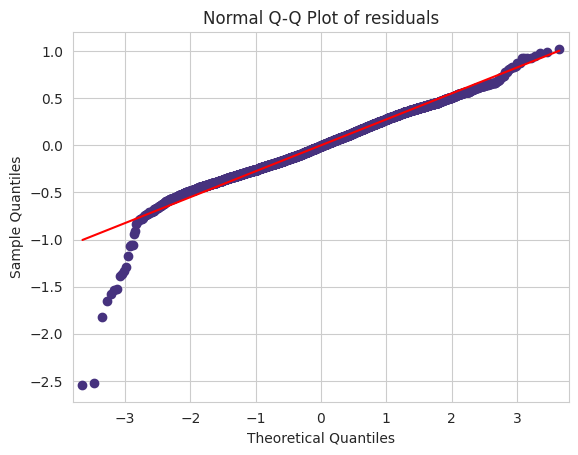

In [ ]:
qqplot=sma.qqplot(multilinear_regression_model.resid,line='q')
plt.title("Normal Q-Q Plot of residuals")
plt.show()

Text(0.5, 1.0, 'Normal distribution of residuals')

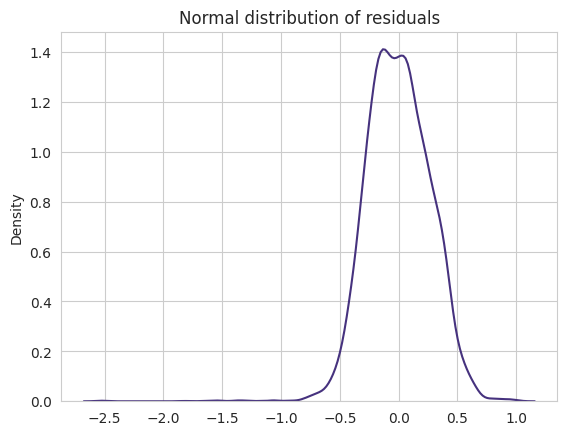

In [ ]:
sns.kdeplot(multilinear_regression_model.resid)
plt.title("Normal distribution of residuals")

There is slight deviation in Q-Q plot but for majority of the points its follow the straight line and we can say its reasonably normally distributed

### Residual Plot for Homoscedasticity

In [ ]:
#def get_standardized_values( vals ):
  #  return (vals - vals.mean())/vals.std()

In [ ]:
#plt.scatter(get_standardized_values(multilinear_regression_model.fittedvalues),
 #           get_standardized_values(multilinear_regression_model.resid))

#plt.title('Residual Plot')
#plt.xlabel('Standardized Fitted values')
#plt.ylabel('Standardized residual values')
#plt.show()

So except some negative fluctuations majority of datas are Following homoscadacity since no Funnal shape graph present here

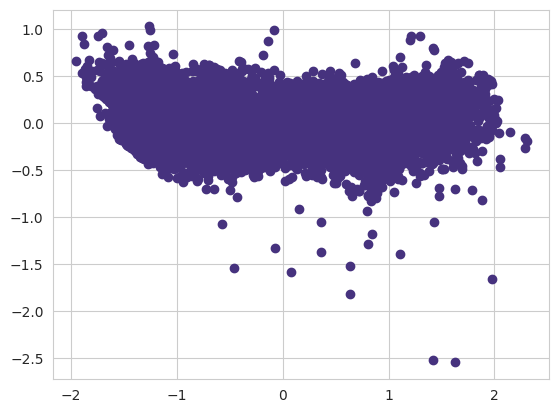

In [ ]:
plt.scatter(multilinear_regression_model.fittedvalues,
            multilinear_regression_model.resid)

In [ ]:
list(np.where(multilinear_regression_model.resid>0.75))

[array([ 453,  556, 1159, 2086, 3368, 3783, 4023, 4187, 4424, 4468, 4669,
        4707, 5161, 5404, 6018, 6523, 6825, 7317])]

In [ ]:
list(np.where(multilinear_regression_model.resid<-0.75))

[array([ 101,  470,  887,  962, 1081, 1094, 1548, 1680, 2035, 2148, 2314,
        3348, 3560, 3887, 4496, 4636, 4775, 5266, 5548, 5681, 5774, 6556,
        6666, 6840, 7159, 7375])]

from above we can see that where and all we can see that error/residual is more so we will give above 15 and less than -15 based on residauls of each entries
but when i re run this code after standardising data i gave above 0.75 and below -0.75 values.

### Residual Vs Regressors

This from following plots first graph explains helps us how each feature related to error

In [ ]:
Train.head(1)

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
5695        20.36            60.1       1011.21       84.79             454.25

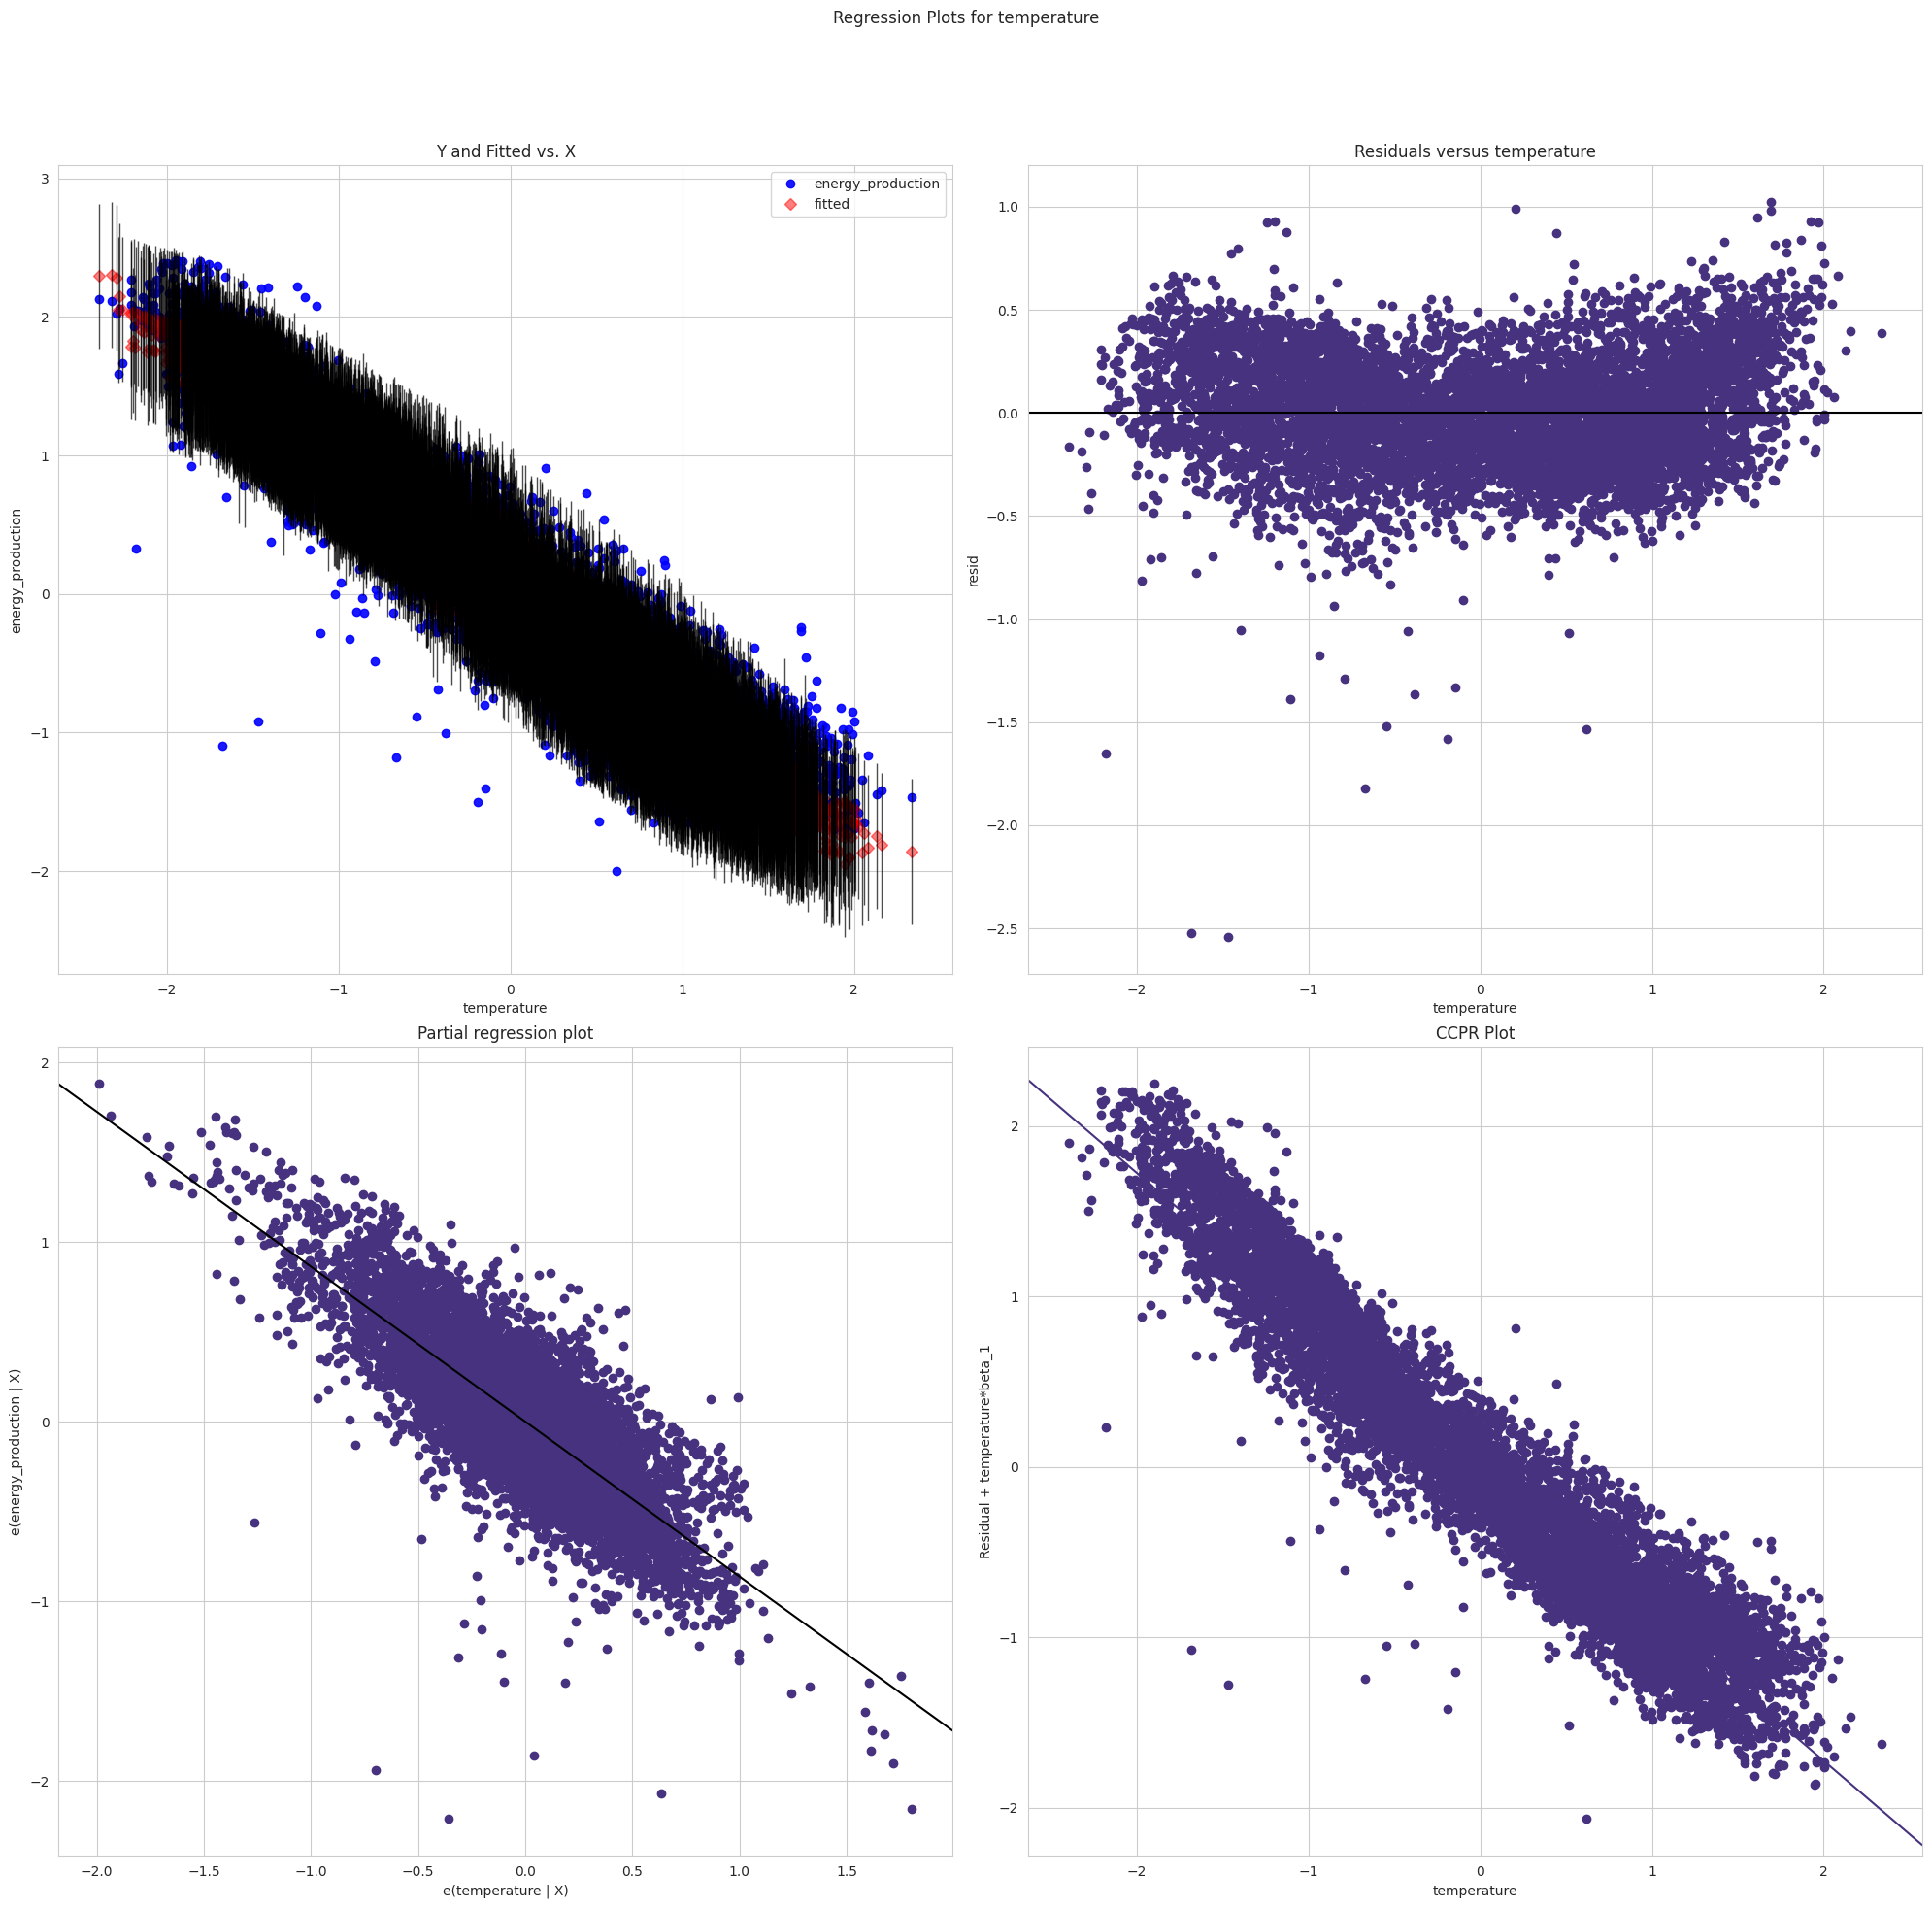

In [ ]:
fig = plt.figure(figsize=(20,20))
fig = sma.graphics.plot_regress_exog(multilinear_regression_model, "temperature", fig=fig)
plt.show()

From partial regression plot the plot has reasonable slop so we can conclude that Temperature making good contribution on predicting Y or Target variable.We will do for all following models...

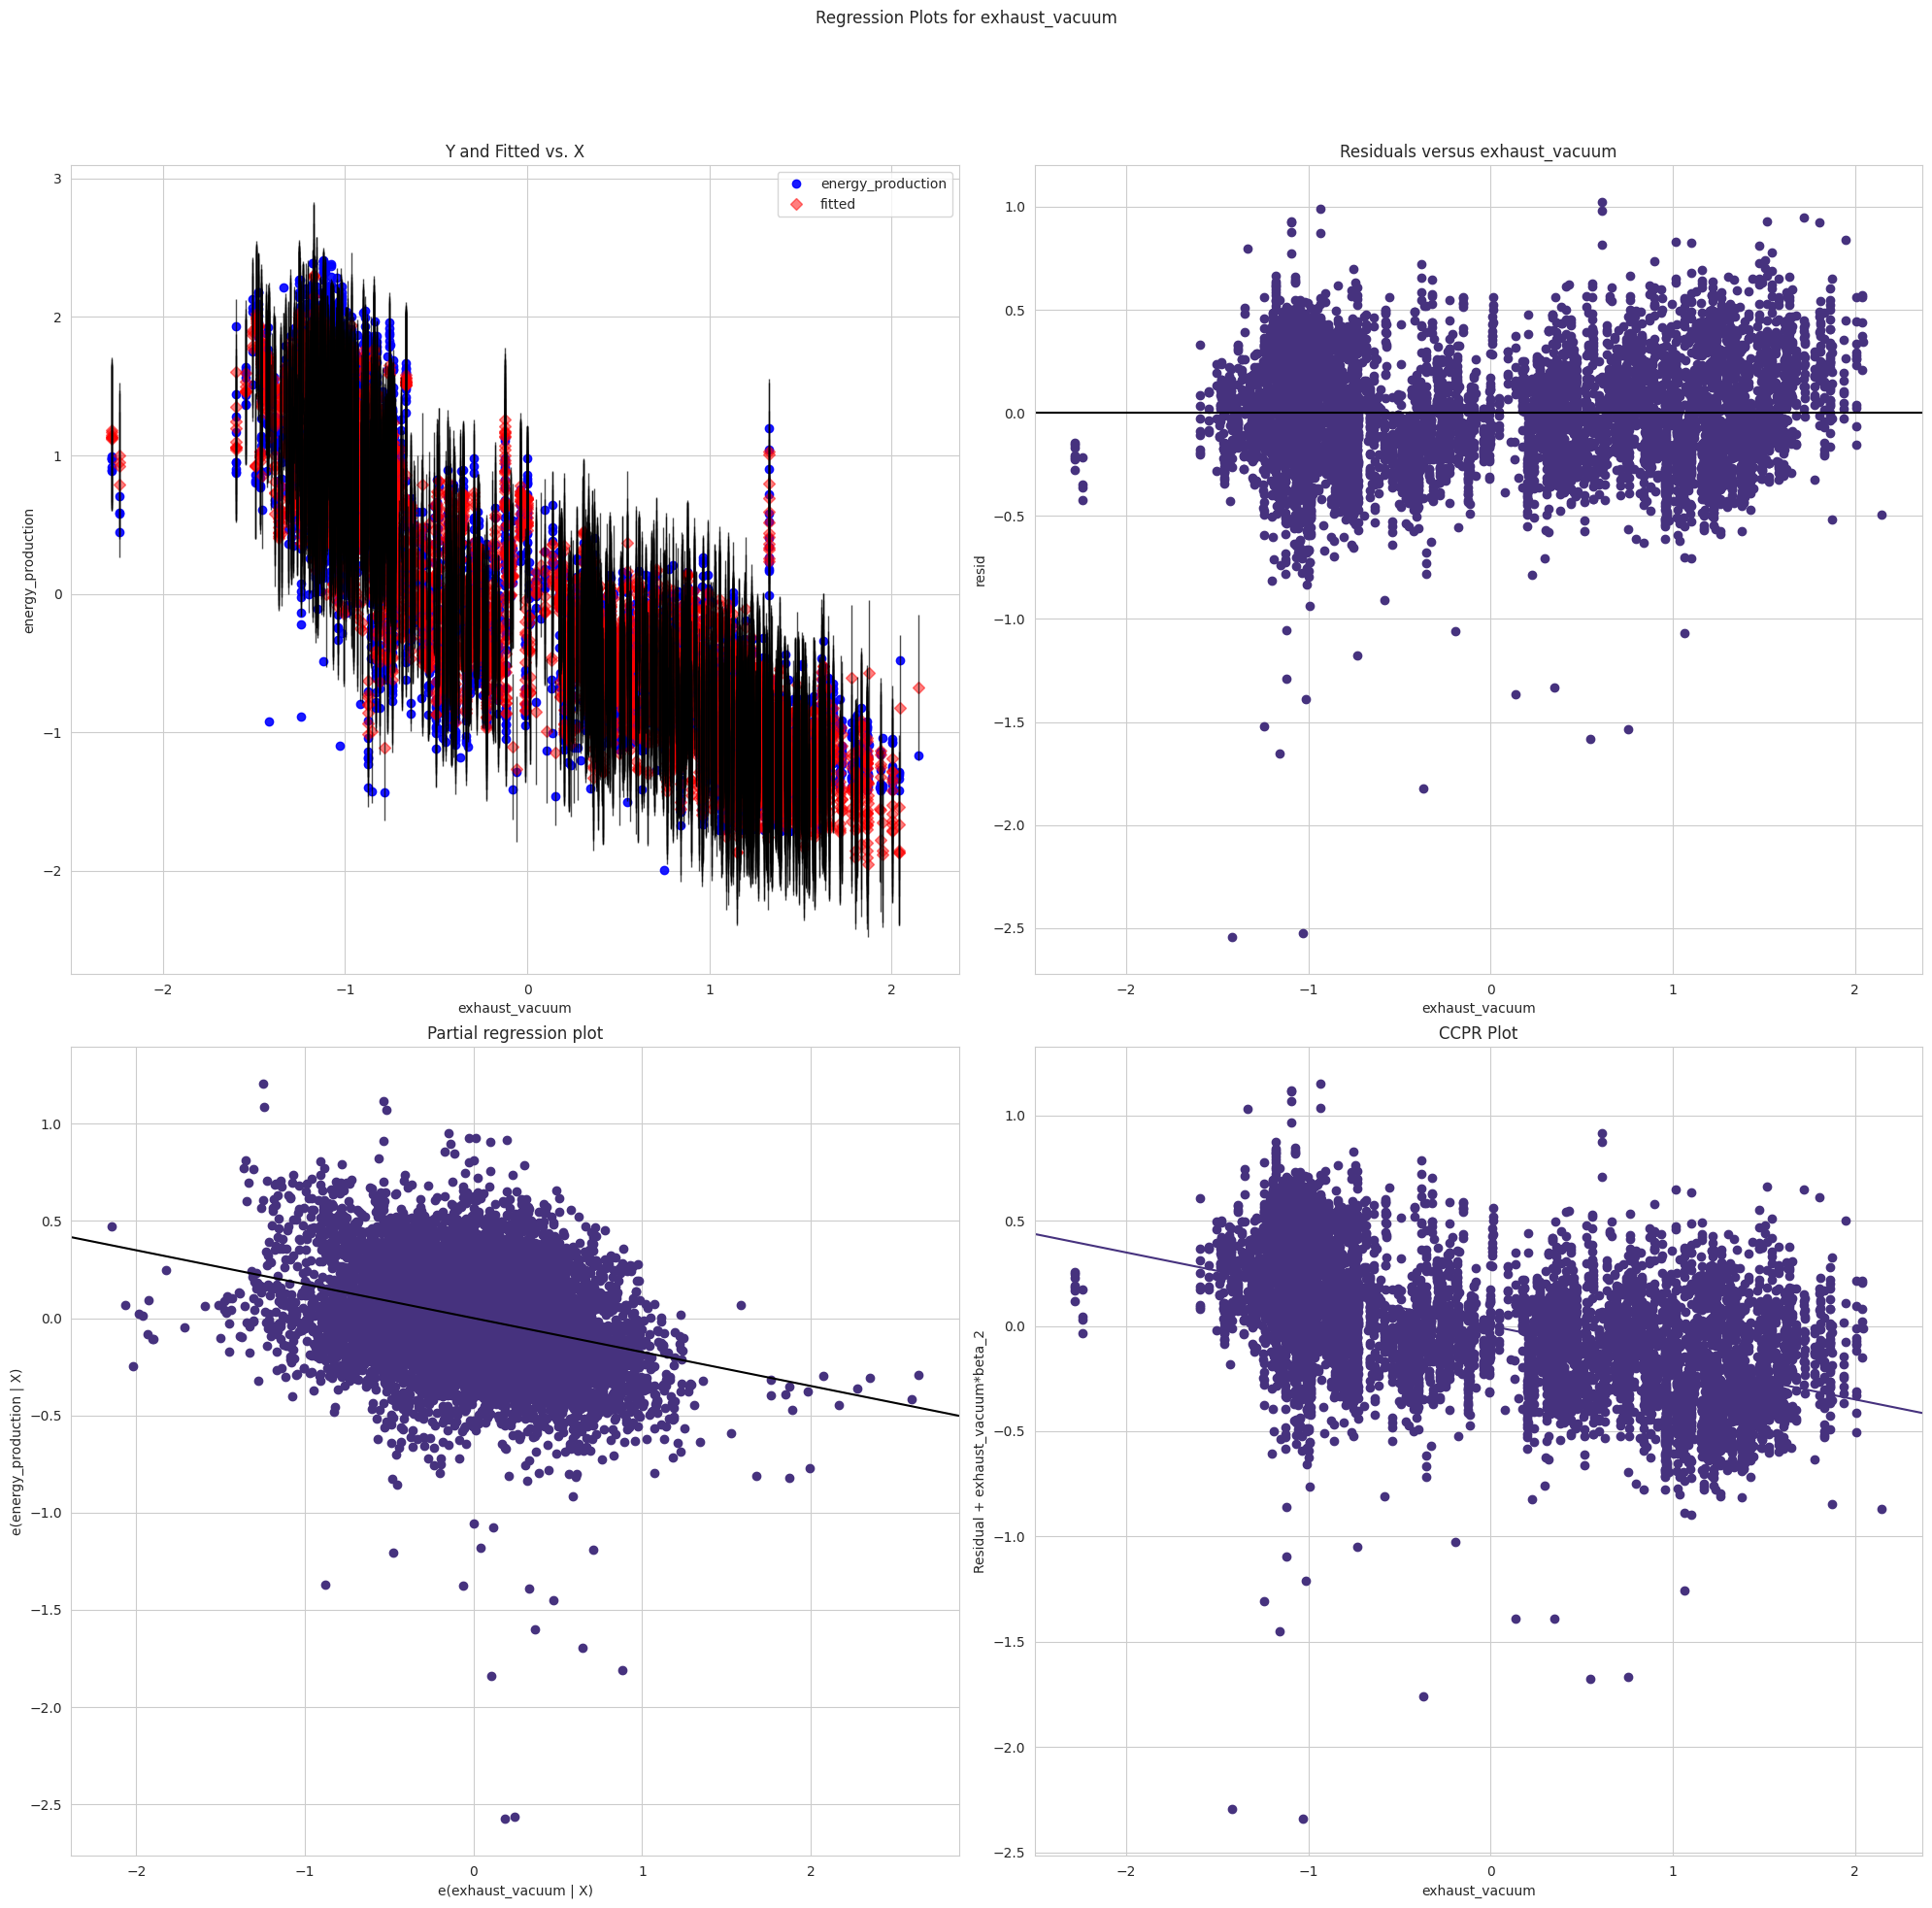

In [ ]:
fig = plt.figure(figsize=(20,20))
fig = sma.graphics.plot_regress_exog(multilinear_regression_model, "exhaust_vacuum", fig=fig)
plt.show()

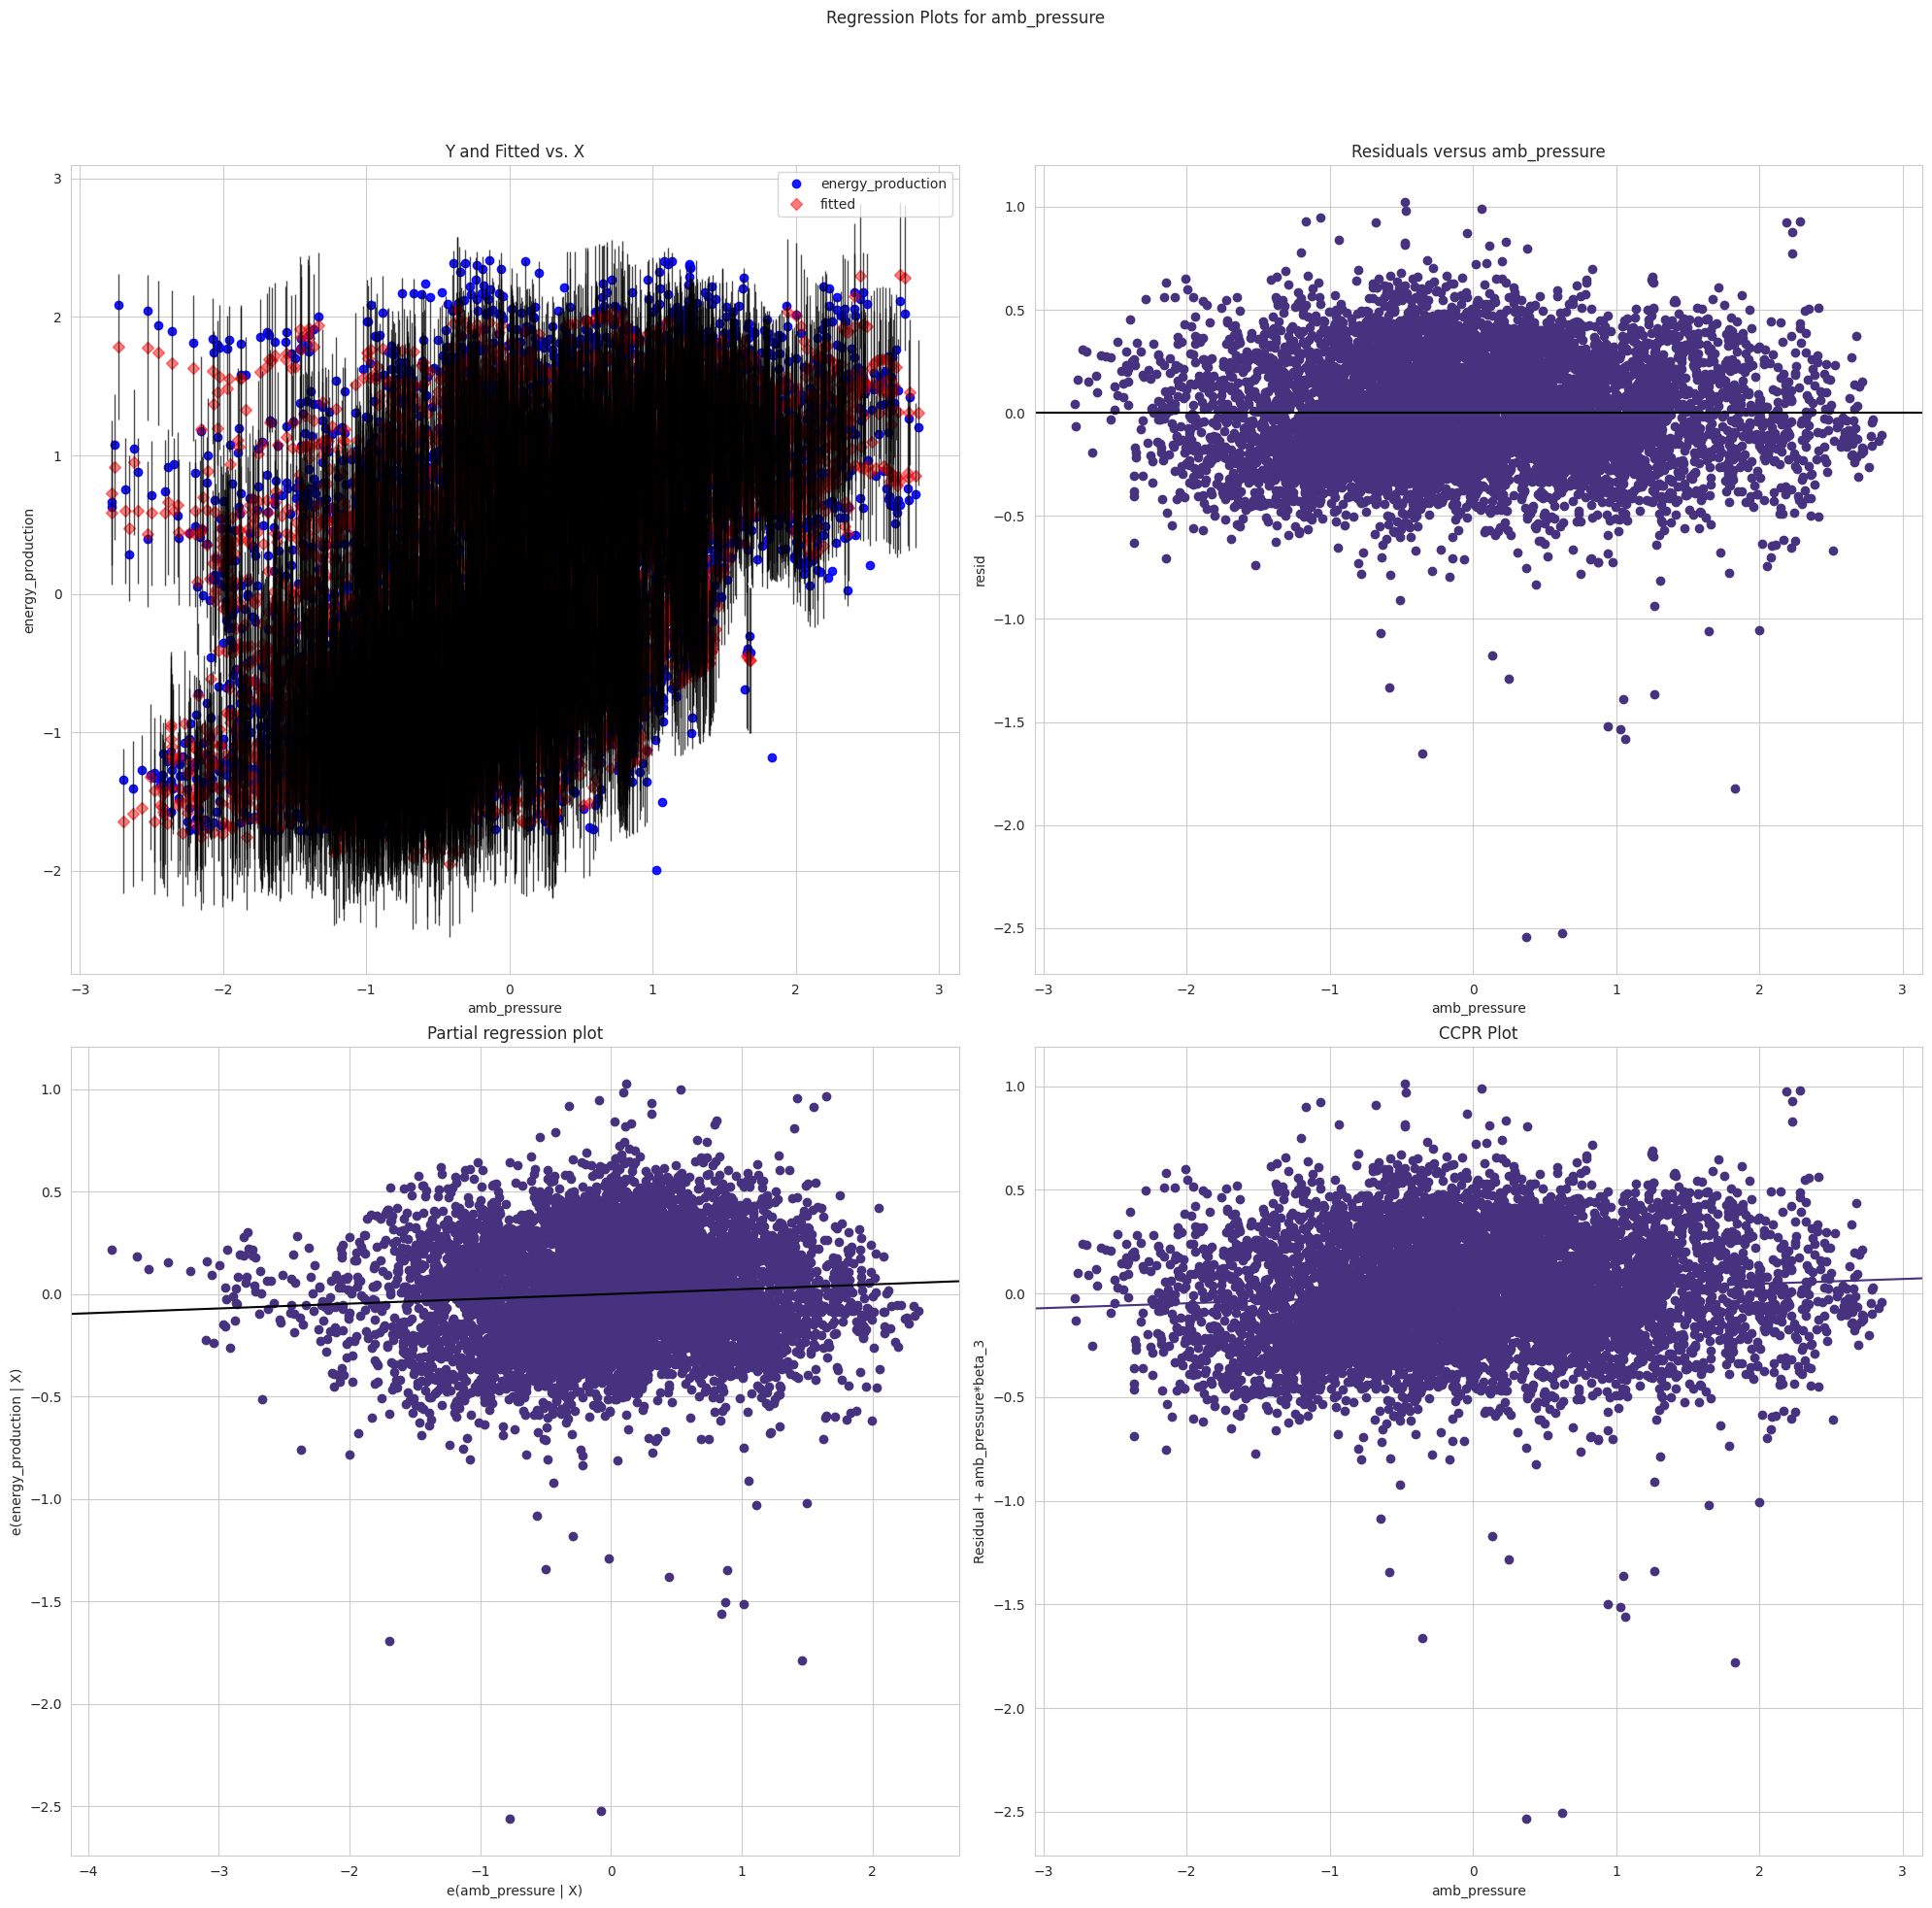

In [ ]:
fig = plt.figure(figsize=(20,20))
fig = sma.graphics.plot_regress_exog(multilinear_regression_model, "amb_pressure", fig=fig)
plt.show()

Here ambiant pressure have less slope but still we are getting slope we can tell that it have impact on Energy production

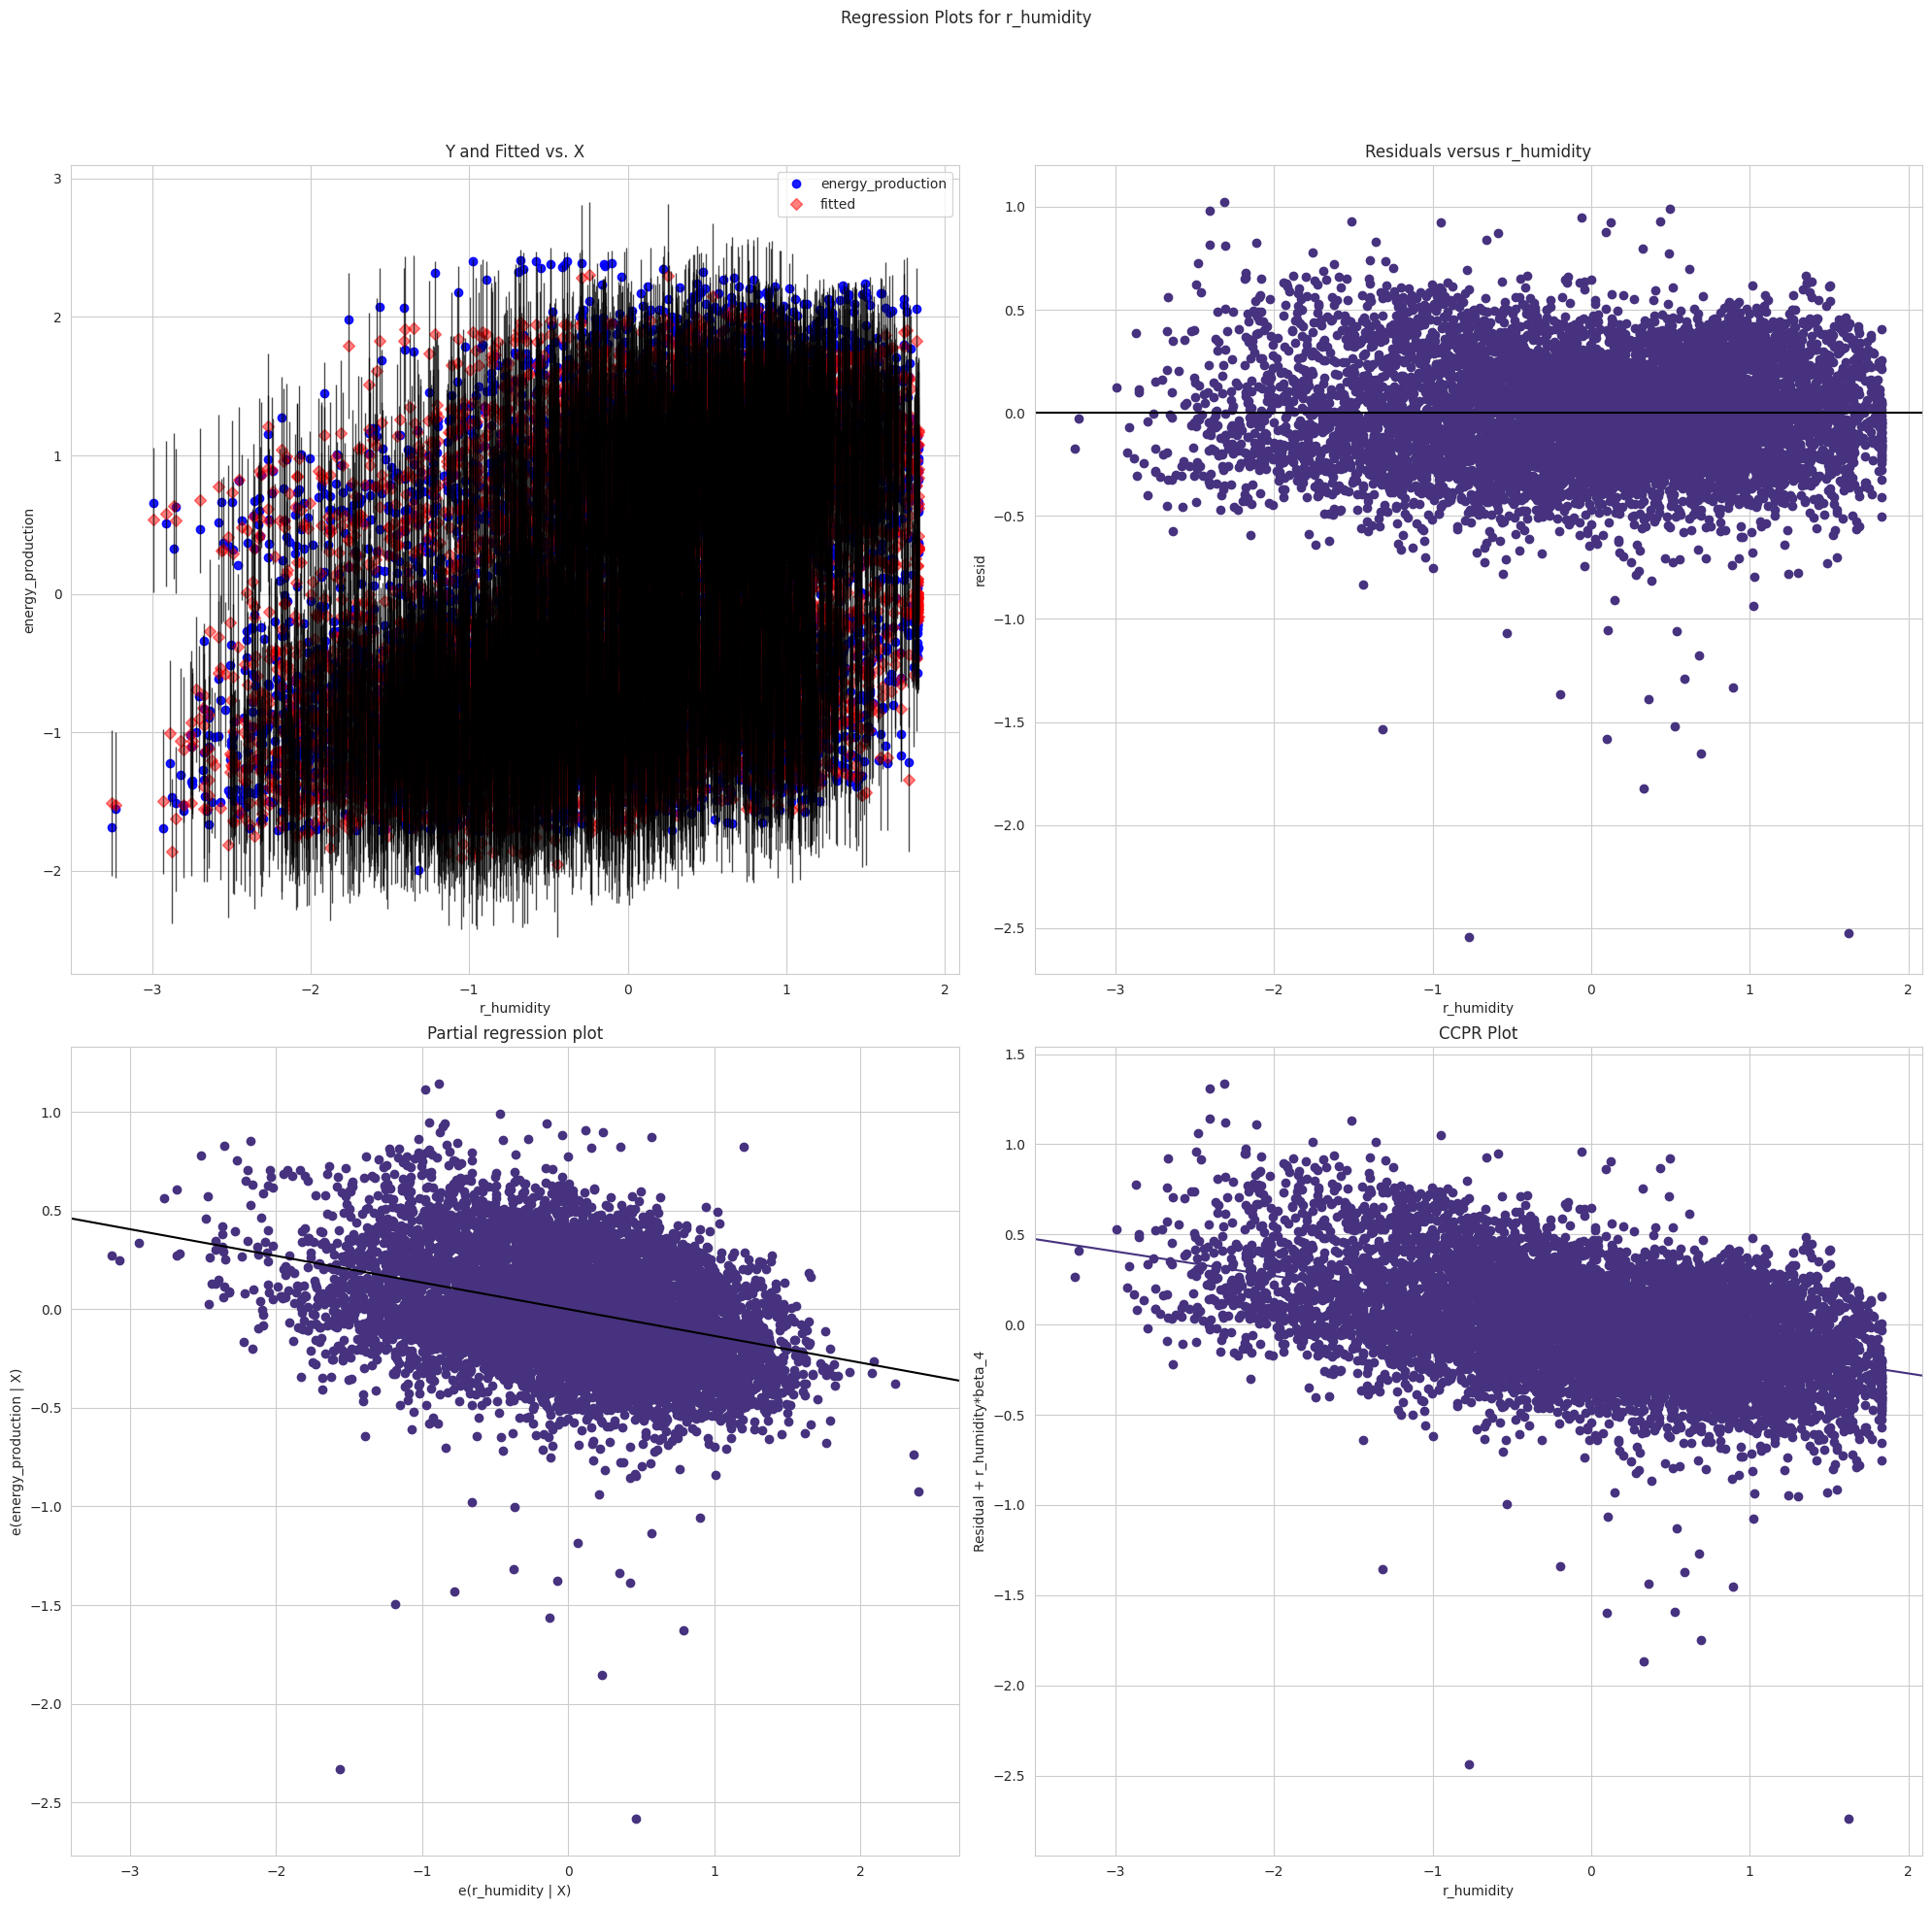

In [ ]:
fig = plt.figure(figsize=(20,20))
fig = sma.graphics.plot_regress_exog(multilinear_regression_model, "r_humidity", fig=fig)
plt.show()

So from above all plots we can CONCLUDE THAT ALL X have impact on Energy production.Here from partial_regression_plot we can see that what is the effect of each feature to Energy production

## Detecting Influencers/Outliers

We have analysed residual analysis...So we will check for any influence point or not since we could find some points have high errors (out of +-15)
from previous residual analysis and we will once more recheck is there any outliers there based on the above model.

### Cook’s Distance

Here we will check each rows are high influencial or not it in regression equation or our model .If our beta coeff. changes when we not considering that perticular row in cooks distance calculation process then we can say that perticular data point have influence on our model and need to be removed if it highly influencial.This we can under stand by cooks distance if high cook distance means it have high influence( means > 1 )

In [ ]:
model_influence = multilinear_regression_model.get_influence()
(c, _) = model_influence.cooks_distance

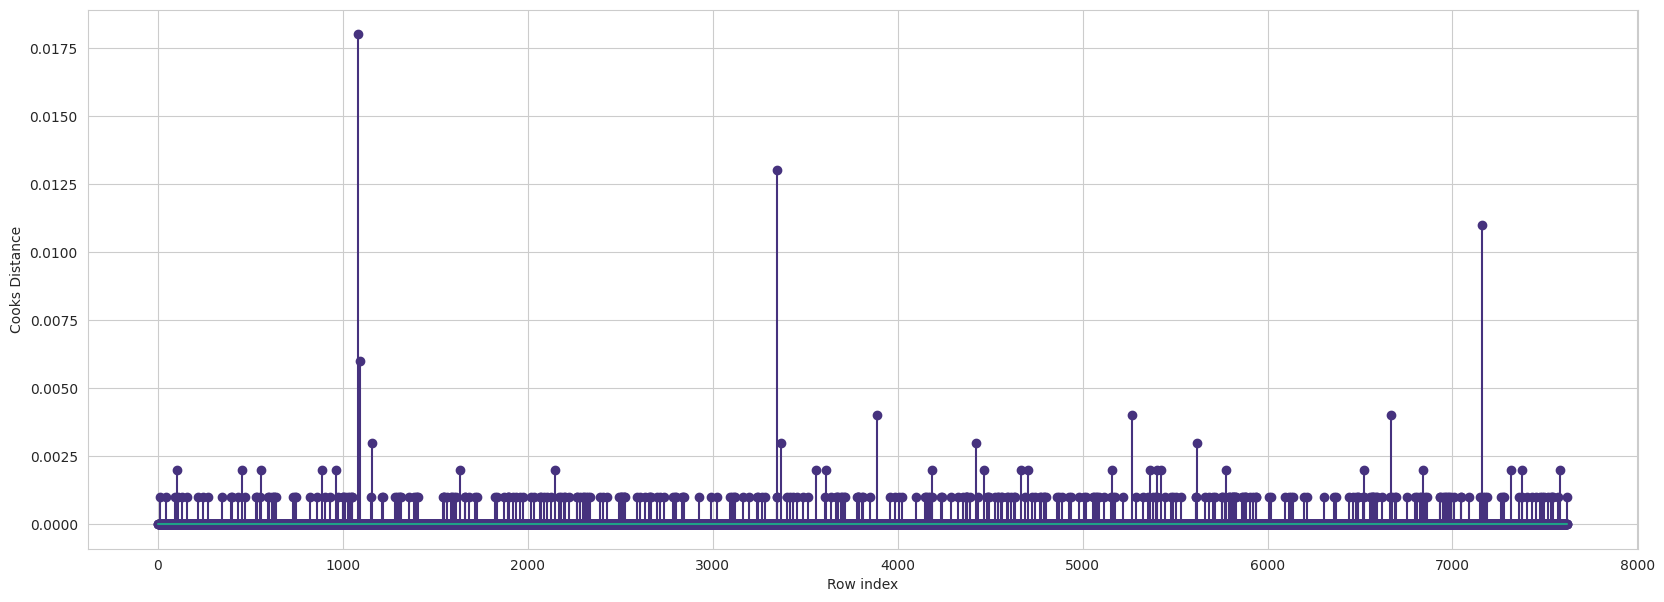

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Train)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

All VALUES OF COOKS DISTANCES ARE LESS THAN ONE SO no much influencial points.

### High influence Points

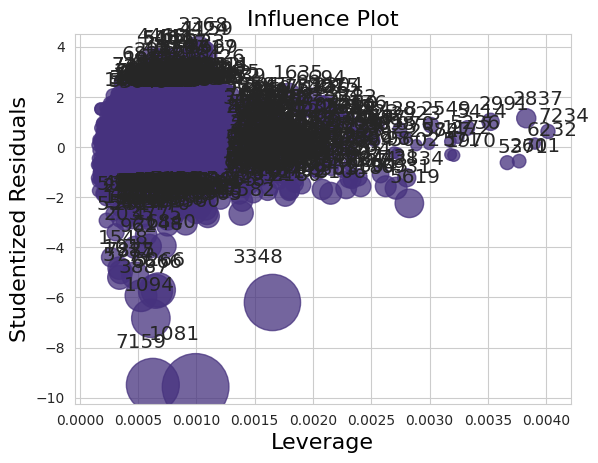

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(multilinear_regression_model)
plt.show()

In [ ]:
#k number of variables
k = df2.shape[1]
n = df2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.0018893670620342183

In [ ]:
high_leverage_indices = np.where(multilinear_regression_model.get_influence().hat_matrix_diag > leverage_cutoff)[0]
high_leverage_indices

array([  28,   98,  416,  571,  658,  779,  903,  970, 1025, 1172, 1263,
       1970, 2123, 2304, 2334, 2372, 2536, 2549, 2601, 2604, 2650, 2671,
       2685, 2834, 2837, 2844, 2923, 2984, 2988, 2991, 3090, 3106, 3284,
       3428, 3473, 3549, 3552, 3623, 3765, 3782, 3856, 3862, 4097, 4183,
       4378, 4423, 4567, 4603, 4687, 4827, 4856, 4860, 4968, 5118, 5176,
       5236, 5371, 5414, 5584, 5602, 5619, 5657, 5723, 5759, 5847, 5928,
       6097, 6118, 6126, 6232, 6303, 6565, 6694, 6741, 6778, 6898, 6931,
       7104, 7234, 7239, 7275, 7401, 7431, 7609])

In [ ]:
Train_scaled[Train_scaled.index.isin(high_leverage_indices )]

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
28      -1.974099       -0.964303     -1.453795    0.519035           1.844106
98      -0.858688       -1.106149     -1.235949   -2.266754           1.151832
416      1.397605       -0.502516     -1.848750   -2.128966          -1.115236
571     -1.811882       -1.168404     -1.457337   -0.927065           1.778343
658     -2.291830       -1.173132      2.763200   -0.289280           2.021432
...           ...             ...           ...         ...                ...
7239    -1.791772       -0.964303     -1.499843    0.304849           1.703185
7275    -1.755575       -1.121910      0.202186   -1.216285           2.316779
7401    -1.972758       -1.121910     -0.226421   -0.401831           2.377257
7431     1.360068       -0.874467     -0.276012   -0.663766          -1.230321
7609     0.633442       -1.040742     -1.937306   -2.354748          -0.152862

[84 rows x 5 columns]

In [ ]:
Train[Train.index.isin(high_leverage_indices )]

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
6118         7.94           40.60       1015.30       92.14             486.33
1025        23.76           58.82       1011.75       77.34             444.57
1172        31.75           74.99       1003.25       53.33             430.82
2372        25.94           60.75       1007.22       64.76             439.46
2549        27.85           66.44       1008.48       77.15             429.00
...           ...             ...           ...         ...                ...
4968        26.95           70.80       1009.73       82.95             436.80
6303        18.88           43.69       1016.77       46.88             464.63
98          29.89           71.29       1009.00       55.72             431.45
6694         7.55           41.04       1027.03       83.32             476.58
5759         7.19           41.39       1018.12       90.76             486.35

[63 rows x 5 columns]

In [ ]:
Train.head(5)

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
5695        20.36           60.10       1011.21       84.79             454.25
7300        24.92           60.95       1014.88       60.58             445.44
9066        25.90           47.45       1007.80       55.96             443.13
6424        20.76           59.21       1017.94       80.84             447.67
6773        21.65           58.18       1008.33       95.28             441.05

In [ ]:
Train_scaled.head(4)

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0     0.091824        0.456521     -0.330916    0.785745          -0.000785
1     0.703155        0.523504      0.319079   -0.865674          -0.518083
2     0.834538       -0.540341     -0.934862   -1.180815          -0.653719
3     0.145450        0.386386      0.861036    0.516307          -0.387144

we can see that temperature columns normal values and the influence have some slight difference so we will remove those points.

### Improving the model

In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Train_new=Train.drop(Train.index[high_leverage_indices],axis=0).reset_index()
Train_new

index  temperature  exhaust_vacuum  amb_pressure  r_humidity  \
0      5695        20.36           60.10       1011.21       84.79   
1      7300        24.92           60.95       1014.88       60.58   
2      9066        25.90           47.45       1007.80       55.96   
3      6424        20.76           59.21       1017.94       80.84   
4      6773        21.65           58.18       1008.33       95.28   
...     ...          ...             ...           ...         ...   
7532   5734        21.58           67.25       1017.39       79.00   
7533   5191         8.35           42.85       1010.46       90.13   
7534   5390        15.14           44.21       1019.97       83.86   
7535    860        21.77           42.23       1013.03       67.44   
7536   7270        26.98           74.78       1009.77       69.54   

      energy_production  
0                454.25  
1                445.44  
2                443.13  
3                447.67  
4                441.05  
...                 ...  
7532             446.15  
7533             483.63  
7534             463.10  
7535             462.51  
7536             442.28  

[7537 rows x 6 columns]

In [ ]:
Train.shape

(7621, 5)

In [ ]:
Train_new_scaled=Train_scaled.drop(Train_scaled.index[high_leverage_indices],axis=0).reset_index()
Train_new_scaled

index  temperature  exhaust_vacuum  amb_pressure  r_humidity  \
0         0     0.091824        0.456521     -0.330916    0.785745   
1         1     0.703155        0.523504      0.319079   -0.865674   
2         2     0.834538       -0.540341     -0.934862   -1.180815   
3         3     0.145450        0.386386      0.861036    0.516307   
4         4     0.264766        0.305218     -0.840993    1.501292   
...     ...          ...             ...           ...         ...   
7532   7616     0.255382        1.019964      0.763626    0.390796   
7533   7617    -1.518282       -0.902836     -0.463748    1.149999   
7534   7618    -0.607989       -0.795664      1.220570    0.722308   
7535   7619     0.280854       -0.951695     -0.008575   -0.397738   
7536   7620     0.979326        1.613353     -0.585954   -0.254492   

      energy_production  
0             -0.000785  
1             -0.518083  
2             -0.653719  
3             -0.387144  
4             -0.775851  
...                 ...  
7532          -0.476394  
7533           1.724323  
7534           0.518861  
7535           0.484218  
7536          -0.703629  

[7537 rows x 6 columns]

In [ ]:
multilinear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.474e+04
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:27:29   Log-Likelihood:                -759.15
No. Observations:                7621   AIC:                             1528.
Df Residuals:                    7616   BIC:                             1563.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        4.08e-16      0.003   1.33e-13      1.000      -0.006       0.006
temperature       -0.8627      0.007   -116.576      0.000      -0.877      -0.848
exhaust_vacuum    -0.1745      0.006    -28.891      0.000      -0.186      -0.163
amb_pressure       0.0235      0.004      6.406      0.000       0.016       0.031
r_humidity        -0.1352      0.004    -33.887      0.000      -0.143      -0.127
==============================================================================
Omnibus:                      672.351   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2975.292
Skew:                          -0.332   Prob(JB):                         0.00
Kurtosis:                       5.988   Cond. No.                         4.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
Test_scaled.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [ ]:
Test

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
1087        26.98           70.94   1007.990000       68.16             434.73
6308        21.37           65.94   1010.730000       75.09             444.74
8021        19.77           56.65   1020.670000       66.33             457.09
9483        23.66           69.51   1012.900000       52.59             435.39
4459        25.44           63.13   1011.740000       77.83             441.91
...           ...             ...           ...         ...                ...
3400        28.61           69.75   1009.820000       71.70             440.53
4210        29.54           72.29   1011.000000       42.00             443.79
7065         7.20           40.02   1013.146891       69.89             480.53
2213        26.90           59.14   1016.180000       70.88             436.16
4983        22.42           60.08   1017.710000       67.46             452.31

[1906 rows x 5 columns]

In [ ]:
Test_scaled['predicted_energy'] = multilinear_regression_model.predict(Test_scaled)
mse1 = mean_squared_error(Test_scaled['energy_production'], Test_scaled['predicted_energy'])
rmse1 = np.sqrt(mse1)
mae1 = mean_absolute_error(Test_scaled['energy_production'], Test_scaled['predicted_energy'])
r21 = r2_score(Test_scaled['energy_production'], Test_scaled['predicted_energy'])

print(f"MSE: {mse1}")
print(f"RMSE: {rmse1}")
print(f"MAE: {mae1}")
print(f"R-squared: {r21}")

MSE: 0.0713146192246125
RMSE: 0.26704797176652084
MAE: 0.21292482045774194
R-squared: 0.9286853807753875


In [ ]:
model_new=sm.ols("energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity", data = Train_new_scaled).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 2.408e+04
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:27:30   Log-Likelihood:                -754.52
No. Observations:                7537   AIC:                             1519.
Df Residuals:                    7532   BIC:                             1554.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0002      0.003     -0.061      0.951      -0.006       0.006
temperature       -0.8518      0.008   -108.750      0.000      -0.867      -0.836
exhaust_vacuum    -0.1810      0.006    -28.851      0.000      -0.193      -0.169
amb_pressure       0.0266      0.004      6.973      0.000       0.019       0.034
r_humidity        -0.1329      0.004    -32.449      0.000      -0.141      -0.125
==============================================================================
Omnibus:                      663.410   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2928.100
Skew:                          -0.331   Prob(JB):                         0.00
Kurtosis:                       5.981   Cond. No.                         5.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Test_scaled['predicted_energy_processed_model'] =model_new.predict(Test_scaled)
mse2 = mean_squared_error(Test_scaled['energy_production'], Test_scaled['predicted_energy_processed_model'])
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(Test_scaled['energy_production'],Test_scaled['predicted_energy_processed_model'])
r22 = r2_score(Test_scaled['energy_production'],Test_scaled['predicted_energy_processed_model'])

print(f"MSE: {mse2}")
print(f"RMSE: {rmse2}")
print(f"MAE: {mae2}")
print(f"R-squared: {r22}")

MSE: 0.07128532824016891
RMSE: 0.26699312395672087
MAE: 0.21307904876323802
R-squared: 0.9287146717598311


Wow   !!!!!!!!!! improved model.....so let us go with our second model.

In [ ]:
PREDICTION=pd.DataFrame()

In [ ]:
PREDICTION["MLR_Predicted"]=(model_new.predict(Test_scaled)*np.std(y_test))+np.mean(y_test)

#### Conclusion

Ohk Vivek then model_new this will be our final multilinear_regression model

# MODEL 2 Decision Tree regressor

In [ ]:
 from sklearn.tree import DecisionTreeRegressor

In [ ]:
DT_model = DecisionTreeRegressor(random_state=0)

### Grid search CV for best hyperparameters of our Tree model.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters={'max_depth':[4,5,8,10,15],'min_samples_split':range(1,5,1)}

In [ ]:
DTgcv=GridSearchCV(estimator=DT_model ,param_grid=parameters,cv=10)

In [ ]:
DTgcv.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [4, 5, 8, 10, 15],
                         'min_samples_split': range(1, 5)})

In [ ]:
results = DTgcv.cv_results_

Here the mean_test_score represesnt the Rsquared values

In [ ]:
results = DTgcv.cv_results_
best_scores = results['mean_test_score']
sorted_indices = best_scores.argsort()[::-1]
best_scores = best_scores[sorted_indices]
params = [results['params'][i] for i in sorted_indices]

# display the best scores for all parameters in descending order
for i, score in enumerate(best_scores):
    print("Parameters:", params[i], "Score:", score)

Parameters: {'max_depth': 8, 'min_samples_split': 3} Score: 0.9391565816984679
Parameters: {'max_depth': 8, 'min_samples_split': 2} Score: 0.9388373969014474
Parameters: {'max_depth': 8, 'min_samples_split': 1} Score: 0.9388373969014474
Parameters: {'max_depth': 8, 'min_samples_split': 4} Score: 0.9387027381495298
Parameters: {'max_depth': 10, 'min_samples_split': 2} Score: 0.9386948522405845
Parameters: {'max_depth': 10, 'min_samples_split': 1} Score: 0.9386948522405845
Parameters: {'max_depth': 10, 'min_samples_split': 3} Score: 0.9380680207916574
Parameters: {'max_depth': 10, 'min_samples_split': 4} Score: 0.9372584904922526
Parameters: {'max_depth': 5, 'min_samples_split': 4} Score: 0.931591372816458
Parameters: {'max_depth': 5, 'min_samples_split': 1} Score: 0.931591372816458
Parameters: {'max_depth': 5, 'min_samples_split': 2} Score: 0.931591372816458
Parameters: {'max_depth': 5, 'min_samples_split': 3} Score: 0.931591372816458
Parameters: {'max_depth': 15, 'min_samples_split': 4

In [ ]:
DTgcv.best_params_

{'max_depth': 8, 'min_samples_split': 3}

In [ ]:
DT = DecisionTreeRegressor(max_depth= 8, min_samples_split=3,random_state=0)
DT_model=DT.fit(x_train_scaled,y_train_scaled)

In [ ]:
print("Feature Importances:", DT_model.feature_importances_)

Feature Importances: [0.93571731 0.04881346 0.0079642  0.00750503]


<BarContainer object of 4 artists>

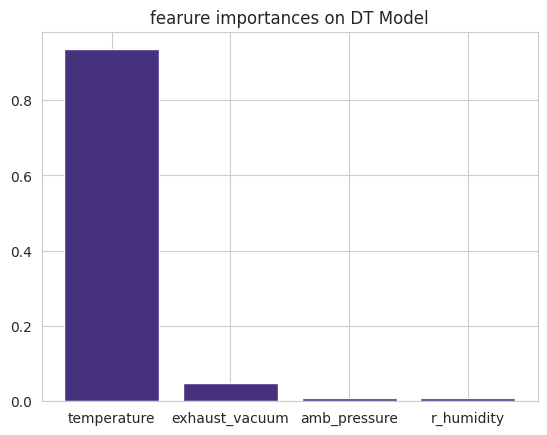

In [ ]:
plt.title("fearure importances on DT Model")
plt.bar(x=['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity'],height=DT_model.feature_importances_)

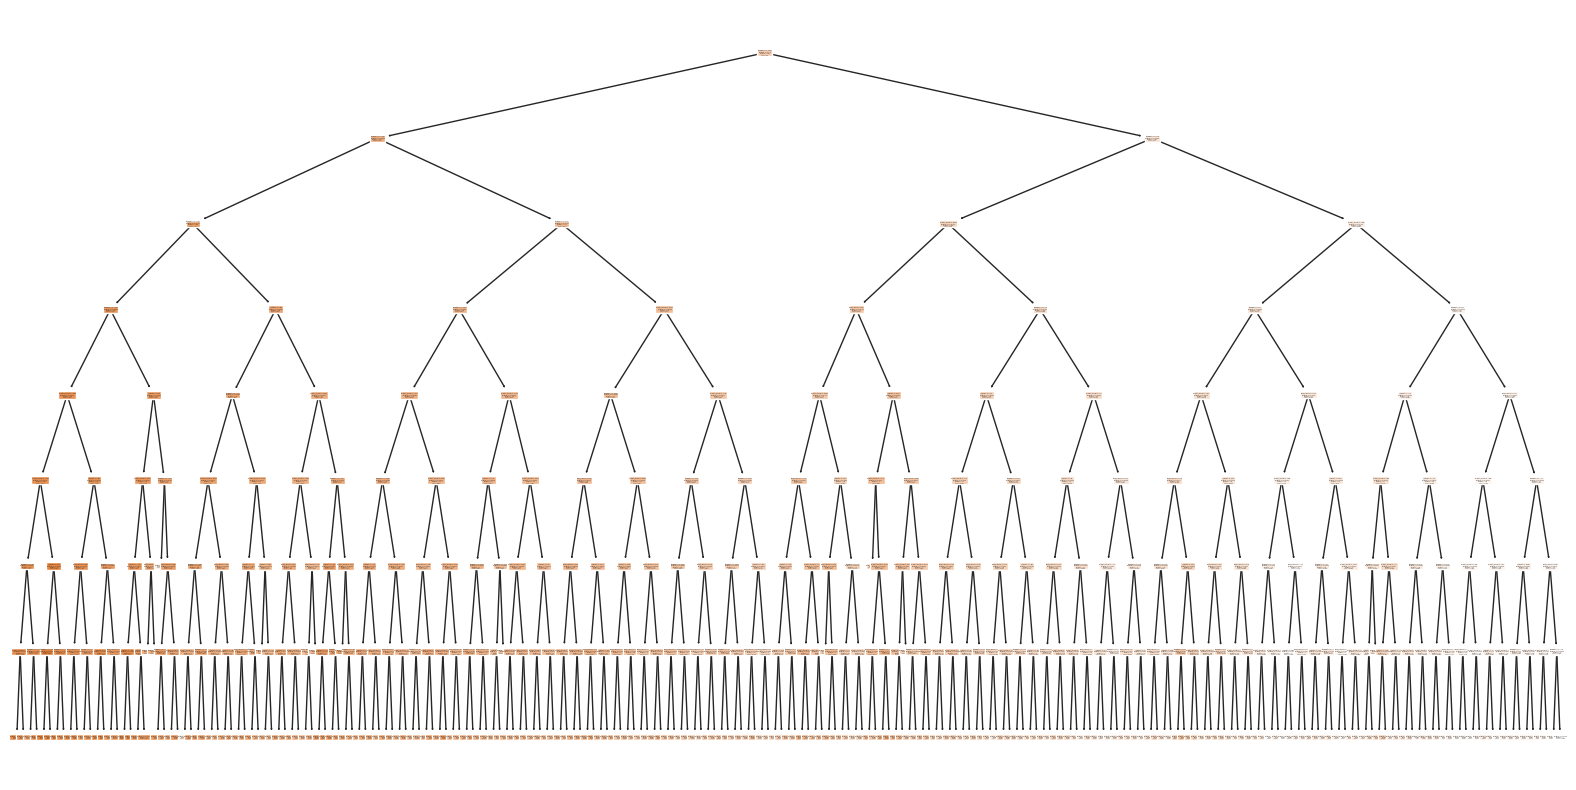

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(DT_model, feature_names=['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity'], filled=True)
plt.show()

### Test Accuracy for DT Model

In [ ]:
predictions = DT_model.predict(x_test_scaled)
DTmse = mean_squared_error(y_test_scaled, predictions)
DTr2 = r2_score(y_test_scaled, predictions)

print("Mean Squared Error:", DTmse)
print("R-squared:", DTr2)

Mean Squared Error: 0.06184344657456588
R-squared: 0.9381565534254341


So this DT model performs better than MLR model based on R squared values....let us explore more models

In [ ]:
PREDICTION["XGB_Predicted"]=(DT_model.predict(x_test_scaled)*np.std(y_test))+np.mean(y_test)

# ENSEMBLE Models

# XGboost

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
model_xgb=xgb.XGBRegressor(random_state=0)

### GCV for XGB regressor

In [ ]:
params = {
    "n_estimators": [10, 20, 50, 100],
    "max_depth": range(3, 10, 1),
    "learning_rate": [0.01, 0.1],
}

In [ ]:
XGBgcv=GridSearchCV(estimator=model_xgb,param_grid=params,cv=10)

In [ ]:
XGBgcv.fit(x_train_scaled, y_train_scaled)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': range(3, 10),
                         'n_estimators': [10, 20, 50, 100]})

In [ ]:
results = XGBgcv.cv_results_

In [ ]:
best_scores = results['mean_test_score']
sorted_indices = best_scores.argsort()[::-1]
best_scores = best_scores[sorted_indices]
params = [results['params'][i] for i in sorted_indices]

# display the best scores for all parameters in descending order
for i, score in enumerate(best_scores):
    print("Parameters:", params[i], "Score:", score)

Parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100} Score: 0.9634100452646569
Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100} Score: 0.9631853228490665
Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100} Score: 0.9617763171888722
Parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 50} Score: 0.9613631409962873
Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 50} Score: 0.9606432298944583
Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100} Score: 0.959383323575407
Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50} Score: 0.9587937814061929
Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100} Score: 0.9560091871189371
Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50} Score: 0.9557139039688695
Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50} Score: 0.9521155633206391
Parameters: {'learning_rat

In [ ]:
XGBgcv.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}

In [ ]:
XGB= xgb.XGBRegressor(max_depth= 9, learning_rate=0.1,n_estimators=100,random_state=0)
model_xgb=XGB.fit(x_train_scaled,y_train_scaled)

In [ ]:
print("Feature Importances:", model_xgb.feature_importances_)

Feature Importances: [0.9006232  0.06543817 0.0165318  0.01740682]


<BarContainer object of 4 artists>

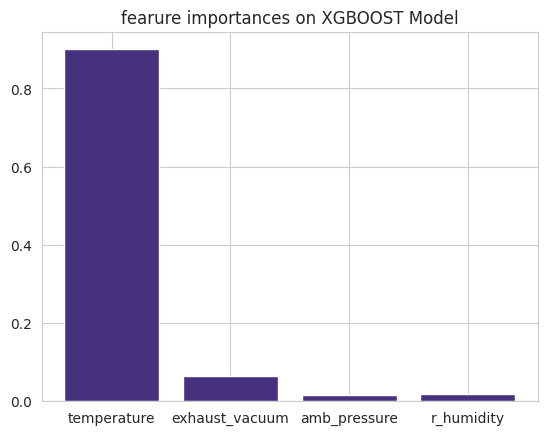

In [ ]:
plt.title("fearure importances on XGBOOST Model")
plt.bar(x=['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity'],height=model_xgb.feature_importances_)

### Testing Accuracy for XGBoost model

In [ ]:
predictions = model_xgb.predict(x_test_scaled)
XGBmse = mean_squared_error(y_test_scaled, predictions)
XGBr2 = r2_score(y_test_scaled, predictions)

print("Mean Squared Error:", XGBmse)
print("R-squared:", XGBr2)

Mean Squared Error: 0.045633965283861995
R-squared: 0.954366034716138


So xgboost performs better than other previous models.

In [ ]:
PREDICTION["XGB_Predicted"]=(model_xgb.predict(x_test_scaled)*np.std(y_test))+np.mean(y_test)

# Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
params={
    'n_estimators':[10,30,50],
    'max_depth':[4,5,8,10,15],
    'min_samples_split':range(1,5,1)
}

In [ ]:
RFmodel=RandomForestRegressor(random_state=0)

In [ ]:
RFgcv=GridSearchCV(estimator=RFmodel,param_grid=params,cv=10)

In [ ]:
RFgcv.fit(x_train_scaled, y_train_scaled)

In [ ]:
results = RFgcv.cv_results_

In [ ]:
best_scores = results['mean_test_score']
sorted_indices = best_scores.argsort()[::-1]
best_scores = best_scores[sorted_indices]
params = [results['params'][i] for i in sorted_indices]

# display the best scores for all parameters in descending order
for i, score in enumerate(best_scores):
    print("Parameters:", params[i], "Score:", score)

Parameters: {'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 50} Score: 0.9597263018754273
Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 50} Score: 0.9596919692958394
Parameters: {'max_depth': 15, 'min_samples_split': 1, 'n_estimators': 50} Score: 0.9596919692958394
Parameters: {'max_depth': 15, 'min_samples_split': 4, 'n_estimators': 50} Score: 0.9596343147538562
Parameters: {'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 30} Score: 0.9591514842234924
Parameters: {'max_depth': 15, 'min_samples_split': 4, 'n_estimators': 30} Score: 0.9590686420006207
Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 30} Score: 0.95904435946422
Parameters: {'max_depth': 15, 'min_samples_split': 1, 'n_estimators': 30} Score: 0.95904435946422
Parameters: {'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 10} Score: 0.9568009563979913
Parameters: {'max_depth': 15, 'min_samples_split': 4, 'n_estimators': 10} Score: 0.9567349439366113
Para

In [ ]:
RFgcv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 50}

In [ ]:
RF= RandomForestRegressor(max_depth= 15,min_samples_split=3,n_estimators=50,random_state=0)
model_RF=RF.fit(x_train_scaled,y_train_scaled)

In [ ]:
print("Feature Importances:", model_RF.feature_importances_)

Feature Importances: [0.90176461 0.06373852 0.01813142 0.01636545]


<BarContainer object of 4 artists>

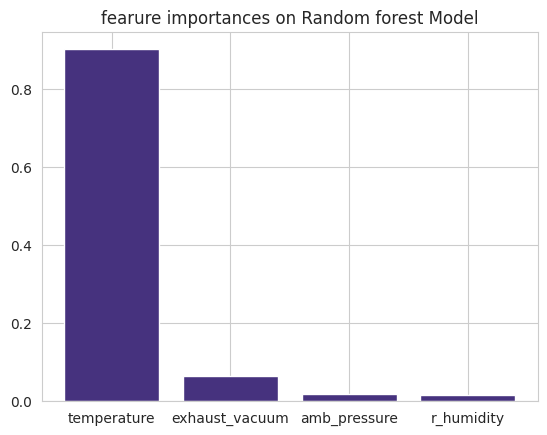

In [ ]:
plt.title("fearure importances on Random forest Model")
plt.bar(x=['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity'],height=model_RF.feature_importances_)

In [ ]:
model_RF.predict(x_test_scaled)

array([-1.14392201, -0.42050183,  0.13613243, ...,  1.8979922 ,
       -0.90180467, -0.28995064])

In [ ]:
predictions = model_RF.predict(x_test_scaled)
rfmse = mean_squared_error(y_test_scaled, predictions)
rfr2 = r2_score(y_test_scaled, predictions)

print("Mean Squared Error:", rfmse)
print("R-squared:", rfr2)

Mean Squared Error: 0.04407414360307225
R-squared: 0.9559258563969277


In [ ]:
np.std(x_test)

temperature        7.382819
exhaust_vacuum    12.668779
amb_pressure       5.686361
r_humidity        14.388525
dtype: float64

In [ ]:
PREDICTION["RF_Predicted"]=(model_RF.predict(x_test_scaled)*np.std(y_test))+np.mean(y_test)

# SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
params={'C':[0.1,1,10],
        'kernel':['linear','rbf'],
        'gamma':[0.1,1]}

In [ ]:
svm=SVR()

In [ ]:
svmgcv=GridSearchCV(estimator=svm,param_grid=params,cv=10)

In [ ]:
svmgcv.fit(x_train_scaled, y_train_scaled)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [ ]:
results = svmgcv.cv_results_

In [ ]:
best_scores = results['mean_test_score']
sorted_indices = best_scores.argsort()[::-1]
best_scores = best_scores[sorted_indices]
params = [results['params'][i] for i in sorted_indices]

# display the best scores for all parameters in descending order
for i, score in enumerate(best_scores):
    print("Parameters:", params[i], "Score:", score)

Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'} Score: 0.9496230649968206
Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'} Score: 0.9479047289116981
Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} Score: 0.9429819348526027
Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} Score: 0.9414401842263107
Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'} Score: 0.9400199973291128
Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'} Score: 0.939501080579533
Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'} Score: 0.9278513618998024
Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'} Score: 0.9278513618998024
Parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'} Score: 0.9278310667413715
Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'} Score: 0.9278310667413715
Parameters: {'C': 10, 'gamma': 1, 'kernel': 'linear'} Score: 0.9278242758870258
Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'} Score: 0.9278242758870258


In [ ]:
svmgcv.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
svm= SVR(C= 10, gamma= 1, kernel='rbf')
model_svm=svm.fit(x_train_scaled,y_train_scaled)

In [ ]:
predictions = model_svm.predict(x_test_scaled)
svmmse = mean_squared_error(y_test_scaled, predictions)
svmr2 = r2_score(y_test_scaled, predictions)

print("Mean Squared Error:", svmmse)
print("R-squared:", svmr2)

Mean Squared Error: 0.05127028213849673
R-squared: 0.9487297178615033


In [ ]:
PREDICTION["SVM_Predicted"]=(model_svm.predict(x_test_scaled)*np.std(y_test))+np.mean(y_test)

# Stacking Model

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [ ]:
base_models = [
    ("xgb", xgb.XGBRegressor(max_depth= 9, learning_rate=0.1,n_estimators=100,random_state=0)),
    ("rf", RandomForestRegressor(max_depth= 15,min_samples_split=3,n_estimators=50,random_state=0)),
    ("dt",DecisionTreeRegressor(max_depth= 8, min_samples_split=3,random_state=0)),
    ("svm",SVR(C= 10, gamma= 1, kernel='rbf'))
]

In [ ]:
meta_model = LinearRegression()

In [ ]:
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_regressor.fit(x_train_scaled,y_train_scaled)

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=0, ...)),
                              ('rf',
                               RandomForestRegressor(max_depth=15,
                                                     min_samples_split=3,
                                                     n_estimators=50,
                                                     random_state=0)),
                              ('dt',
                               DecisionTreeRegressor(max_depth=8,
                                                     min_samples_split=3,
                                                     random_state=0)),
                              ('svm', SVR(C=10, gamma=1))],
                  final_estimator=LinearRegression())

In [ ]:
y_pred = stacking_regressor.predict(x_test_scaled)
stack_r2 = r2_score(y_test_scaled, y_pred)
STACKmse = mean_squared_error(y_test_scaled, predictions)
print("R-squared of stack model:", stack_r2)
print("MSE of stack model:", STACKmse)

R-squared of stack model: 0.9560022723136854
MSE of stack model: 0.05127028213849673


In [ ]:
PREDICTION["STACK_Predicted"]=(stacking_regressor.predict(x_test_scaled)*np.std(y_test))+np.mean(y_test)

# Neural Network Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.preprocessing import sequence
from keras.wrappers.scikit_learn import KerasRegressor

from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from sklearn.model_selection import KFold

In [ ]:
df2.shape

(9527, 5)

Regression Problem
A problem where you predict a real-value quantity.
  Output Layer Configuration: One node with a linear activation unit.
  Loss Function: Mean Squared Error (MSE).

In [ ]:
# create model
def create_model():
    modelnn = Sequential()
    modelnn.add(Dense(8, input_dim=4, kernel_initializer='normal', activation='relu'))
    modelnn.add(Dense(12, kernel_initializer='normal', activation='relu'))
    modelnn.add(Dense(12, kernel_initializer='normal', activation='relu'))
    modelnn.add(Dense(6, kernel_initializer='normal', activation='relu'))
    modelnn.add(Dense(1, kernel_initializer='normal', activation='linear'))

    adam=Adam(learning_rate=0.01)
    modelnn.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error'])

    return modelnn

In [ ]:
modelnn = KerasRegressor(build_fn = create_model,verbose = 0)

### Hyper parameter tuning for batch size and epochs

In [ ]:
import random
np.random.seed(42)

In [ ]:
batch_size = [10,20,40]
epochs = [10,20]
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
gridnn = GridSearchCV(estimator = modelnn,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_resultnn = gridnn.fit(x_train_scaled,y_train_scaled)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START batch_size=10, epochs=10....................................
[CV 1/5; 1/6] END ....batch_size=10, epochs=10;, score=-0.068 total time=  11.1s
[CV 2/5; 1/6] START batch_size=10, epochs=10....................................
[CV 2/5; 1/6] END ....batch_size=10, epochs=10;, score=-0.061 total time=  10.7s
[CV 3/5; 1/6] START batch_size=10, epochs=10....................................
[CV 3/5; 1/6] END ....batch_size=10, epochs=10;, score=-0.174 total time=  10.9s
[CV 4/5; 1/6] START batch_size=10, epochs=10....................................
[CV 4/5; 1/6] END ....batch_size=10, epochs=10;, score=-0.064 total time=  10.6s
[CV 5/5; 1/6] START batch_size=10, epochs=10....................................
[CV 5/5; 1/6] END ....batch_size=10, epochs=10;, score=-0.068 total time=  10.6s
[CV 1/5; 2/6] START batch_size=10, epochs=20....................................
[CV 1/5; 2/6] END ....batch_size=10, epochs=20;, 

In [ ]:
print('Best : {}, using {}'.format(grid_resultnn.best_score_,grid_resultnn.best_params_))
means = grid_resultnn.cv_results_['mean_test_score']
stds = grid_resultnn.cv_results_['std_test_score']
params = grid_resultnn.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.0625042125582695, using {'batch_size': 20, 'epochs': 20}
-0.08703326508402824,0.04379454045707475 with: {'batch_size': 10, 'epochs': 10}
-0.06735035553574562,0.005774227623675987 with: {'batch_size': 10, 'epochs': 20}
-0.25376363322138784,0.3737758662042771 with: {'batch_size': 20, 'epochs': 10}
-0.0625042125582695,0.003403262337413855 with: {'batch_size': 20, 'epochs': 20}
-0.2513196036219597,0.3780907148905166 with: {'batch_size': 40, 'epochs': 10}
-0.06366980969905853,0.004807704308692449 with: {'batch_size': 40, 'epochs': 20}


### Tuning of Hyperparameters:- Learning rate and Drop out rate

In [ ]:
def create_model2(learning_rate, dropout_rate):
    modelnn2 = Sequential()
    modelnn2.add(Dense(8, input_dim=4, kernel_initializer='normal', activation='relu'))
    modelnn2.add(Dropout(dropout_rate))
    modelnn2.add(Dense(12, kernel_initializer='normal', activation='relu'))
    modelnn2.add(Dropout(dropout_rate))
    modelnn2.add(Dense(12, kernel_initializer='normal', activation='relu'))
    modelnn2.add(Dropout(dropout_rate))
    modelnn2.add(Dense(6, kernel_initializer='normal', activation='relu'))
    modelnn2.add(Dropout(dropout_rate))
    modelnn2.add(Dense(1, kernel_initializer='normal', activation='linear'))

    adam=Adam(learning_rate=learning_rate)
    modelnn2.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error'])

    return modelnn2

In [ ]:
modelnn2 = KerasRegressor(build_fn=create_model2, batch_size=20, epochs=20, verbose=0)

In [ ]:
learning_rate = [0.001,0.01]
dropout_rate = [0.1,0.2]
params=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)

In [ ]:
np.random.seed(42)
gridnn2 = GridSearchCV(estimator = modelnn2,param_grid = params,cv = KFold(),verbose = 10)
grid_resultnn2 = gridnn2.fit(x_train_scaled,y_train_scaled)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START dropout_rate=0.1, learning_rate=0.001.......................
[CV 1/5; 1/4] END dropout_rate=0.1, learning_rate=0.001;, score=-0.999 total time=  12.0s
[CV 2/5; 1/4] START dropout_rate=0.1, learning_rate=0.001.......................
[CV 2/5; 1/4] END dropout_rate=0.1, learning_rate=0.001;, score=-0.074 total time=  11.7s
[CV 3/5; 1/4] START dropout_rate=0.1, learning_rate=0.001.......................
[CV 3/5; 1/4] END dropout_rate=0.1, learning_rate=0.001;, score=-0.064 total time=  11.6s
[CV 4/5; 1/4] START dropout_rate=0.1, learning_rate=0.001.......................
[CV 4/5; 1/4] END dropout_rate=0.1, learning_rate=0.001;, score=-0.078 total time=  14.3s
[CV 5/5; 1/4] START dropout_rate=0.1, learning_rate=0.001.......................
[CV 5/5; 1/4] END dropout_rate=0.1, learning_rate=0.001;, score=-0.069 total time=  12.5s
[CV 1/5; 2/4] START dropout_rate=0.1, learning_rate=0.01........................
[CV 

In [ ]:
print('Best : {}, using {}'.format(grid_resultnn2.best_score_,grid_resultnn2.best_params_))
means2 = grid_resultnn2.cv_results_['mean_test_score']
stds2 = grid_resultnn2.cv_results_['std_test_score']
params2= grid_resultnn2.cv_results_['params']
for mean2, stdev2, param2 in zip(means2, stds2, params2):
  print('{},{} with: {}'.format(mean2, stdev2, param2))

Best : -0.08592274188995361, using {'dropout_rate': 0.2, 'learning_rate': 0.001}
-0.2569903448224068,0.3712363583877334 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.2643392637372017,0.3655049820289931 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-0.08592274188995361,0.008433026679185414 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-0.2902833163738251,0.3584882089435572 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}


### Hyper parameter tuning for activation function and initializer

In [ ]:
activation_function = ['relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']
params3 = dict(activation_function = activation_function,init = init)

In [ ]:
def create_model3(activation_function, init):
    dropout_rate=0.2
    learning_rate=0.001
    modelnn3 = Sequential()
    modelnn3.add(Dense(8, input_dim=4, kernel_initializer=init, activation=activation_function))
    modelnn3.add(Dropout(dropout_rate))
    modelnn3.add(Dense(12, kernel_initializer=init, activation=activation_function))
    modelnn3.add(Dropout(dropout_rate))
    modelnn3.add(Dense(12, kernel_initializer=init, activation=activation_function))
    modelnn3.add(Dropout(dropout_rate))
    modelnn3.add(Dense(6, kernel_initializer=init, activation=activation_function))
    modelnn3.add(Dropout(dropout_rate))
    modelnn3.add(Dense(1, kernel_initializer='normal', activation='linear'))

    adam=Adam(learning_rate=learning_rate)
    modelnn3.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error'])

    return modelnn3

In [ ]:
modelnn3 = KerasRegressor(build_fn=create_model3, batch_size=20, epochs=20, verbose=0)

In [ ]:
np.random.seed(42)
gridnn3 = GridSearchCV(estimator = modelnn3,param_grid = params3,cv = KFold(),verbose = 10)
grid_resultnn3 = gridnn3.fit(x_train_scaled,y_train_scaled)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=relu, init=uniform......................
[CV 1/5; 1/9] END activation_function=relu, init=uniform;, score=-0.081 total time=  12.4s
[CV 2/5; 1/9] START activation_function=relu, init=uniform......................
[CV 2/5; 1/9] END activation_function=relu, init=uniform;, score=-0.995 total time=  11.8s
[CV 3/5; 1/9] START activation_function=relu, init=uniform......................
[CV 3/5; 1/9] END activation_function=relu, init=uniform;, score=-1.002 total time=  13.1s
[CV 4/5; 1/9] START activation_function=relu, init=uniform......................
[CV 4/5; 1/9] END activation_function=relu, init=uniform;, score=-1.003 total time=  12.2s
[CV 5/5; 1/9] START activation_function=relu, init=uniform......................
[CV 5/5; 1/9] END activation_function=relu, init=uniform;, score=-0.085 total time=  12.1s
[CV 1/5; 2/9] START activation_function=relu, init=normal.......................

In [ ]:
print('Best : {}, using {}'.format(grid_resultnn3.best_score_,grid_resultnn3.best_params_))
means3 = grid_resultnn3.cv_results_['mean_test_score']
stds3 = grid_resultnn3.cv_results_['std_test_score']
params3= grid_resultnn3.cv_results_['params']
for mean3,stdev3,param3 in zip(means3,stds3 ,params3):
  print('{},{} with: {}'.format(mean3,stdev3,param3))

Best : -0.07862674295902253, using {'activation_function': 'tanh', 'init': 'uniform'}
-0.6331238225102425,0.4493857292992892 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.08538702428340912,0.010228629385204493 with: {'activation_function': 'relu', 'init': 'normal'}
-1.0000147104263306,0.0028137009917449793 with: {'activation_function': 'relu', 'init': 'zero'}
-0.07862674295902253,0.003063904700481791 with: {'activation_function': 'tanh', 'init': 'uniform'}
-0.07940159887075424,0.002312094583812295 with: {'activation_function': 'tanh', 'init': 'normal'}
-1.0000550389289855,0.002775374849673185 with: {'activation_function': 'tanh', 'init': 'zero'}
-0.0845674753189087,0.008061308967587806 with: {'activation_function': 'linear', 'init': 'uniform'}
-0.08896756619215011,0.01145935422158723 with: {'activation_function': 'linear', 'init': 'normal'}
-1.0000752568244935,0.0027463608051859394 with: {'activation_function': 'linear', 'init': 'zero'}


### Tuning of Hyperparameter :-Number of Neurons in activation layer

In [ ]:
neuron1 = [6,8,12]
neuron2 = [8,12,16]
neuron3 =[8,12,16]
neuron4=[6,8,12]
params4=dict(neuron1=neuron1,neuron2=neuron2,neuron3=neuron3,neuron4=neuron4)

In [ ]:
def create_model4(neuron1,neuron2,neuron3,neuron4):
    dropout_rate=0.2
    learning_rate=0.001
    init='uniform'
    activation_function='tanh'
    modelnn4 = Sequential()
    modelnn4.add(Dense(neuron1, input_dim=4, kernel_initializer=init, activation=activation_function))
    modelnn4.add(Dropout(dropout_rate))
    modelnn4.add(Dense(neuron2, kernel_initializer=init, activation=activation_function))
    modelnn4.add(Dropout(dropout_rate))
    modelnn4.add(Dense(neuron3, kernel_initializer=init, activation=activation_function))
    modelnn4.add(Dropout(dropout_rate))
    modelnn4.add(Dense(neuron4, kernel_initializer=init, activation=activation_function))
    modelnn4.add(Dropout(dropout_rate))
    modelnn4.add(Dense(1, kernel_initializer='normal', activation='linear'))

    adam=Adam(learning_rate=learning_rate)
    modelnn4.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error'])

    return modelnn4

In [ ]:
modelnn4 = KerasRegressor(build_fn=create_model4, batch_size=20, epochs=20, verbose=0)

In [ ]:
np.random.seed(42)
gridnn4 = GridSearchCV(estimator = modelnn4,param_grid = params4,cv = KFold(),verbose = 10)
grid_resultnn4 = gridnn4.fit(x_train_scaled,y_train_scaled)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5; 1/81] START neuron1=6, neuron2=8, neuron3=8, neuron4=6.................
[CV 1/5; 1/81] END neuron1=6, neuron2=8, neuron3=8, neuron4=6;, score=-0.086 total time=  12.3s
[CV 2/5; 1/81] START neuron1=6, neuron2=8, neuron3=8, neuron4=6.................
[CV 2/5; 1/81] END neuron1=6, neuron2=8, neuron3=8, neuron4=6;, score=-0.080 total time=  11.9s
[CV 3/5; 1/81] START neuron1=6, neuron2=8, neuron3=8, neuron4=6.................
[CV 3/5; 1/81] END neuron1=6, neuron2=8, neuron3=8, neuron4=6;, score=-0.081 total time=  13.0s
[CV 4/5; 1/81] START neuron1=6, neuron2=8, neuron3=8, neuron4=6.................
[CV 4/5; 1/81] END neuron1=6, neuron2=8, neuron3=8, neuron4=6;, score=-0.084 total time=  13.0s
[CV 5/5; 1/81] START neuron1=6, neuron2=8, neuron3=8, neuron4=6.................
[CV 5/5; 1/81] END neuron1=6, neuron2=8, neuron3=8, neuron4=6;, score=-0.086 total time=  11.7s
[CV 1/5; 2/81] START neuron1=6, neuron2=8, neuron3=8,

[CV 2/5; 10/81] END neuron1=6, neuron2=12, neuron3=8, neuron4=6;, score=-0.080 total time=  12.2s
[CV 3/5; 10/81] START neuron1=6, neuron2=12, neuron3=8, neuron4=6...............
[CV 3/5; 10/81] END neuron1=6, neuron2=12, neuron3=8, neuron4=6;, score=-0.079 total time=  11.8s
[CV 4/5; 10/81] START neuron1=6, neuron2=12, neuron3=8, neuron4=6...............
[CV 4/5; 10/81] END neuron1=6, neuron2=12, neuron3=8, neuron4=6;, score=-0.082 total time=  12.2s
[CV 5/5; 10/81] START neuron1=6, neuron2=12, neuron3=8, neuron4=6...............
[CV 5/5; 10/81] END neuron1=6, neuron2=12, neuron3=8, neuron4=6;, score=-0.087 total time=  11.9s
[CV 1/5; 11/81] START neuron1=6, neuron2=12, neuron3=8, neuron4=8...............
[CV 1/5; 11/81] END neuron1=6, neuron2=12, neuron3=8, neuron4=8;, score=-0.083 total time=  12.0s
[CV 2/5; 11/81] START neuron1=6, neuron2=12, neuron3=8, neuron4=8...............
[CV 2/5; 11/81] END neuron1=6, neuron2=12, neuron3=8, neuron4=8;, score=-0.080 total time=  12.8s
[CV 3/5

[CV 3/5; 19/81] END neuron1=6, neuron2=16, neuron3=8, neuron4=6;, score=-0.077 total time=  12.1s
[CV 4/5; 19/81] START neuron1=6, neuron2=16, neuron3=8, neuron4=6...............
[CV 4/5; 19/81] END neuron1=6, neuron2=16, neuron3=8, neuron4=6;, score=-0.080 total time=  13.0s
[CV 5/5; 19/81] START neuron1=6, neuron2=16, neuron3=8, neuron4=6...............
[CV 5/5; 19/81] END neuron1=6, neuron2=16, neuron3=8, neuron4=6;, score=-0.085 total time=  12.6s
[CV 1/5; 20/81] START neuron1=6, neuron2=16, neuron3=8, neuron4=8...............
[CV 1/5; 20/81] END neuron1=6, neuron2=16, neuron3=8, neuron4=8;, score=-0.084 total time=  11.9s
[CV 2/5; 20/81] START neuron1=6, neuron2=16, neuron3=8, neuron4=8...............
[CV 2/5; 20/81] END neuron1=6, neuron2=16, neuron3=8, neuron4=8;, score=-0.077 total time=  12.2s
[CV 3/5; 20/81] START neuron1=6, neuron2=16, neuron3=8, neuron4=8...............
[CV 3/5; 20/81] END neuron1=6, neuron2=16, neuron3=8, neuron4=8;, score=-0.077 total time=  12.7s
[CV 4/5

[CV 4/5; 28/81] END neuron1=8, neuron2=8, neuron3=8, neuron4=6;, score=-0.083 total time=  13.9s
[CV 5/5; 28/81] START neuron1=8, neuron2=8, neuron3=8, neuron4=6................
[CV 5/5; 28/81] END neuron1=8, neuron2=8, neuron3=8, neuron4=6;, score=-0.085 total time=  13.4s
[CV 1/5; 29/81] START neuron1=8, neuron2=8, neuron3=8, neuron4=8................
[CV 1/5; 29/81] END neuron1=8, neuron2=8, neuron3=8, neuron4=8;, score=-0.085 total time=  13.0s
[CV 2/5; 29/81] START neuron1=8, neuron2=8, neuron3=8, neuron4=8................
[CV 2/5; 29/81] END neuron1=8, neuron2=8, neuron3=8, neuron4=8;, score=-0.079 total time=  16.0s
[CV 3/5; 29/81] START neuron1=8, neuron2=8, neuron3=8, neuron4=8................
[CV 3/5; 29/81] END neuron1=8, neuron2=8, neuron3=8, neuron4=8;, score=-0.079 total time=  13.7s
[CV 4/5; 29/81] START neuron1=8, neuron2=8, neuron3=8, neuron4=8................
[CV 4/5; 29/81] END neuron1=8, neuron2=8, neuron3=8, neuron4=8;, score=-0.081 total time=  14.7s
[CV 5/5; 29/8

[CV 5/5; 37/81] END neuron1=8, neuron2=12, neuron3=8, neuron4=6;, score=-0.083 total time=  13.8s
[CV 1/5; 38/81] START neuron1=8, neuron2=12, neuron3=8, neuron4=8...............
[CV 1/5; 38/81] END neuron1=8, neuron2=12, neuron3=8, neuron4=8;, score=-0.082 total time=  13.4s
[CV 2/5; 38/81] START neuron1=8, neuron2=12, neuron3=8, neuron4=8...............
[CV 2/5; 38/81] END neuron1=8, neuron2=12, neuron3=8, neuron4=8;, score=-0.077 total time=  13.7s
[CV 3/5; 38/81] START neuron1=8, neuron2=12, neuron3=8, neuron4=8...............
[CV 3/5; 38/81] END neuron1=8, neuron2=12, neuron3=8, neuron4=8;, score=-0.077 total time=  12.5s
[CV 4/5; 38/81] START neuron1=8, neuron2=12, neuron3=8, neuron4=8...............
[CV 4/5; 38/81] END neuron1=8, neuron2=12, neuron3=8, neuron4=8;, score=-0.079 total time=  12.1s
[CV 5/5; 38/81] START neuron1=8, neuron2=12, neuron3=8, neuron4=8...............
[CV 5/5; 38/81] END neuron1=8, neuron2=12, neuron3=8, neuron4=8;, score=-0.083 total time=  12.3s
[CV 1/5

[CV 1/5; 47/81] END neuron1=8, neuron2=16, neuron3=8, neuron4=8;, score=-0.083 total time=  13.8s
[CV 2/5; 47/81] START neuron1=8, neuron2=16, neuron3=8, neuron4=8...............
[CV 2/5; 47/81] END neuron1=8, neuron2=16, neuron3=8, neuron4=8;, score=-0.077 total time=  13.3s
[CV 3/5; 47/81] START neuron1=8, neuron2=16, neuron3=8, neuron4=8...............
[CV 3/5; 47/81] END neuron1=8, neuron2=16, neuron3=8, neuron4=8;, score=-0.076 total time=  12.9s
[CV 4/5; 47/81] START neuron1=8, neuron2=16, neuron3=8, neuron4=8...............
[CV 4/5; 47/81] END neuron1=8, neuron2=16, neuron3=8, neuron4=8;, score=-0.076 total time=  13.8s
[CV 5/5; 47/81] START neuron1=8, neuron2=16, neuron3=8, neuron4=8...............
[CV 5/5; 47/81] END neuron1=8, neuron2=16, neuron3=8, neuron4=8;, score=-0.083 total time=  13.2s
[CV 1/5; 48/81] START neuron1=8, neuron2=16, neuron3=8, neuron4=12..............
[CV 1/5; 48/81] END neuron1=8, neuron2=16, neuron3=8, neuron4=12;, score=-0.080 total time=  13.8s
[CV 2/

[CV 2/5; 56/81] END neuron1=12, neuron2=8, neuron3=8, neuron4=8;, score=-0.077 total time=  13.9s
[CV 3/5; 56/81] START neuron1=12, neuron2=8, neuron3=8, neuron4=8...............
[CV 3/5; 56/81] END neuron1=12, neuron2=8, neuron3=8, neuron4=8;, score=-0.080 total time=  12.3s
[CV 4/5; 56/81] START neuron1=12, neuron2=8, neuron3=8, neuron4=8...............
[CV 4/5; 56/81] END neuron1=12, neuron2=8, neuron3=8, neuron4=8;, score=-0.079 total time=  13.3s
[CV 5/5; 56/81] START neuron1=12, neuron2=8, neuron3=8, neuron4=8...............
[CV 5/5; 56/81] END neuron1=12, neuron2=8, neuron3=8, neuron4=8;, score=-0.084 total time=  11.8s
[CV 1/5; 57/81] START neuron1=12, neuron2=8, neuron3=8, neuron4=12..............
[CV 1/5; 57/81] END neuron1=12, neuron2=8, neuron3=8, neuron4=12;, score=-0.084 total time=  11.7s
[CV 2/5; 57/81] START neuron1=12, neuron2=8, neuron3=8, neuron4=12..............
[CV 2/5; 57/81] END neuron1=12, neuron2=8, neuron3=8, neuron4=12;, score=-0.076 total time=  11.6s
[CV 3

[CV 3/5; 65/81] END neuron1=12, neuron2=12, neuron3=8, neuron4=8;, score=-0.076 total time=  12.8s
[CV 4/5; 65/81] START neuron1=12, neuron2=12, neuron3=8, neuron4=8..............
[CV 4/5; 65/81] END neuron1=12, neuron2=12, neuron3=8, neuron4=8;, score=-0.080 total time=  19.1s
[CV 5/5; 65/81] START neuron1=12, neuron2=12, neuron3=8, neuron4=8..............
[CV 5/5; 65/81] END neuron1=12, neuron2=12, neuron3=8, neuron4=8;, score=-0.081 total time=  20.1s
[CV 1/5; 66/81] START neuron1=12, neuron2=12, neuron3=8, neuron4=12.............
[CV 1/5; 66/81] END neuron1=12, neuron2=12, neuron3=8, neuron4=12;, score=-0.079 total time=  18.7s
[CV 2/5; 66/81] START neuron1=12, neuron2=12, neuron3=8, neuron4=12.............
[CV 2/5; 66/81] END neuron1=12, neuron2=12, neuron3=8, neuron4=12;, score=-0.075 total time=  18.8s
[CV 3/5; 66/81] START neuron1=12, neuron2=12, neuron3=8, neuron4=12.............
[CV 3/5; 66/81] END neuron1=12, neuron2=12, neuron3=8, neuron4=12;, score=-0.073 total time=  19.7

[CV 4/5; 74/81] END neuron1=12, neuron2=16, neuron3=8, neuron4=8;, score=-0.077 total time=  12.8s
[CV 5/5; 74/81] START neuron1=12, neuron2=16, neuron3=8, neuron4=8..............
[CV 5/5; 74/81] END neuron1=12, neuron2=16, neuron3=8, neuron4=8;, score=-0.081 total time=  13.2s
[CV 1/5; 75/81] START neuron1=12, neuron2=16, neuron3=8, neuron4=12.............
[CV 1/5; 75/81] END neuron1=12, neuron2=16, neuron3=8, neuron4=12;, score=-0.079 total time=  12.8s
[CV 2/5; 75/81] START neuron1=12, neuron2=16, neuron3=8, neuron4=12.............
[CV 2/5; 75/81] END neuron1=12, neuron2=16, neuron3=8, neuron4=12;, score=-0.080 total time=  12.3s
[CV 3/5; 75/81] START neuron1=12, neuron2=16, neuron3=8, neuron4=12.............
[CV 3/5; 75/81] END neuron1=12, neuron2=16, neuron3=8, neuron4=12;, score=-0.075 total time=  12.3s
[CV 4/5; 75/81] START neuron1=12, neuron2=16, neuron3=8, neuron4=12.............
[CV 4/5; 75/81] END neuron1=12, neuron2=16, neuron3=8, neuron4=12;, score=-0.076 total time=  13.

In [ ]:
print('Best : {}, using {}'.format(grid_resultnn4.best_score_,grid_resultnn4.best_params_))
means4 = grid_resultnn4.cv_results_['mean_test_score']
stds4 = grid_resultnn4.cv_results_['std_test_score']
params4= grid_resultnn4.cv_results_['params']
for mean4,stdev4,param4 in zip(means4,stds4 ,params4):
  print('{},{} with: {}'.format(mean4,stdev4,param4))

Best : -0.0751800075173378, using {'neuron1': 12, 'neuron2': 16, 'neuron3': 16, 'neuron4': 12}
-0.0831538826227188,0.002565104079468368 with: {'neuron1': 6, 'neuron2': 8, 'neuron3': 8, 'neuron4': 6}
-0.08239576816558838,0.0022347232627641786 with: {'neuron1': 6, 'neuron2': 8, 'neuron3': 8, 'neuron4': 8}
-0.08324962556362152,0.002851551931665437 with: {'neuron1': 6, 'neuron2': 8, 'neuron3': 8, 'neuron4': 12}
-0.08151696473360062,0.002166904718102478 with: {'neuron1': 6, 'neuron2': 8, 'neuron3': 12, 'neuron4': 6}
-0.08056004494428634,0.0037513322115709648 with: {'neuron1': 6, 'neuron2': 8, 'neuron3': 12, 'neuron4': 8}
-0.08055419772863388,0.002298839267242162 with: {'neuron1': 6, 'neuron2': 8, 'neuron3': 12, 'neuron4': 12}
-0.08313519209623337,0.00440041596003263 with: {'neuron1': 6, 'neuron2': 8, 'neuron3': 16, 'neuron4': 6}
-0.08201980143785477,0.00352247881555563 with: {'neuron1': 6, 'neuron2': 8, 'neuron3': 16, 'neuron4': 8}
-0.07971998304128647,0.002380240992336527 with: {'neuron1':

In [ ]:
print(grid_resultnn4.best_params_)

{'neuron1': 12, 'neuron2': 16, 'neuron3': 16, 'neuron4': 12}


### Final Neural Model with fine hypr parameters

In [ ]:
def create_modelfinal():
    dropout_rate=0.2
    learning_rate=0.001
    #init='uniform'
    #activation_function='tanh'
    init='uniform'
    activation_function='tanh'
    modelnnfinal = Sequential()
    modelnnfinal.add(Dense(12, input_dim=4, kernel_initializer=init, activation=activation_function))
    modelnnfinal.add(Dropout(dropout_rate))
    modelnnfinal.add(Dense(16, kernel_initializer=init, activation=activation_function))
    modelnnfinal.add(Dropout(dropout_rate))
    modelnnfinal.add(Dense(16, kernel_initializer=init, activation=activation_function))
    modelnnfinal.add(Dropout(dropout_rate))
    modelnnfinal.add(Dense(12, kernel_initializer=init, activation=activation_function))
    modelnnfinal.add(Dropout(dropout_rate))
    modelnnfinal.add(Dense(1, kernel_initializer='normal', activation='linear'))

    adam=Adam(learning_rate=learning_rate)
    modelnnfinal.compile(loss='mean_squared_error', optimizer=adam,metrics=['mean_squared_error'])

    return modelnnfinal

In [ ]:
modelnnfinal = KerasRegressor(build_fn=create_modelfinal, batch_size=20, epochs=20, verbose=0)

In [ ]:
history = modelnnfinal.fit(x_train_scaled, y_train_scaled,verbose=1,
                           epochs=20, batch_size=20, validation_data=(x_test_scaled,y_test_scaled))

Epoch 1/20
382/382 [==============================] - 9s 5ms/step - loss: 0.2881 - mean_squared_error: 0.2881 - val_loss: 0.0881 - val_mean_squared_error: 0.0881
Epoch 2/20
382/382 [==============================] - 2s 4ms/step - loss: 0.1223 - mean_squared_error: 0.1223 - val_loss: 0.0788 - val_mean_squared_error: 0.0788
Epoch 3/20
382/382 [==============================] - 2s 5ms/step - loss: 0.1185 - mean_squared_error: 0.1185 - val_loss: 0.0772 - val_mean_squared_error: 0.0772
Epoch 4/20
382/382 [==============================] - 2s 4ms/step - loss: 0.1194 - mean_squared_error: 0.1194 - val_loss: 0.0781 - val_mean_squared_error: 0.0781
Epoch 5/20
382/382 [==============================] - 2s 5ms/step - loss: 0.1153 - mean_squared_error: 0.1153 - val_loss: 0.0757 - val_mean_squared_error: 0.0757
Epoch 6/20
382/382 [==============================] - 3s 7ms/step - loss: 0.1176 - mean_squared_error: 0.1176 - val_loss: 0.0769 - val_mean_squared_error: 0.0769
Epoch 7/20
382/382 [========

when i used tanh it showed high mse but if i changed to linear also it high when i changed to relu it reduced

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


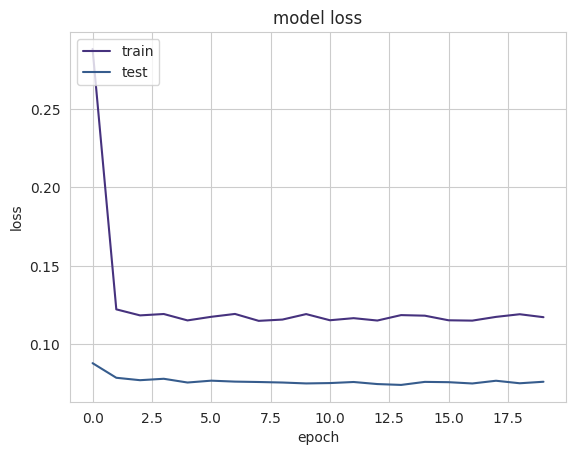

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
x_test.shape

(1906, 4)

In [ ]:
y_test.head(5)

1087    434.73
6308    444.74
8021    457.09
9483    435.39
4459    441.91
Name: energy_production, dtype: float64

In [ ]:
print(modelnnfinal.predict(x_test))

[-1.1354539  -0.9618291  -0.81546396 ...  1.2248425  -1.0189921
 -0.9129979 ]


In [ ]:
predictednn=modelnnfinal.predict(x_test_scaled)
predictednn

array([-1.0400954 , -0.54767466,  0.01312676, ...,  1.561578  ,
       -0.91633314, -0.45266122], dtype=float32)

In [ ]:
nnmse = mean_squared_error(y_test_scaled, predictednn)
nnr2 = r2_score(y_test_scaled, predictednn)

print("Mean Squared Error:", nnmse )
print("R-squared:",nnr2)

Mean Squared Error: 0.07623486374799997
R-squared: 0.9237651362520001


In [ ]:
PREDICTION["NEURALNETWORK_Predicted"]=(modelnnfinal.predict(x_test_scaled)*np.std(y_test))+np.mean(y_test)

In [ ]:
PREDICTION["ACTUAL_TEST"]=y_test.values

In [ ]:
PREDICTION["ACTUAL_TEST"]

0       434.73
1       444.74
2       457.09
3       435.39
4       441.91
         ...  
1901    440.53
1902    443.79
1903    480.53
1904    436.16
1905    452.31
Name: ACTUAL_TEST, Length: 1906, dtype: float64

# RANSAC REGESSION

In [ ]:
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import r2_score

ransac = RANSACRegressor()

# Fit the model
ransac.fit(x_train_scaled, y_train_scaled)  # Assuming y_train is your target variable

# Make predictions on the test set
predictions_ransac = ransac.predict(x_test_scaled)

# Calculate R-squared score
r2_RANSAC= r2_score(y_test_scaled, predictions_ransac)
print("R-squared Score:", r2_RANSAC)
mse_RANSAC= mean_squared_error(y_test_scaled, predictions_ransac)
print("Mean Squared Error:", mse_RANSAC )
PREDICTION["RANSAC"]=(predictions*np.std(y_test))+np.mean(y_test)

R-squared Score: 0.9279951431914946
Mean Squared Error: 0.07200485680850541


Let us explore with autoregression model also to check is there any new and better model available or not

#H2O Model

In [ ]:
import h2o
from h2o.automl import H2OAutoML
import numpy as np

In [ ]:
# Initialize H2O cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20" 2023-07-18; OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9vf_q6v9
  JVM stdout: /tmp/tmp9vf_q6v9/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9vf_q6v9/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.2
H2O_cluster_version_age:    18 days
H2O_cluster_name:           H2O_from_python_unknownUser_ww4g24
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
import h2o
from h2o.automl import H2OAutoML
import numpy as np

# Initialize H2O cluster
h2o.init()

# Convert NumPy arrays to H2O Frames
x_train_h2o = h2o.H2OFrame(np.hstack((x_train_scaled, y_train_scaled)))  # Concatenate x_train and y_train arrays
x_test_h2o = h2o.H2OFrame(x_test_scaled)  # Convert x_test_scaled to H2O Frame

# Set the column names for x_train_h2o and x_test_h2o
x_train_h2o.columns = ["temperature", "exhaust_vacuum", "amb_pressure", "r_humidity", "energy_production"]
x_test_h2o.columns = ["temperature", "exhaust_vacuum", "amb_pressure", "r_humidity"]

# Convert y_train_scaled to an H2O Frame
y_train_h2o = h2o.H2OFrame(y_train_scaled, column_names=["energy_production"])

# Combine x_train_h2o and y_train_h2o into one frame for training
train_frame = x_train_h2o.cbind(y_train_h2o)

# Initialize H2O AutoML
aml = H2OAutoML(max_models=10, seed=12345)

# Train AutoML on the training frame
aml.train(x=x_train_h2o.columns[:-1], y="energy_production", training_frame=train_frame)

# Get the leaderboard of models
leaderboard = aml.leaderboard

# Print the leaderboard
print(leaderboard)

# Get the best model
best_model = aml.leader

# Make predictions on the test set
predictions = best_model.predict(x_test_h2o)

# Convert predictions to a NumPy array
y_pred = h2o.as_list(predictions)["predict"].to_numpy()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.2
H2O_cluster_version_age:    18 days
H2O_cluster_name:           H2O_from_python_unknownUser_ww4g24
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     rmse        mse       mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230812_161656     0.190951  0.0364622  0.137819      nan                 0.0364622
StackedEnsemble_BestOfFamily_1_AutoML_1_20230812_161656  0.192338  0.0369941  0.139179      nan                 0.0369941
GBM_4_AutoML_1_20230812_161656                           0.195055  0.0380464  0.141758      nan                 0.0380464
GBM_3_AutoML_1_20230812_161656                           0.197927  0.039175   0.144961      nan                 0.039175
GBM_2_AutoM

In [ ]:
specific_model = h2o.get_model("StackedEnsemble_AllModels_1_AutoML_1_20230812_161656")

# Make predictions on the test set using the specific model
predictions__h2o = specific_model.predict(x_test_h2o)

# Convert predictions to a NumPy array
y_pred_h2o = h2o.as_list(predictions)["predict"].to_numpy()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
r2_H2OSTACK= r2_score(y_test_scaled, y_pred)
print("R-squared Score:", r2_H2OSTACK)
mse_H2OSTACK= mean_squared_error(y_test_scaled, y_pred_h2o)
print("Mean Squared Error:", mse_H2OSTACK )
PREDICTION["H2O_Automl_stack"]=(y_pred*np.std(y_test))+np.mean(y_test)

R-squared Score: 0.9576573897689243
Mean Squared Error: 0.042342610231075696


see h2o fine model shows good or almost same accuracy like our model so let us go with our stack model or AUTO ML Model

In [ ]:
PREDICTION["H2O_Automl_stack"]

0       435.342384
1       445.770829
2       456.692012
3       441.316672
4       441.763153
           ...    
1901    436.247501
1902    439.581334
1903    487.391353
1904    439.226069
1905    450.289621
Name: H2O_Automl_stack, Length: 1906, dtype: float64

In [ ]:
PREDICTION['ACTUAL_TEST']

0       434.73
1       444.74
2       457.09
3       435.39
4       441.91
         ...  
1901    440.53
1902    443.79
1903    480.53
1904    436.16
1905    452.31
Name: ACTUAL_TEST, Length: 1906, dtype: float64

# Model Validation

In [ ]:
ModelValidation=pd.DataFrame()
ModelValidation["Model"]=["MLR","DT","XGBoost","RandomForest","SVM","Stack","Neural Network","Ransac regerssion","H2o stack"]
ModelValidation["R2_values"]=[r22,DTr2,XGBr2,rfr2,svmr2,stack_r2,nnr2,r2_RANSAC,r2_H2OSTACK]
ModelValidation=ModelValidation.sort_values("R2_values",ascending=False).reset_index(drop=True)

In [ ]:
ModelValidation

Model  R2_values
0          H2o stack   0.957657
1              Stack   0.956002
2       RandomForest   0.955926
3            XGBoost   0.954366
4                SVM   0.948730
5                 DT   0.938157
6                MLR   0.928715
7  Ransac regerssion   0.927995
8     Neural Network   0.923765

In [ ]:
import plotly.express as px

In [ ]:
fig=px.bar(ModelValidation,x="Model",y="R2_values",color="R2_values")
fig.update_layout(title_text="R2_values Score Comparison of each Model")
fig.show()

So stack models shows (combination of all other models) more R2values.But Vivek we will finalise with Our stack model only ok....

# Pickle file for deployment

In [ ]:
import pickle

In [ ]:
file_path="Stackmodel.pkl"

In [ ]:
with open(file_path,"wb") as f:
  pickle.dump(stacking_regressor,f)

In [ ]:
print("Stackmodel saved as pickle file")

Stackmodel saved as pickle file


OHHH!!!!!!! I Forget to close H2o let me close it ok...

In [ ]:
# Shutdown H2O cluster
h2o.cluster().shutdown()

H2O session _sid_bb86 closed.


Ohk...this is vivek k connect me:https://www.linkedin.com/in/contact-vivek-k-yadav1995/